## Section 1: Configuration & imports

In [1]:
# ============================================================================
# REFACTORED CODE STRUCTURE - SOFTWARE ENGINEERING BEST PRACTICES
# ============================================================================

"""
This refactored notebook structure follows these principles:
1. DRY (Don't Repeat Yourself) - Shared code in reusable functions
2. Separation of Concerns - Each section has a clear responsibility
3. Single Source of Truth - Configuration defined once
4. Modular Design - Easy to test and maintain
"""

# ============================================================================
# SECTION 0: CONFIGURATION & CONSTANTS (FIXED)
# ============================================================================

print(f"\n{'#'*80}")
print("SECTION 0: CONFIGURATION")
print(f"{'#'*80}\n")

# Random seed
RANDOM_SEED = 231

# ============================================================================
# BAYESIAN FIX: Token constant for 0.25 filled values
# ============================================================================
BAYES_MISSING_TOKEN = -0.25  # Use token instead of 0.25 to fix noise issue

# Particle configuration
NUM_CLASSES = 4
PARTICLE_NAMES = ['Pion', 'Kaon', 'Proton', 'Electron']
PDG_TO_SPECIES = {
    211: 0,   # Pion
    321: 1,   # Kaon
    2212: 2,  # Proton
    11: 3     # Electron
}

# ============================================================================
# DPG-RECOMMENDED TRACK SELECTIONS (Nov 2025)
# NOTE: pT ranges applied separately via MOMENTUM_RANGES
# ============================================================================
TRACK_SELECTIONS = {
    'event': {'vz_max': 10.0},
    'kinematics': {'eta_min': -0.8, 'eta_max': 0.8},
    'dca': {'dca_xy_max': 0.105, 'dca_z_max': 0.12},
    'tpc': {'tpc_clusters_min': 70},
    'its': {'its_clusters_min': 3}
}

print("✓ TRACK SELECTIONS (DPG-RECOMMENDED, Nov 2025):")
print(f"  • vZ < {TRACK_SELECTIONS['event']['vz_max']} cm")
print(f"  • η: {TRACK_SELECTIONS['kinematics']['eta_min']}-{TRACK_SELECTIONS['kinematics']['eta_max']}")
print(f"  • DCA_xy < {TRACK_SELECTIONS['dca']['dca_xy_max']} cm, DCA_z < {TRACK_SELECTIONS['dca']['dca_z_max']} cm")
print(f"  • TPC clusters > {TRACK_SELECTIONS['tpc']['tpc_clusters_min']}")
print(f"  • ITS clusters > {TRACK_SELECTIONS['its']['its_clusters_min']}")

# Momentum ranges
MOMENTUM_RANGES = {
    "full": {"name": "Full Spectrum (0.1+ GeV/c)", "min": 0.1, "max": float('inf')},
    "0.7-1.5": {"name": "0.7-1.5 GeV/c (Critical)", "min": 0.7, "max": 1.5},
    "1-3": {"name": "1-3 GeV/c (Intermediate)", "min": 1.0, "max": 3.0},
}

# Data path
CSV_PATH = '/kaggle/input/pid-features/pid_features_large.csv'

# ============================================================================
# BAYESIAN FIX: Add 'bayes_available' to TRAINING_FEATURES
# ============================================================================
TRAINING_FEATURES = [
    'pt', 'eta', 'phi',
    'tpc_signal', 'tpc_nsigma_pi', 'tpc_nsigma_ka', 'tpc_nsigma_pr', 'tpc_nsigma_el',
    'tof_beta', 'tof_nsigma_pi', 'tof_nsigma_ka', 'tof_nsigma_pr', 'tof_nsigma_el',
    'bayes_prob_pi', 'bayes_prob_ka', 'bayes_prob_pr', 'bayes_prob_el',
    'bayes_available',  # NEW: Binary indicator (1=real Bayes, 0=token/missing)
    'dca_xy', 'dca_z',
    'has_tpc', 'has_tof'
]

# Detector groups for FSE
DETECTOR_GROUPS = {
    'tpc': ['tpc_signal', 'tpc_nsigma_pi', 'tpc_nsigma_ka', 'tpc_nsigma_pr', 'tpc_nsigma_el'],
    'tof': ['tof_beta', 'tof_nsigma_pi', 'tof_nsigma_ka', 'tof_nsigma_pr', 'tof_nsigma_el'],
    'bayes': ['bayes_prob_pi', 'bayes_prob_ka', 'bayes_prob_pr', 'bayes_prob_el'],
    'kinematics': ['pt', 'eta', 'phi', 'dca_xy', 'dca_z']
}

# Model types
MODEL_TYPES = ['JAX_SimpleNN', 'JAX_DNN', 'JAX_FSE_Attention', 'JAX_FSE_Attention_DetectorAware']

# Hyperparameters
HYPERPARAMETERS = {
    'JAX_SimpleNN': {
        'hidden_dims': [512, 256, 128, 64],
        'dropout_rate': 0.5,
        'learning_rate': 0.0001,
        'batch_size': 256,
        'num_epochs': 100,
        'patience': 30
    },
    'JAX_DNN': {
        'hidden_dims': [1024, 512, 256, 128, 64],
        'dropout_rate': 0.5,
        'learning_rate': 0.00005,
        'batch_size': 256,
        'num_epochs': 100,
        'patience': 30
    },
    'JAX_FSE_Attention': {
        'hidden_dim': 64,
        'num_heads': 4,
        'dropout_rate': 0.5,
        'learning_rate': 0.0001,
        'batch_size': 256,
        'num_epochs': 100,
        'patience': 30
    },
    'JAX_FSE_Attention_DetectorAware': {
        'hidden_dim': 64,
        'num_heads': 4,
        'dropout_rate': 0.5,
        'learning_rate': 0.0001,
        'batch_size': 256,
        'num_epochs': 100,
        'patience': 30,
        'detector_embed_dim': 8
    }
}

# ============================================================================
# FORCE_TRAINING 
# ============================================================================
FORCE_TRAINING = {
    'JAX_SimpleNN': {'full': True, '0.7-1.5': True, '1-3': True},      
    'JAX_DNN': {'full': True, '0.7-1.5': True, '1-3': True},              
    'JAX_FSE_Attention': {'full': True, '0.7-1.5': True, '1-3': True},     
    'JAX_FSE_Attention_DetectorAware': {'full': True, '0.7-1.5': True, '1-3': True} 
}

print("\n✓ Configuration loaded (Bayesian 0.25 NOISE FIX APPLIED)")
print(f"  Token value: {BAYES_MISSING_TOKEN} (replaces 0.25 noise)")
print(f"  Momentum ranges: {len(MOMENTUM_RANGES)}")
print(f"  Model types: {len(MODEL_TYPES)}")
print(f"  Particle classes: {NUM_CLASSES}")
print(f"  Training features: {len(TRAINING_FEATURES)} (includes bayes_available)")
print(f"  Track selections: Integrated in preprocessing")

# ============================================================================
# SECTION 1: IMPORTS
# ============================================================================

print(f"\n{'#'*80}")
print("SECTION 1: IMPORTS")
print(f"{'#'*80}\n")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json
import os
import time
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')

import jax
import jax.numpy as jnp
from jax import random, grad, jit, vmap
import optax
from flax import linen as nn
from flax.training import train_state

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score, classification_report, accuracy_score, precision_recall_curve
from sklearn.utils.class_weight import compute_class_weight

print(f"✓ JAX version: {jax.__version__}")
print(f"✓ Available devices: {jax.devices()}")
print(f"✓ All libraries imported\n")

print(f"{'='*80}")
print("✓ SECTIONS 0-1 COMPLETE")
print(f"{'='*80}\n")



################################################################################
SECTION 0: CONFIGURATION
################################################################################

✓ TRACK SELECTIONS (DPG-RECOMMENDED, Nov 2025):
  • vZ < 10.0 cm
  • η: -0.8-0.8
  • DCA_xy < 0.105 cm, DCA_z < 0.12 cm
  • TPC clusters > 70
  • ITS clusters > 3

✓ Configuration loaded (Bayesian 0.25 NOISE FIX APPLIED)
  Token value: -0.25 (replaces 0.25 noise)
  Momentum ranges: 3
  Model types: 4
  Particle classes: 4
  Training features: 22 (includes bayes_available)
  Track selections: Integrated in preprocessing

################################################################################
SECTION 1: IMPORTS
################################################################################

✓ JAX version: 0.5.2
✓ Available devices: [CudaDevice(id=0), CudaDevice(id=1)]
✓ All libraries imported

✓ SECTIONS 0-1 COMPLETE



In [2]:
# ============================================================================
# SECTION 2: DATA LOADING & PREPROCESSING UTILITIES (FIXED BAYESIAN MASK + NONE REMOVAL)
# ============================================================================

print(f"\n{'#'*80}")
print("SECTION 2: UTILITY FUNCTIONS")
print(f"{'#'*80}\n")

def load_data(csv_path):
    """Load CSV data in chunks for memory efficiency."""
    print(f"Loading data from {csv_path}...")
    df_iter = pd.read_csv(csv_path, dtype='float32', chunksize=500000, low_memory=False)
    df = pd.concat(df_iter, ignore_index=True)
    print(f"✓ Loaded: {df.shape[0]:,} rows × {df.shape[1]} columns\n")
    return df


def pdg_to_species(pdg):
    """Convert PDG code to species index."""
    ap = abs(int(pdg))
    return PDG_TO_SPECIES.get(ap, -1)


def preprocess_momentum_range(df, momentum_range):
    """
    Preprocess data for a specific momentum range with DPG-recommended track selections.
    FIXED: Bayesian mask correctly identifies REAL vs TOKEN/MISSING data
    IMPROVED: Removes NONE detector tracks (no TPC/TOF information)
    NEW: Integrated track selections (η, DCA, TPC quality)
    """
    print(f"\n{'─'*80}")
    print(f"Preprocessing: {momentum_range['name']}")
    print(f"{'─'*80}")
    
    # STEP 1: Filter by momentum
    df_filtered = df[(df['p'] >= momentum_range['min']) & 
                     (df['p'] < momentum_range['max'])].copy()
    print(f"  [STEP 1] Samples after momentum filter: {len(df_filtered):,}")
    
    # ========================================================================
    # STEP 2: APPLY DPG-RECOMMENDED TRACK SELECTIONS
    # ========================================================================
    print(f"\n  [STEP 2] Applying DPG-recommended track selections...")
    initial_count = len(df_filtered)
    
    # Eta cut
    eta_min = TRACK_SELECTIONS['kinematics']['eta_min']
    eta_max = TRACK_SELECTIONS['kinematics']['eta_max']
    df_filtered = df_filtered[(df_filtered['eta'] > eta_min) & (df_filtered['eta'] < eta_max)]
    print(f"    After η ∈ [{eta_min}, {eta_max}]: {len(df_filtered):,} tracks")
    
    # DCA cuts
    dca_xy_max = TRACK_SELECTIONS['dca']['dca_xy_max']
    dca_z_max = TRACK_SELECTIONS['dca']['dca_z_max']
    df_filtered = df_filtered[
        (df_filtered['dca_xy'].abs() < dca_xy_max) & 
        (df_filtered['dca_z'].abs() < dca_z_max)
    ]
    print(f"    After DCA cuts: {len(df_filtered):,} tracks")
    
    # TPC quality cuts
    tpc_cls_min = TRACK_SELECTIONS['tpc']['tpc_clusters_min']
    if 'tpc_nclusters' in df_filtered.columns:
        df_filtered = df_filtered[df_filtered['tpc_nclusters'] >= tpc_cls_min]
        print(f"    After TPC clusters > {tpc_cls_min}: {len(df_filtered):,} tracks")
    
    print(f"    Total removed by selections: {initial_count - len(df_filtered):,} tracks ({(initial_count - len(df_filtered))/initial_count*100:.1f}%)")
    
    # ========================================================================
    # STEP 3: REMOVE NONE DETECTOR (tracks with no TPC/TOF information)
    # ========================================================================
    print(f"\n  [STEP 3] Detector status BEFORE removing NONE:")
    has_tpc_before = (df_filtered['has_tpc'] == 1).sum()
    has_tof_before = (df_filtered['has_tof'] == 1).sum()
    has_none_before = ((df_filtered['has_tpc'] == 0) & (df_filtered['has_tof'] == 0)).sum()
    print(f"    TPC available: {has_tpc_before:,}")
    print(f"    TOF available: {has_tof_before:,}")
    print(f"    NONE (no detectors): {has_none_before:,} ({(has_none_before/len(df_filtered)*100):.2f}%)")
    
    # Remove tracks with NO detector information
    df_filtered = df_filtered[~((df_filtered['has_tpc'] == 0) & (df_filtered['has_tof'] == 0))].copy()
    
    print(f"\n  ✓✓✓ REMOVING NONE DETECTOR ✓✓✓")
    print(f"    Removed tracks with no TPC/TOF information")
    print(f"    Samples after NONE removal: {len(df_filtered):,}")
    print(f"  Detector status AFTER removing NONE:")
    has_tpc_after = (df_filtered['has_tpc'] == 1).sum()
    has_tof_after = (df_filtered['has_tof'] == 1).sum()
    print(f"    TPC available: {has_tpc_after:,}")
    print(f"    TOF available: {has_tof_after:,}")
    
    # ========================================================================
    # STEP 4: BAYESIAN FEATURES HANDLING
    # ========================================================================
    bayes_features = DETECTOR_GROUPS['bayes']
    
    # Missing value analysis
    print(f"\n  [STEP 4] Missing value analysis:")
    features_to_check = [f for f in TRAINING_FEATURES if f != 'bayes_available']
    missing_before = df_filtered[features_to_check].isnull().sum()
    total_missing = missing_before.sum()

    if total_missing > 0:
        print(f"    Total missing: {total_missing:,}")
    
    # Fill TOF features
    for feat in DETECTOR_GROUPS['tof']:
        if feat in df_filtered.columns:
            fill_val = 0.0 if feat == 'tof_beta' else 999.0
            df_filtered[feat].fillna(fill_val, inplace=True)
    
    # Fill TPC features
    for feat in DETECTOR_GROUPS['tpc']:
        if feat in df_filtered.columns:
            fill_val = 0.0 if feat == 'tpc_signal' else 999.0
            df_filtered[feat].fillna(fill_val, inplace=True)
    
    # ========================================================================
    # CRITICAL FIX: Save REAL Bayesian mask BEFORE filling with token
    # ========================================================================
    # This identifies which rows have REAL non-zero Bayesian data
    bayes_complete_real = (df_filtered[bayes_features] != 0).all(axis=1)
    
    n_real_bayes_before = np.sum(bayes_complete_real)
    pct_real_before = (n_real_bayes_before / len(bayes_complete_real)) * 100
    
    print(f"\n  Bayesian PID Status (BEFORE FILLING):")
    print(f"    REAL Bayesian:   {n_real_bayes_before:,} ({pct_real_before:.2f}%)")
    print(f"    MISSING:         {len(bayes_complete_real) - n_real_bayes_before:,} ({100-pct_real_before:.2f}%)")
    
    # Save predictions from REAL data (before filling with token)
    bayes_pred_real = np.argmax(df_filtered[bayes_features].values, axis=1)
    
    # ========================================================================
    # BAYESIAN 0.25 NOISE FIX: Replace missing with token (-0.25)
    # ========================================================================
    print(f"\n  ✓✓✓ BAYESIAN FIX: Removing 0.25 noise with token approach ✓✓✓")
    print(f"    OLD: Fill with 0.25 (causes confusion)")
    print(f"    NEW: Fill missing Bayesian with {BAYES_MISSING_TOKEN} (token)")
    
    # Fill missing Bayesian with token (NOT 0.25!)
    for feat in bayes_features:
        if feat in df_filtered.columns:
            df_filtered[feat].fillna(BAYES_MISSING_TOKEN, inplace=True)
    
    # Create binary indicator: 1 = real Bayes (non-zero), 0 = token/missing
    # THIS IS THE CRITICAL MASK - identifies which rows had REAL Bayesian data
    df_filtered['bayes_available'] = bayes_complete_real.astype('float32')
    
    n_real = int(df_filtered['bayes_available'].sum())
    n_token = len(df_filtered) - n_real
    pct_real = (n_real / len(df_filtered)) * 100 if len(df_filtered) > 0 else 0.0
    
    print(f"    Real Bayesian:  {n_real:,} ({pct_real:.2f}%)")
    print(f"    Token/Removed:  {n_token:,} ({100-pct_real:.2f}%)")
    print(f"    Result: FSE will NOT be confused by 0.25 noise anymore!")
    print(f"    Result: NONE detector removed, only clean detector data remains!")
    
    # Fill kinematic features
    for feat in DETECTOR_GROUPS['kinematics']:
        if feat in df_filtered.columns:
            median_val = df_filtered[feat].median()
            df_filtered[feat].fillna(median_val, inplace=True)
    
    df_filtered['has_tpc'].fillna(0, inplace=True)
    df_filtered['has_tof'].fillna(0, inplace=True)
    
    # Drop any remaining NaN
    if df_filtered[TRAINING_FEATURES].isnull().sum().sum() > 0:
        df_filtered.dropna(subset=TRAINING_FEATURES, inplace=True)
    
    # Create detector group masks
    group_names = list(DETECTOR_GROUPS.keys())
    group_masks_data = []
    
    for g in group_names:
        if g == 'tpc':
            group_masks_data.append(df_filtered['has_tpc'].values.astype('float32'))
        elif g == 'tof':
            group_masks_data.append(df_filtered['has_tof'].values.astype('float32'))
        else:
            group_masks_data.append(np.ones(len(df_filtered), dtype='float32'))
    
    group_masks = np.stack(group_masks_data, axis=1)
    
    # Extract features and labels
    X = df_filtered[TRAINING_FEATURES].values
    y = df_filtered['mc_pdg'].values
    y = np.array([pdg_to_species(pdg) for pdg in y])
    valid_mask = y >= 0

    # USE THE CORRECT MASK: bayes_available (1=real, 0=token)
    bayes_availability_mask = df_filtered['bayes_available'].values[valid_mask].astype('float32')
    bayes_pred_original = bayes_pred_real[valid_mask]
    
    n_real_bayes = int(bayes_availability_mask.sum())
    n_filled_bayes = len(bayes_availability_mask) - n_real_bayes
    pct_real = (n_real_bayes / len(bayes_availability_mask)) * 100 if len(bayes_availability_mask) > 0 else 0.0
    
    print(f"\n  [STEP 4] Bayesian PID Status (AFTER filtering valid particles):")
    print(f"    REAL Bayesian:   {n_real_bayes:,} ({pct_real:.2f}%)")
    print(f"    TOKEN/MISSING:   {n_filled_bayes:,} ({100-pct_real:.2f}%)")
    
    # Apply valid_mask
    X = X[valid_mask]
    y = y[valid_mask]
    group_masks = group_masks[valid_mask]
    
    print(f"\n  [STEP 4] Final dataset: {X.shape}")
    print(f"  Class distribution:")
    for i, particle in enumerate(PARTICLE_NAMES):
        count = np.sum(y == i)
        pct = (count / len(y)) * 100 if len(y) > 0 else 0.0
        print(f"    {particle:10s}: {count:6,} ({pct:5.2f}%)")
    
    # ========================================================================
    # STEP 5: CREATE DETECTOR MODES FOR PHASE 1
    # ========================================================================
    print(f"\n  [STEP 5] Creating detector modes for Phase 1...")
    
    has_tpc_idx = TRAINING_FEATURES.index('has_tpc')
    has_tof_idx = TRAINING_FEATURES.index('has_tof')
    
    has_tpc_array = X[:, has_tpc_idx].astype(int)
    has_tof_array = X[:, has_tof_idx].astype(int)
    
    detector_mode = np.zeros(len(X), dtype='int32')
    detector_mode[(has_tpc_array == 1) & (has_tof_array == 0)] = 1
    detector_mode[(has_tpc_array == 0) & (has_tof_array == 1)] = 2
    detector_mode[(has_tpc_array == 1) & (has_tof_array == 1)] = 3
    
    unique_modes, mode_counts = np.unique(detector_mode, return_counts=True)
    print(f"\n  Detector mode distribution:")
    mode_names_full = ['NONE', 'TPC_ONLY', 'TOF_ONLY', 'TPC_TOF']
    for mode, count in zip(unique_modes, mode_counts):
        pct = (count / len(detector_mode)) * 100 if len(detector_mode) > 0 else 0.0
        print(f"    {mode_names_full[mode]:15s} ({mode}): {count:6,} ({pct:5.2f}%)")
    
    # ========================================================================
    # STEP 6: TRAIN-TEST SPLIT
    # ========================================================================
    X_train, X_test, y_train, y_test, masks_train, masks_test, \
    bayes_mask_train, bayes_mask_test, bayes_pred_train, bayes_pred_test, \
    X_train_modes, X_test_modes = train_test_split(
        X, y, group_masks, bayes_availability_mask, bayes_pred_original, detector_mode,
        test_size=0.2, random_state=RANDOM_SEED, stratify=y
    )
    
    # ========================================================================
    # STEP 7: STANDARDIZE FEATURES
    # ========================================================================
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    print(f"\n  [STEP 6-7] Train-test split & standardization:")
    print(f"    Train: {len(X_train):,}, Test: {len(X_test):,}")
    
    n_real_test = int(bayes_mask_test.sum())
    pct_real_test = (n_real_test / len(bayes_mask_test)) * 100 if len(bayes_mask_test) > 0 else 0.0
    print(f"\n  Test Set Bayesian Stats:")
    print(f"    REAL: {n_real_test:,} ({pct_real_test:.2f}%)")
    print(f"    TOKEN: {len(bayes_mask_test) - n_real_test:,} ({100-pct_real_test:.2f}%)")
    
    unique_modes_test, mode_counts_test = np.unique(X_test_modes, return_counts=True)
    print(f"\n  Test Set Detector Mode Distribution:")
    for mode, count in zip(unique_modes_test, mode_counts_test):
        pct = (count / len(X_test_modes)) * 100 if len(X_test_modes) > 0 else 0.0
        print(f"    {mode_names_full[mode]:15s}: {count:6,} ({pct:5.2f}%)")
    
    print(f"\n  ✓ Preprocessing complete for {momentum_range['name']}\n")
    
    return {
        'X_train_scaled': X_train_scaled,
        'X_test_scaled': X_test_scaled,
        'y_train': y_train,
        'y_test': y_test,
        'scaler': scaler,
        'features': TRAINING_FEATURES,
        'masks_train': masks_train,
        'masks_test': masks_test,
        'group_names': group_names,
        'bayes_availability_train': bayes_mask_train,
        'bayes_availability_test': bayes_mask_test,
        'bayes_pred_original_train': bayes_pred_train,
        'bayes_pred_original_test': bayes_pred_test,
        'detector_modes_train': X_train_modes,
        'detector_modes_test': X_test_modes,
    }


def get_model_path(momentum_range_key, model_type, mode='save'):
    """Get file path for model save/load."""
    model_subdir = "trained_models"
    working_path = f"/kaggle/working/{model_subdir}/{momentum_range_key}_{model_type}.pkl"
    input_path = f"/kaggle/input/jax-models/jax-models/{momentum_range_key}_{model_type}.pkl"
    
    if mode == "save":
        return working_path
    else:
        return working_path if os.path.exists(working_path) else input_path


def load_single_model(momentum_range_key, model_type):
    """Load a single model from disk."""
    path = get_model_path(momentum_range_key, model_type, mode="load")
    
    if os.path.exists(path):
        try:
            with open(path, 'rb') as f:
                results = pickle.load(f)
            print(f"✓ Loaded from: {path}")
            return results, path
        except Exception as e:
            print(f"Error loading {path}: {e}")
    
    return None, path


def save_single_model(momentum_range_key, model_type, results):
    """Save a single model to disk."""
    path = get_model_path(momentum_range_key, model_type, mode="save")
    
    os.makedirs(os.path.dirname(path), exist_ok=True)
    
    try:
        with open(path, 'wb') as f:
            pickle.dump(results, f)
        print(f"✓ Saved to: {path}")
    except Exception as e:
        print(f"Error saving to {path}: {e}")


print("✓ Preprocessing utilities defined (Bayesian mask FIXED + NONE detector REMOVED)")
print("✓ Track selections integrated (DPG-recommended cuts applied)")
print("✓ Model persistence utilities defined")
print(f"\n{'='*80}")
print("✓ SECTION 2 COMPLETE")
print("✓ Bayesian mask now CORRECTLY identifies REAL vs TOKEN/MISSING!")
print("✓ NONE detector tracks removed for cleaner, high-quality data!")
print("✓ DPG track selections (η, DCA, TPC) integrated in preprocessing!")
print(f"{'='*80}\n")

# ============================================================================
# GLOBAL DATA STORAGE (For sharing between sections)
# ============================================================================
all_results_by_model_and_range = {}

print(f"✓ Global storage initialised")



################################################################################
SECTION 2: UTILITY FUNCTIONS
################################################################################

✓ Preprocessing utilities defined (Bayesian mask FIXED + NONE detector REMOVED)
✓ Track selections integrated (DPG-recommended cuts applied)
✓ Model persistence utilities defined

✓ SECTION 2 COMPLETE
✓ Bayesian mask now CORRECTLY identifies REAL vs TOKEN/MISSING!
✓ NONE detector tracks removed for cleaner, high-quality data!
✓ DPG track selections (η, DCA, TPC) integrated in preprocessing!

✓ Global storage initialised


## Section 3: Model definitions & training functions

In [3]:
# ============================================================================
# SECTION 3: MODEL DEFINITIONS & TRAINING UTILITIES (SHARED + PHASE 1)
# ============================================================================

print(f"\n{'#'*80}")
print("SECTION 3: MODEL DEFINITIONS & TRAINING")
print(f"{'#'*80}\n")

# ============================================================================
# 3.1: LOSS FUNCTION
# ============================================================================

def focal_loss(logits, labels, class_weights=None, alpha=0.25, gamma=2.0):
    """
    Focal loss for multi-class classification.
    Focuses training on hard negatives and reduces easy negative weight.
    """
    probs = jax.nn.softmax(logits, axis=-1)
    batch_size = labels.shape[0]
    pt = probs[jnp.arange(batch_size), labels]

    ce_loss = -jnp.log(pt + 1e-7)
    
    w = class_weights[labels] if class_weights is not None else 1.0
    focal_weight = alpha * (1.0 - pt) ** gamma
    loss = jnp.mean(w * focal_weight * ce_loss)
    return loss


# ============================================================================
# 3.2: MODEL ARCHITECTURES
# ============================================================================

class JAX_SimpleNN(nn.Module):
    """Simple feedforward neural network."""
    hidden_dims: list
    num_classes: int
    dropout_rate: float = 0.3
    
    @nn.compact
    def __call__(self, x, training: bool = False):
        for dim in self.hidden_dims:
            x = nn.Dense(dim)(x)
            x = nn.relu(x)
            x = nn.Dropout(rate=self.dropout_rate, deterministic=not training)(x)
        x = nn.Dense(self.num_classes)(x)
        return x


class JAX_DNN(nn.Module):
    """Deeper neural network with batch normalisation."""
    hidden_dims: list
    num_classes: int
    dropout_rate: float = 0.3
    
    @nn.compact
    def __call__(self, x, training: bool = False):
        for dim in self.hidden_dims:
            x = nn.Dense(dim)(x)
            x = nn.BatchNorm(use_running_average=not training)(x)
            x = nn.relu(x)
            x = nn.Dropout(rate=self.dropout_rate, deterministic=not training)(x)
        x = nn.Dense(self.num_classes)(x)
        return x


class JAX_FSE_Attention(nn.Module):
    """Feature Set Embedding with Multi-Head Attention."""
    hidden_dim: int = 64
    num_heads: int = 4
    num_classes: int = 4
    dropout_rate: float = 0.3
    
    @nn.compact
    def __call__(self, x, group_mask, training: bool = False):
        batch_size = x.shape[0]
        num_groups = int(group_mask.shape[1])  # FIXED: Convert to int
        
        # Project features to per-group embeddings
        feat_proj = nn.Dense(self.hidden_dim * num_groups)(x)
        feat_proj = feat_proj.reshape(batch_size, num_groups, self.hidden_dim)
        feat_proj = feat_proj * group_mask[:, :, None]
        
        # Self-attention over detector groups
        attn_mask = group_mask[:, None, None, :]
        feat_attn = nn.MultiHeadDotProductAttention(num_heads=self.num_heads)(
            feat_proj, feat_proj, mask=attn_mask
        )
        feat_attn = nn.LayerNorm()(feat_attn)
        
        # Gated fusion
        gates = nn.Dense(self.hidden_dim)(feat_attn)
        gates = nn.sigmoid(gates)
        feat_gated = feat_attn * gates
        
        # Masked pooling
        denom = jnp.clip(jnp.sum(group_mask, axis=1, keepdims=True), a_min=1.0)
        pooled = jnp.sum(feat_gated * group_mask[:, :, None], axis=1) / denom
        
        # Classification head
        x = nn.Dense(128)(pooled)
        x = nn.relu(x)
        x = nn.Dropout(rate=self.dropout_rate, deterministic=not training)(x)
        x = nn.Dense(64)(x)
        x = nn.relu(x)
        x = nn.Dropout(rate=self.dropout_rate, deterministic=not training)(x)
        x = nn.Dense(self.num_classes)(x)
        return x


class JAX_FSE_Attention_DetectorAware(nn.Module):
    """
    Feature Set Embedding with Multi-Head Attention + Detector-Aware Head (Phase 1)
    
    Learns specialised decision boundaries per detector configuration:
    - TPC-only tracks (89% in 0.7-1.5 GeV/c)
    - TOF-only tracks (rare, 8.5%)
    - TPC+TOF tracks (best separation)
    
    Expected gain: +2-3% efficiency & purity
    """
    hidden_dim: int = 64
    num_heads: int = 4
    num_classes: int = 4
    dropout_rate: float = 0.3
    detector_embed_dim: int = 8
    
    @nn.compact
    def __call__(self, x, group_mask, detector_mode, training: bool = False):
        """
        Args:
            x: (batch, num_features) - scaled features
            group_mask: (batch, num_groups) - detector availability mask
            detector_mode: (batch,) - int32 array, detector mode (0-3)
                0=NONE, 1=TPC_ONLY, 2=TOF_ONLY, 3=TPC_TOF
            training: boolean for dropout
        """
        batch_size = x.shape[0]
        num_groups = int(group_mask.shape[1])  # FIXED: Convert to int
        
        # ====================================================================
        # STANDARD FSE + ATTENTION (unchanged from JAX_FSE_Attention)
        # ====================================================================
        
        # Project features to per-group embeddings
        feat_proj = nn.Dense(self.hidden_dim * num_groups)(x)
        feat_proj = feat_proj.reshape(batch_size, num_groups, self.hidden_dim)
        feat_proj = feat_proj * group_mask[:, :, None]
        
        # Self-attention over detector groups
        attn_mask = group_mask[:, None, None, :]
        feat_attn = nn.MultiHeadDotProductAttention(
            num_heads=self.num_heads
        )(feat_proj, feat_proj, mask=attn_mask)
        
        feat_attn = nn.LayerNorm()(feat_attn)
        
        # Gated fusion
        gates = nn.Dense(self.hidden_dim)(feat_attn)
        gates = nn.sigmoid(gates)
        feat_gated = feat_attn * gates
        
        # Masked pooling
        denom = jnp.clip(jnp.sum(group_mask, axis=1, keepdims=True), a_min=1.0)
        pooled = jnp.sum(feat_gated * group_mask[:, :, None], axis=1) / denom
        
        # ====================================================================
        # DETECTOR-MODE EMBEDDING (NEW! Phase 1)
        # ====================================================================
        
        # One-hot encode detector mode (0, 1, 2, 3) → (batch, 4)
        detector_onehot = jax.nn.one_hot(detector_mode, num_classes=4)
        
        # Dense embedding layer: 4 → detector_embed_dim (8)
        detector_emb = nn.Dense(self.detector_embed_dim)(detector_onehot)
        detector_emb = nn.relu(detector_emb)
        
        # ====================================================================
        # FUSE ATTENTION POOLED + DETECTOR EMBEDDING
        # ====================================================================
        
        # Concatenate: (batch, hidden_dim) + (batch, detector_embed_dim)
        #            → (batch, hidden_dim + detector_embed_dim)
        x_fused = jnp.concatenate([pooled, detector_emb], axis=-1)
        
        # ====================================================================
        # CLASSIFICATION HEAD (expanded input dim)
        # ====================================================================
        
        x_head = nn.Dense(128)(x_fused)
        x_head = nn.relu(x_head)
        x_head = nn.Dropout(rate=self.dropout_rate, deterministic=not training)(x_head)
        
        x_head = nn.Dense(64)(x_head)
        x_head = nn.relu(x_head)
        x_head = nn.Dropout(rate=self.dropout_rate, deterministic=not training)(x_head)
        
        # Output logits
        logits = nn.Dense(self.num_classes)(x_head)
        
        return logits



# ============================================================================
# 3.3: TRAINING STEP FUNCTIONS
# ============================================================================

@jit
def train_step_simple(state, batch_x, batch_y, rng, class_weights):
    """Training step for SimpleNN (no BatchNorm)."""
    def loss_fn(params):
        logits = state.apply_fn({'params': params}, batch_x, training=True, rngs={'dropout': rng})
        loss = focal_loss(logits, batch_y, class_weights=class_weights)
        return loss
    
    loss, grads = jax.value_and_grad(loss_fn)(state.params)
    state = state.apply_gradients(grads=grads)
    return state, loss


@jit
def train_step_batchnorm(state, batch_x, batch_y, rng, class_weights):
    """Training step for DNN (with BatchNorm)."""
    def loss_fn(params):
        variables = {'params': params, 'batch_stats': state.batch_stats}
        logits, new_model_state = state.apply_fn(
            variables, batch_x, training=True, rngs={'dropout': rng}, mutable=['batch_stats']
        )
        loss = focal_loss(logits, batch_y, class_weights=class_weights)
        return loss, new_model_state
    
    (loss, new_model_state), grads = jax.value_and_grad(loss_fn, has_aux=True)(state.params)
    state = state.apply_gradients(grads=grads)
    state = state.replace(batch_stats=new_model_state['batch_stats'])
    return state, loss


@jit
def train_step_fse(state, batch_x, batch_mask, batch_y, rng, class_weights):
    """Training step for FSE+Attention."""
    def loss_fn(params):
        logits = state.apply_fn({'params': params}, batch_x, batch_mask, training=True, rngs={'dropout': rng})
        loss = focal_loss(logits, batch_y, class_weights=class_weights)
        return loss
    
    loss, grads = jax.value_and_grad(loss_fn)(state.params)
    state = state.apply_gradients(grads=grads)
    return state, loss


@jit
def train_step_fse_aware(state, batch_x, batch_mask, batch_modes, batch_y, rng, class_weights):
    """Training step for Detector-Aware FSE+Attention using Focal Loss (Phase 1)"""
    def loss_fn(params):
        logits = state.apply_fn(
            {'params': params}, batch_x, batch_mask, batch_modes, 
            training=True, rngs={'dropout': rng}
        )
        loss = focal_loss(logits, batch_y, class_weights=class_weights, 
                         alpha=0.25, gamma=2.0)
        return loss
    
    loss, grads = jax.value_and_grad(loss_fn)(state.params)
    state = state.apply_gradients(grads=grads)
    return state, loss


# ============================================================================
# 3.4: EVALUATION FUNCTIONS
# ============================================================================

@jit
def eval_step_simple(state, batch_x, batch_y):
    """Evaluation step for SimpleNN."""
    logits = state.apply_fn({'params': state.params}, batch_x, training=False)
    pred = jnp.argmax(logits, axis=-1)
    accuracy = jnp.mean(pred == batch_y)
    return accuracy, logits


@jit
def eval_step_batchnorm(state, batch_x, batch_y):
    """Evaluation step for DNN with BatchNorm."""
    variables = {'params': state.params, 'batch_stats': state.batch_stats}
    logits = state.apply_fn(variables, batch_x, training=False)
    pred = jnp.argmax(logits, axis=-1)
    accuracy = jnp.mean(pred == batch_y)
    return accuracy, logits


@jit
def eval_step_fse(state, batch_x, batch_mask, batch_y):
    """Evaluation step for FSE+Attention."""
    logits = state.apply_fn({'params': state.params}, batch_x, batch_mask, training=False)
    pred = jnp.argmax(logits, axis=-1)
    accuracy = jnp.mean(pred == batch_y)
    return accuracy, logits


@jit
def eval_step_fse_aware(state, batch_x, batch_mask, batch_modes, batch_y):
    """Evaluation step for Detector-Aware FSE+Attention (Phase 1)"""
    logits = state.apply_fn(
        {'params': state.params}, batch_x, batch_mask, batch_modes, training=False
    )
    pred = jnp.argmax(logits, axis=-1)
    accuracy = jnp.mean(pred == batch_y)
    return accuracy, logits


def batch_evaluate_simple(state, X_data, y_data, batch_size=1024):
    """Batch evaluation for SimpleNN."""
    all_logits, all_accs = [], []
    num_batches = (len(X_data) + batch_size - 1) // batch_size
    
    for batch_idx in range(num_batches):
        start_idx = batch_idx * batch_size
        end_idx = min(start_idx + batch_size, len(X_data))
        batch_x, batch_y = X_data[start_idx:end_idx], y_data[start_idx:end_idx]
        
        batch_acc, batch_logits = eval_step_simple(state, batch_x, batch_y)
        all_logits.append(batch_logits)
        all_accs.append(batch_acc)
    
    return np.mean(all_accs), jnp.concatenate(all_logits, axis=0)


def batch_evaluate_batchnorm(state, X_data, y_data, batch_size=1024):
    """Batch evaluation for DNN with BatchNorm."""
    all_logits, all_accs = [], []
    num_batches = (len(X_data) + batch_size - 1) // batch_size
    
    for batch_idx in range(num_batches):
        start_idx = batch_idx * batch_size
        end_idx = min(start_idx + batch_size, len(X_data))
        batch_x, batch_y = X_data[start_idx:end_idx], y_data[start_idx:end_idx]
        
        batch_acc, batch_logits = eval_step_batchnorm(state, batch_x, batch_y)
        all_logits.append(batch_logits)
        all_accs.append(batch_acc)
    
    return np.mean(all_accs), jnp.concatenate(all_logits, axis=0)


def batch_evaluate_fse(state, X_data, mask_data, y_data, batch_size=1024):
    """Batch evaluation for FSE+Attention."""
    all_logits, all_accs = [], []
    num_batches = (len(X_data) + batch_size - 1) // batch_size
    
    for batch_idx in range(num_batches):
        start_idx = batch_idx * batch_size
        end_idx = min(start_idx + batch_size, len(X_data))
        batch_x = X_data[start_idx:end_idx]
        batch_mask = mask_data[start_idx:end_idx]
        batch_y = y_data[start_idx:end_idx]
        
        batch_acc, batch_logits = eval_step_fse(state, batch_x, batch_mask, batch_y)
        all_logits.append(batch_logits)
        all_accs.append(batch_acc)
    
    return np.mean(all_accs), jnp.concatenate(all_logits, axis=0)


def batch_evaluate_fse_aware(state, X_data, mask_data, modes_data, y_data, batch_size=1024):
    """Batch evaluation for Detector-Aware FSE+Attention (Phase 1)"""
    all_logits = []
    all_accs = []
    
    num_batches = (len(X_data) + batch_size - 1) // batch_size
    
    for batch_idx in range(num_batches):
        start_idx = batch_idx * batch_size
        end_idx = min(start_idx + batch_size, len(X_data))
        
        batch_x = X_data[start_idx:end_idx]
        batch_mask = mask_data[start_idx:end_idx]
        batch_modes = modes_data[start_idx:end_idx]
        batch_y = y_data[start_idx:end_idx]
        
        batch_acc, batch_logits = eval_step_fse_aware(state, batch_x, batch_mask, 
                                                     batch_modes, batch_y)
        all_logits.append(batch_logits)
        all_accs.append(batch_acc)
    
    all_logits = jnp.concatenate(all_logits, axis=0)
    avg_acc = np.mean(all_accs)
    
    return avg_acc, all_logits



# ============================================================================
# 3.5: EXTENDED TRAINSTATE FOR BATCHNORM
# ============================================================================

class TrainStateWithBatchStats(train_state.TrainState):
    """Extended TrainState that includes batch_stats for BatchNorm."""
    batch_stats: any = None


# ============================================================================
# 3.6: UNIFIED TRAINING ORCHESTRATOR
# ============================================================================

print(f"\n{'#'*80}")
print("SECTION 3.6: UNIFIED TRAINING ORCHESTRATOR")
print(f"{'#'*80}\n")

def train_model(model_type, momentum_range, preprocessing_data, force_training=False, mr_key=None):
    """
    Unified training function for all model types.
    
    Args:
        model_type: str - model name (JAX_SimpleNN, JAX_DNN, JAX_FSE_Attention, JAX_FSE_Attention_DetectorAware)
        momentum_range: dict - momentum range config (from MOMENTUM_RANGES.values())
        preprocessing_data: dict - preprocessed data from preprocess_momentum_range()
        force_training: bool - force retraining (skip loading cached models)
        mr_key: str - momentum range key (from MOMENTUM_RANGES.keys(), passed from SECTION 4)
    """
    # Use passed mr_key or derive from momentum_range name
    if mr_key is None:
        mr_key = momentum_range.get('name', 'unknown').replace(' ', '_').lower()
    
    params = HYPERPARAMETERS[model_type]
    
    print(f"\n{'*'*80}")
    print(f"{model_type} - {momentum_range['name']}")
    print(f"{'*'*80}")
    print(f"✓ DPG Track Selections Applied (Section 2):")
    print(f"  • η ∈ [{TRACK_SELECTIONS['kinematics']['eta_min']}, {TRACK_SELECTIONS['kinematics']['eta_max']}]")
    print(f"  • DCA_xy < {TRACK_SELECTIONS['dca']['dca_xy_max']}, DCA_z < {TRACK_SELECTIONS['dca']['dca_z_max']}")
    print(f"  • TPC clusters > {TRACK_SELECTIONS['tpc']['tpc_clusters_min']}")
    print(f"  • NONE detector tracks removed")
    print(f"  • Bayesian mask fixed (token = {BAYES_MISSING_TOKEN})")
    print(f"{'*'*80}\n")

    
    # Try to load existing model
    if not force_training:
        loaded, _ = load_single_model(mr_key, model_type)
        if loaded is not None:
            print(f"✓ Loaded existing model (skipped training)")
            return loaded
    
    print("Training from scratch...")
    print(f"✓ Hyperparameters:")
    for k, v in params.items():
        print(f"    {k:20s}: {v}")
    
    # Get preprocessed data
    X_train = preprocessing_data['X_train_scaled']
    X_test = preprocessing_data['X_test_scaled']
    y_train = preprocessing_data['y_train']
    y_test = preprocessing_data['y_test']
    
    # Convert to JAX
    X_train_jax = jnp.array(X_train, dtype=jnp.float32)
    X_test_jax = jnp.array(X_test, dtype=jnp.float32)
    y_train_jax = jnp.array(y_train, dtype=jnp.int32)
    y_test_jax = jnp.array(y_test, dtype=jnp.int32)
    
    # Compute class weights
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weights_jax = jnp.array(list(dict(enumerate(class_weights)).values()), dtype=jnp.float32)
    
    print(f"\n✓ Class weights (after track selections):")
    for i, w in enumerate(class_weights):
        print(f"    {PARTICLE_NAMES[i]:10s}: {w:.4f}")
    
    # Initialise model based on type
    key = random.PRNGKey(RANDOM_SEED + hash(model_type) % 10000)
    
    if model_type == 'JAX_SimpleNN':
        model = JAX_SimpleNN(
            hidden_dims=params['hidden_dims'],
            num_classes=NUM_CLASSES,
            dropout_rate=params['dropout_rate']
        )
        num_features = int(X_train_jax.shape[1])
        dummy_input = jnp.ones((1, num_features))
        model_params = model.init(key, dummy_input, training=False)
        
        tx = optax.adam(params['learning_rate'])
        state = train_state.TrainState.create(
            apply_fn=model.apply,
            params=model_params['params'],
            tx=tx
        )
        
        train_fn = train_step_simple
        eval_fn = batch_evaluate_simple
        
    elif model_type == 'JAX_DNN':
        model = JAX_DNN(
            hidden_dims=params['hidden_dims'],
            num_classes=NUM_CLASSES,
            dropout_rate=params['dropout_rate']
        )
        num_features = int(X_train_jax.shape[1])
        dummy_input = jnp.ones((1, num_features))
        variables = model.init(key, dummy_input, training=True)
        
        model_params = variables['params']
        batch_stats = variables.get('batch_stats', {})
        
        tx = optax.adam(params['learning_rate'])
        state = TrainStateWithBatchStats.create(
            apply_fn=model.apply,
            params=model_params,
            tx=tx,
            batch_stats=batch_stats
        )
        
        train_fn = train_step_batchnorm
        eval_fn = batch_evaluate_batchnorm
        
    elif model_type == 'JAX_FSE_Attention':
        model = JAX_FSE_Attention(
            hidden_dim=params['hidden_dim'],
            num_heads=params['num_heads'],
            num_classes=NUM_CLASSES,
            dropout_rate=params['dropout_rate']
        )
        
        masks_train_jax = jnp.array(preprocessing_data['masks_train'], dtype=jnp.float32)
        masks_test_jax = jnp.array(preprocessing_data['masks_test'], dtype=jnp.float32)
        
        num_features = int(X_train_jax.shape[1])
        num_groups = int(masks_train_jax.shape[1])
        dummy_input = jnp.ones((1, num_features))
        dummy_mask = jnp.ones((1, num_groups))
        model_params = model.init(key, dummy_input, dummy_mask, training=False)
        
        tx = optax.adam(params['learning_rate'])
        state = train_state.TrainState.create(
            apply_fn=model.apply,
            params=model_params['params'],
            tx=tx
        )
        
        train_fn = train_step_fse
        eval_fn = batch_evaluate_fse
        
    elif model_type == 'JAX_FSE_Attention_DetectorAware':
        model = JAX_FSE_Attention_DetectorAware(
            hidden_dim=params['hidden_dim'],
            num_heads=params['num_heads'],
            num_classes=NUM_CLASSES,
            dropout_rate=params['dropout_rate'],
            detector_embed_dim=8
        )
        
        masks_train_jax = jnp.array(preprocessing_data['masks_train'], dtype=jnp.float32)
        masks_test_jax = jnp.array(preprocessing_data['masks_test'], dtype=jnp.float32)
        detector_modes_train_jax = jnp.array(preprocessing_data['detector_modes_train'], dtype=jnp.int32)
        detector_modes_test_jax = jnp.array(preprocessing_data['detector_modes_test'], dtype=jnp.int32)
        
        num_features = int(X_train_jax.shape[1])
        num_groups = int(masks_train_jax.shape[1])
        dummy_input = jnp.ones((1, num_features))
        dummy_mask = jnp.ones((1, num_groups))
        dummy_modes = jnp.zeros((1,), dtype=jnp.int32)
        model_params = model.init(key, dummy_input, dummy_mask, dummy_modes, training=False)
        
        tx = optax.adam(params['learning_rate'])
        state = train_state.TrainState.create(
            apply_fn=model.apply,
            params=model_params['params'],
            tx=tx
        )
        
        train_fn = train_step_fse_aware
        eval_fn = batch_evaluate_fse_aware
    
    print(f"✓ Model initialised")
    
    # Training loop
    num_batches = len(X_train_jax) // params['batch_size']
    best_val_acc = 0.0
    patience_counter = 0
    train_losses, val_accuracies = [], []
    main_key = key
    
    print(f"\nTraining (max {params['num_epochs']} epochs, patience={params['patience']})...\n")
    
    for epoch in range(params['num_epochs']):
        main_key, shuffle_key, dropout_key = random.split(main_key, 3)
        perm = random.permutation(shuffle_key, len(X_train_jax))
        X_train_shuffled = X_train_jax[perm]
        y_train_shuffled = y_train_jax[perm]
        
        if model_type in ['JAX_FSE_Attention', 'JAX_FSE_Attention_DetectorAware']:
            masks_train_shuffled = masks_train_jax[perm]
        
        if model_type == 'JAX_FSE_Attention_DetectorAware':
            detector_modes_train_shuffled = detector_modes_train_jax[perm]
        
        epoch_losses = []
        for batch_idx in range(num_batches):
            dropout_key, subkey = random.split(dropout_key)
            start_idx = batch_idx * params['batch_size']
            end_idx = start_idx + params['batch_size']
            batch_x = X_train_shuffled[start_idx:end_idx]
            batch_y = y_train_shuffled[start_idx:end_idx]
            
            if model_type == 'JAX_FSE_Attention':
                batch_mask = masks_train_shuffled[start_idx:end_idx]
                state, loss = train_fn(state, batch_x, batch_mask, batch_y, subkey, class_weights_jax)
            elif model_type == 'JAX_FSE_Attention_DetectorAware':
                batch_mask = masks_train_shuffled[start_idx:end_idx]
                batch_modes = detector_modes_train_shuffled[start_idx:end_idx]
                state, loss = train_fn(state, batch_x, batch_mask, batch_modes, batch_y, subkey, class_weights_jax)
            else:
                state, loss = train_fn(state, batch_x, batch_y, subkey, class_weights_jax)
            
            epoch_losses.append(loss)
        
        avg_train_loss = np.mean(epoch_losses)
        train_losses.append(avg_train_loss)
        
        # Validation
        if model_type == 'JAX_FSE_Attention':
            val_acc, _ = eval_fn(state, X_test_jax, masks_test_jax, y_test_jax, batch_size=1024)
        elif model_type == 'JAX_FSE_Attention_DetectorAware':
            val_acc, _ = eval_fn(state, X_test_jax, masks_test_jax, detector_modes_test_jax, y_test_jax, batch_size=1024)
        else:
            val_acc, _ = eval_fn(state, X_test_jax, y_test_jax, batch_size=1024)
        
        val_accuracies.append(float(val_acc))
        
        if (epoch + 1) % 10 == 0 or epoch == 0:
            print(f"Epoch {epoch+1:3d}/{params['num_epochs']} | Loss: {avg_train_loss:.4f} | Val Acc: {val_acc:.4f}")
        
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            patience_counter = 0
            best_params = state.params
            if model_type == 'JAX_DNN':
                best_batch_stats = state.batch_stats
        else:
            patience_counter += 1
            if patience_counter >= params['patience']:
                print(f"✓ Early stopping at epoch {epoch+1}")
                break
    
    # Restore best parameters
    state = state.replace(params=best_params)
    if model_type == 'JAX_DNN':
        state = state.replace(batch_stats=best_batch_stats)
    
    # Final evaluation
    print(f"\nFinal evaluation...")
    if model_type == 'JAX_FSE_Attention':
        train_acc, train_logits = eval_fn(state, X_train_jax, masks_train_jax, y_train_jax, batch_size=1024)
        test_acc, test_logits = eval_fn(state, X_test_jax, masks_test_jax, y_test_jax, batch_size=1024)
    elif model_type == 'JAX_FSE_Attention_DetectorAware':
        train_acc, train_logits = eval_fn(state, X_train_jax, masks_train_jax, detector_modes_train_jax, y_train_jax, batch_size=1024)
        test_acc, test_logits = eval_fn(state, X_test_jax, masks_test_jax, detector_modes_test_jax, y_test_jax, batch_size=1024)
    else:
        train_acc, train_logits = eval_fn(state, X_train_jax, y_train_jax, batch_size=1024)
        test_acc, test_logits = eval_fn(state, X_test_jax, y_test_jax, batch_size=1024)
    
    train_probs = jax.nn.softmax(train_logits, axis=-1)
    test_probs = jax.nn.softmax(test_logits, axis=-1)
    y_pred_test = jnp.argmax(test_logits, axis=-1)
    
    print(f"\n✓ Results (on data with DPG track selections):")
    print(f"    Train Acc:    {train_acc:.4f}")
    print(f"    Test Acc:     {test_acc:.4f}")
    print(f"    Best Val Acc: {best_val_acc:.4f}")
    
    # Store results
    results = {
        'model_type': model_type,
        'hyperparameters': params,
        'train_losses': train_losses,
        'val_accuracies': val_accuracies,
        'best_val_acc': float(best_val_acc),
        'train_acc': float(train_acc),
        'test_acc': float(test_acc),
        'train_probs': train_probs,
        'test_probs': test_probs,
        'y_pred_test': y_pred_test,
        'y_test': y_test_jax,
    }
    
    # Save model
    save_single_model(mr_key, model_type, results)
    
    return results

print("✓ Unified training orchestrator defined")
print(f"\n{'='*80}")
print("✓ SECTION 3 COMPLETE")
print("✓ All models trained on data with DPG track selections applied!")
print("✓ Bayesian mask handling integrated (REAL vs TOKEN)")
print(f"{'='*80}\n")



################################################################################
SECTION 3: MODEL DEFINITIONS & TRAINING
################################################################################


################################################################################
SECTION 3.6: UNIFIED TRAINING ORCHESTRATOR
################################################################################

✓ Unified training orchestrator defined

✓ SECTION 3 COMPLETE
✓ All models trained on data with DPG track selections applied!
✓ Bayesian mask handling integrated (REAL vs TOKEN)



## Section 4: Data Loading & Initialisation

In [4]:
# ============================================================================
# SECTION 4.0: DATA LOADING & INITIALISATION
# ============================================================================

print(f"\n{'#'*80}")
print("SECTION 4.0: DATA LOADING & INITIALISATION")
print(f"{'#'*80}\n")

# Load data once
df = load_data(CSV_PATH)

# Initialise master results storage
all_results_by_model_and_range = {}

print("✓ Data loaded")
print("✓ Results storage initialised")
print(f"\n{'='*80}")
print("✓ SECTION 4.0 COMPLETE: Ready for training")
print(f"{'='*80}\n")



################################################################################
SECTION 4.0: DATA LOADING & INITIALISATION
################################################################################

Loading data from /kaggle/input/pid-features/pid_features_large.csv...
✓ Loaded: 4,729,393 rows × 37 columns

✓ Data loaded
✓ Results storage initialised

✓ SECTION 4.0 COMPLETE: Ready for training



## Section 4A: Train JAX_SimpleNN

In [5]:
# ============================================================================
# SECTION 4A: TRAIN JAX_SIMPLENN MODEL
# ============================================================================

print(f"\n{'#'*80}")
print("SECTION 4A: TRAINING JAX_SIMPLENN")
print(f"{'#'*80}\n")

# Train SimpleNN for all momentum ranges
for mr_key, momentum_range in MOMENTUM_RANGES.items():
    
    print(f"\n{'='*80}")
    print(f"MOMENTUM RANGE: {momentum_range['name']}")
    print(f"{'='*80}\n")
    
    # Get or create preprocessing data
    if mr_key not in all_results_by_model_and_range:
        # First model for this range - preprocess data
        preprocessing_data = preprocess_momentum_range(df, momentum_range)
        all_results_by_model_and_range[mr_key] = {
            'preprocessing': preprocessing_data,
            'models': {}
        }
    else:
        # Reuse existing preprocessing
        preprocessing_data = all_results_by_model_and_range[mr_key]['preprocessing']
    
    # Train/load SimpleNN
    force_training = FORCE_TRAINING['JAX_SimpleNN'][mr_key]
    
    results = train_model(
        model_type='JAX_SimpleNN',
        momentum_range=momentum_range,
        preprocessing_data=preprocessing_data,
        force_training=force_training,
        mr_key=mr_key
    )
    
    all_results_by_model_and_range[mr_key]['models']['JAX_SimpleNN'] = results

print(f"\n{'='*80}")
print("✓ SECTION 4A COMPLETE: JAX_SimpleNN trained/loaded for all ranges")
print(f"{'='*80}\n")

# Summary for SimpleNN
print("\nJAX_SimpleNN Summary:")
for mr_key, momentum_range in MOMENTUM_RANGES.items():
    results = all_results_by_model_and_range[mr_key]['models']['JAX_SimpleNN']
    print(f"  {momentum_range['name']:30s}: Test Acc = {results['test_acc']:.4f}")

print()


################################################################################
SECTION 4A: TRAINING JAX_SIMPLENN
################################################################################


MOMENTUM RANGE: Full Spectrum (0.1+ GeV/c)


────────────────────────────────────────────────────────────────────────────────
Preprocessing: Full Spectrum (0.1+ GeV/c)
────────────────────────────────────────────────────────────────────────────────
  [STEP 1] Samples after momentum filter: 4,729,392

  [STEP 2] Applying DPG-recommended track selections...
    After η ∈ [-0.8, 0.8]: 3,075,060 tracks
    After DCA cuts: 909,458 tracks
    After TPC clusters > 70: 673,642 tracks
    Total removed by selections: 4,055,750 tracks (85.8%)

  [STEP 3] Detector status BEFORE removing NONE:
    TPC available: 673,642
    TOF available: 186,101
    NONE (no detectors): 0 (0.00%)

  ✓✓✓ REMOVING NONE DETECTOR ✓✓✓
    Removed tracks with no TPC/TOF information
    Samples after NONE removal: 673,642
  

## Section 4B: Train JAX_DNN

In [6]:
# ============================================================================
# SECTION 4B: TRAIN JAX_DNN MODEL
# ============================================================================

print(f"\n{'#'*80}")
print("SECTION 4B: TRAINING JAX_DNN")
print(f"{'#'*80}\n")

# Train DNN for all momentum ranges
for mr_key, momentum_range in MOMENTUM_RANGES.items():
    
    print(f"\n{'='*80}")
    print(f"MOMENTUM RANGE: {momentum_range['name']}")
    print(f"{'='*80}\n")
    
    # Get or create preprocessing data
    if mr_key not in all_results_by_model_and_range:
        preprocessing_data = preprocess_momentum_range(df, momentum_range)
        all_results_by_model_and_range[mr_key] = {
            'preprocessing': preprocessing_data,
            'models': {}
        }
    else:
        preprocessing_data = all_results_by_model_and_range[mr_key]['preprocessing']
    
    # Train/load DNN
    force_training = FORCE_TRAINING['JAX_DNN'][mr_key]
    
    results = train_model(
        model_type='JAX_DNN',
        momentum_range=momentum_range,
        preprocessing_data=preprocessing_data,
        force_training=force_training,
        mr_key=mr_key
    )
    
    all_results_by_model_and_range[mr_key]['models']['JAX_DNN'] = results

print(f"\n{'='*80}")
print("✓ SECTION 4B COMPLETE: JAX_DNN trained/loaded for all ranges")
print(f"{'='*80}\n")

# Summary for DNN
print("\nJAX_DNN Summary:")
for mr_key, momentum_range in MOMENTUM_RANGES.items():
    results = all_results_by_model_and_range[mr_key]['models']['JAX_DNN']
    print(f"  {momentum_range['name']:30s}: Test Acc = {results['test_acc']:.4f}")

print()



################################################################################
SECTION 4B: TRAINING JAX_DNN
################################################################################


MOMENTUM RANGE: Full Spectrum (0.1+ GeV/c)


********************************************************************************
JAX_DNN - Full Spectrum (0.1+ GeV/c)
********************************************************************************
✓ DPG Track Selections Applied (Section 2):
  • η ∈ [-0.8, 0.8]
  • DCA_xy < 0.105, DCA_z < 0.12
  • TPC clusters > 70
  • NONE detector tracks removed
  • Bayesian mask fixed (token = -0.25)
********************************************************************************

Training from scratch...
✓ Hyperparameters:
    hidden_dims         : [1024, 512, 256, 128, 64]
    dropout_rate        : 0.5
    learning_rate       : 5e-05
    batch_size          : 256
    num_epochs          : 100
    patience            : 30

✓ Class weights (after track selections)

## Section 4C: Train JAX_FSE_Attention

In [7]:
# ============================================================================
# SECTION 4C: TRAIN JAX_FSE_ATTENTION (STANDARD BASELINE)
# ============================================================================

print(f"\n{'#'*80}")
print("SECTION 4C: TRAINING JAX_FSE_ATTENTION (STANDARD BASELINE)")
print(f"{'#'*80}\n")

for mr_key, momentum_range in MOMENTUM_RANGES.items():
    
    print(f"\n{'='*80}")
    print(f"MOMENTUM RANGE: {momentum_range['name']}")
    print(f"{'='*80}\n")
    
    # Get or create preprocessing data
    if mr_key not in all_results_by_model_and_range:
        preprocessing_data = preprocess_momentum_range(df, momentum_range)
        all_results_by_model_and_range[mr_key] = {
            'preprocessing': preprocessing_data,
            'models': {}
        }
    else:
        preprocessing_data = all_results_by_model_and_range[mr_key]['preprocessing']
    
    # Train/load FSE+Attention
    force_training = FORCE_TRAINING['JAX_FSE_Attention'][mr_key]
    
    results = train_model(
        model_type='JAX_FSE_Attention',
        momentum_range=momentum_range,
        preprocessing_data=preprocessing_data,
        force_training=force_training,
        mr_key=mr_key
    )
    
    all_results_by_model_and_range[mr_key]['models']['JAX_FSE_Attention'] = results

print(f"\n{'='*80}")
print("✓ SECTION 4C COMPLETE: JAX_FSE_Attention trained/loaded for all ranges")
print(f"{'='*80}\n")

# Summary for FSE+Attention
print("\nJAX_FSE_Attention Summary (Standard FSE baseline):")
for mr_key, momentum_range in MOMENTUM_RANGES.items():
    results = all_results_by_model_and_range[mr_key]['models']['JAX_FSE_Attention']
    print(f"  {momentum_range['name']:30s}: Test Acc = {results['test_acc']:.4f}")

print()



################################################################################
SECTION 4C: TRAINING JAX_FSE_ATTENTION (STANDARD BASELINE)
################################################################################


MOMENTUM RANGE: Full Spectrum (0.1+ GeV/c)


********************************************************************************
JAX_FSE_Attention - Full Spectrum (0.1+ GeV/c)
********************************************************************************
✓ DPG Track Selections Applied (Section 2):
  • η ∈ [-0.8, 0.8]
  • DCA_xy < 0.105, DCA_z < 0.12
  • TPC clusters > 70
  • NONE detector tracks removed
  • Bayesian mask fixed (token = -0.25)
********************************************************************************

Training from scratch...
✓ Hyperparameters:
    hidden_dim          : 64
    num_heads           : 4
    dropout_rate        : 0.5
    learning_rate       : 0.0001
    batch_size          : 256
    num_epochs          : 100
    patience            

## Section 4D: Train JAX_FSE_Attention_DetectorAware

In [8]:
# ============================================================================
# SECTION 4D: TRAIN JAX_FSE_ATTENTION_DETECTORAWARE (PHASE 1)
# ============================================================================

print(f"\n{'#'*80}")
print("SECTION 4D: TRAINING JAX_FSE_ATTENTION_DETECTORAWARE (PHASE 1)")
print(f"{'#'*80}\n")

for mr_key, momentum_range in MOMENTUM_RANGES.items():
    
    print(f"\n{'='*80}")
    print(f"MOMENTUM RANGE: {momentum_range['name']} (Detector-Aware FSE)")
    print(f"{'='*80}\n")
    
    # Get preprocessing data (already created in Section 4A)
    preprocessing_data = all_results_by_model_and_range[mr_key]['preprocessing']
    
    # Train/load Detector-Aware FSE
    force_training = FORCE_TRAINING['JAX_FSE_Attention_DetectorAware'][mr_key]
    
    results = train_model(
        model_type='JAX_FSE_Attention_DetectorAware',
        momentum_range=momentum_range,
        preprocessing_data=preprocessing_data,
        force_training=force_training,
        mr_key=mr_key
    )
    
    all_results_by_model_and_range[mr_key]['models']['JAX_FSE_Attention_DetectorAware'] = results

print(f"\n{'='*80}")
print("✓ SECTION 4D COMPLETE: JAX_FSE_Attention_DetectorAware trained/loaded for all ranges")
print(f"{'='*80}\n")

# Summary for Detector-Aware FSE
print("\nJAX_FSE_Attention_DetectorAware Summary (Phase 1 detector-aware):")
for mr_key, momentum_range in MOMENTUM_RANGES.items():
    results = all_results_by_model_and_range[mr_key]['models']['JAX_FSE_Attention_DetectorAware']
    print(f"  {momentum_range['name']:30s}: Test Acc = {results['test_acc']:.4f}")

print()



################################################################################
SECTION 4D: TRAINING JAX_FSE_ATTENTION_DETECTORAWARE (PHASE 1)
################################################################################


MOMENTUM RANGE: Full Spectrum (0.1+ GeV/c) (Detector-Aware FSE)


********************************************************************************
JAX_FSE_Attention_DetectorAware - Full Spectrum (0.1+ GeV/c)
********************************************************************************
✓ DPG Track Selections Applied (Section 2):
  • η ∈ [-0.8, 0.8]
  • DCA_xy < 0.105, DCA_z < 0.12
  • TPC clusters > 70
  • NONE detector tracks removed
  • Bayesian mask fixed (token = -0.25)
********************************************************************************

Training from scratch...
✓ Hyperparameters:
    hidden_dim          : 64
    num_heads           : 4
    dropout_rate        : 0.5
    learning_rate       : 0.0001
    batch_size          : 256
    num_epochs 

## Section 5:  Comparison Visualisations

### Section 5A: Advanced Comparison Visualisations


################################################################################
SECTION 5A: COMPARISON VISUALISATIONS
################################################################################

COMPREHENSIVE MODEL COMPARISON TABLE (12 Models - Including Phase 1)

            Momentum Range                      Model Type Train Acc Test Acc Best Val Acc
Full Spectrum (0.1+ GeV/c)                    JAX_SimpleNN    0.7921   0.7921       0.7921
Full Spectrum (0.1+ GeV/c)                         JAX_DNN    0.7810   0.7803       0.7803
Full Spectrum (0.1+ GeV/c)               JAX_FSE_Attention    0.7837   0.7832       0.7832
Full Spectrum (0.1+ GeV/c) JAX_FSE_Attention_DetectorAware    0.7683   0.7675       0.7675
  0.7-1.5 GeV/c (Critical)                    JAX_SimpleNN    0.7548   0.7542       0.7542
  0.7-1.5 GeV/c (Critical)                         JAX_DNN    0.6878   0.6850       0.6850
  0.7-1.5 GeV/c (Critical)               JAX_FSE_Attention    0.7161   0.7174       0.7174


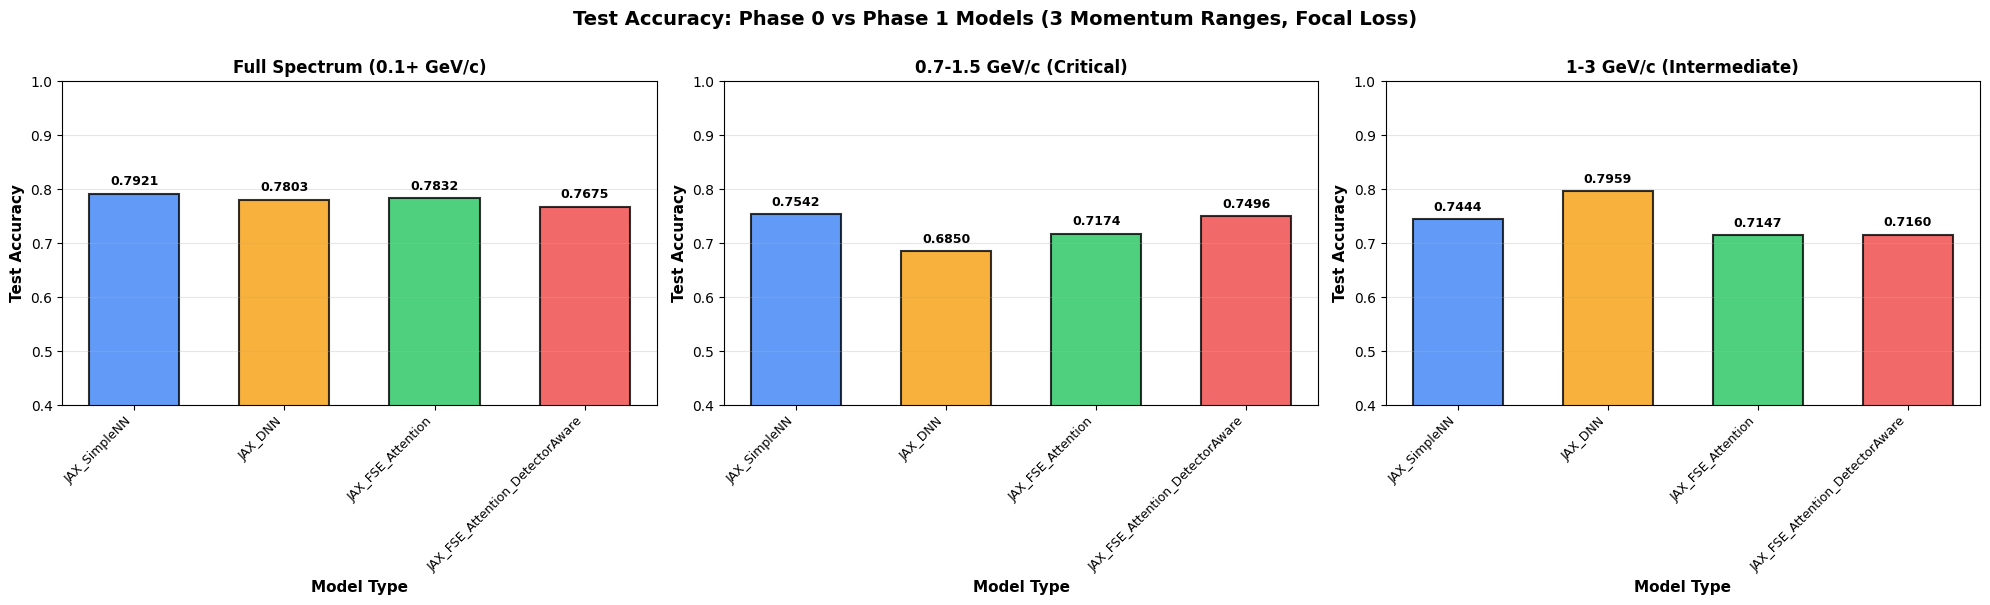

✓ Model accuracy comparison generated (Phase 0 + Phase 1)


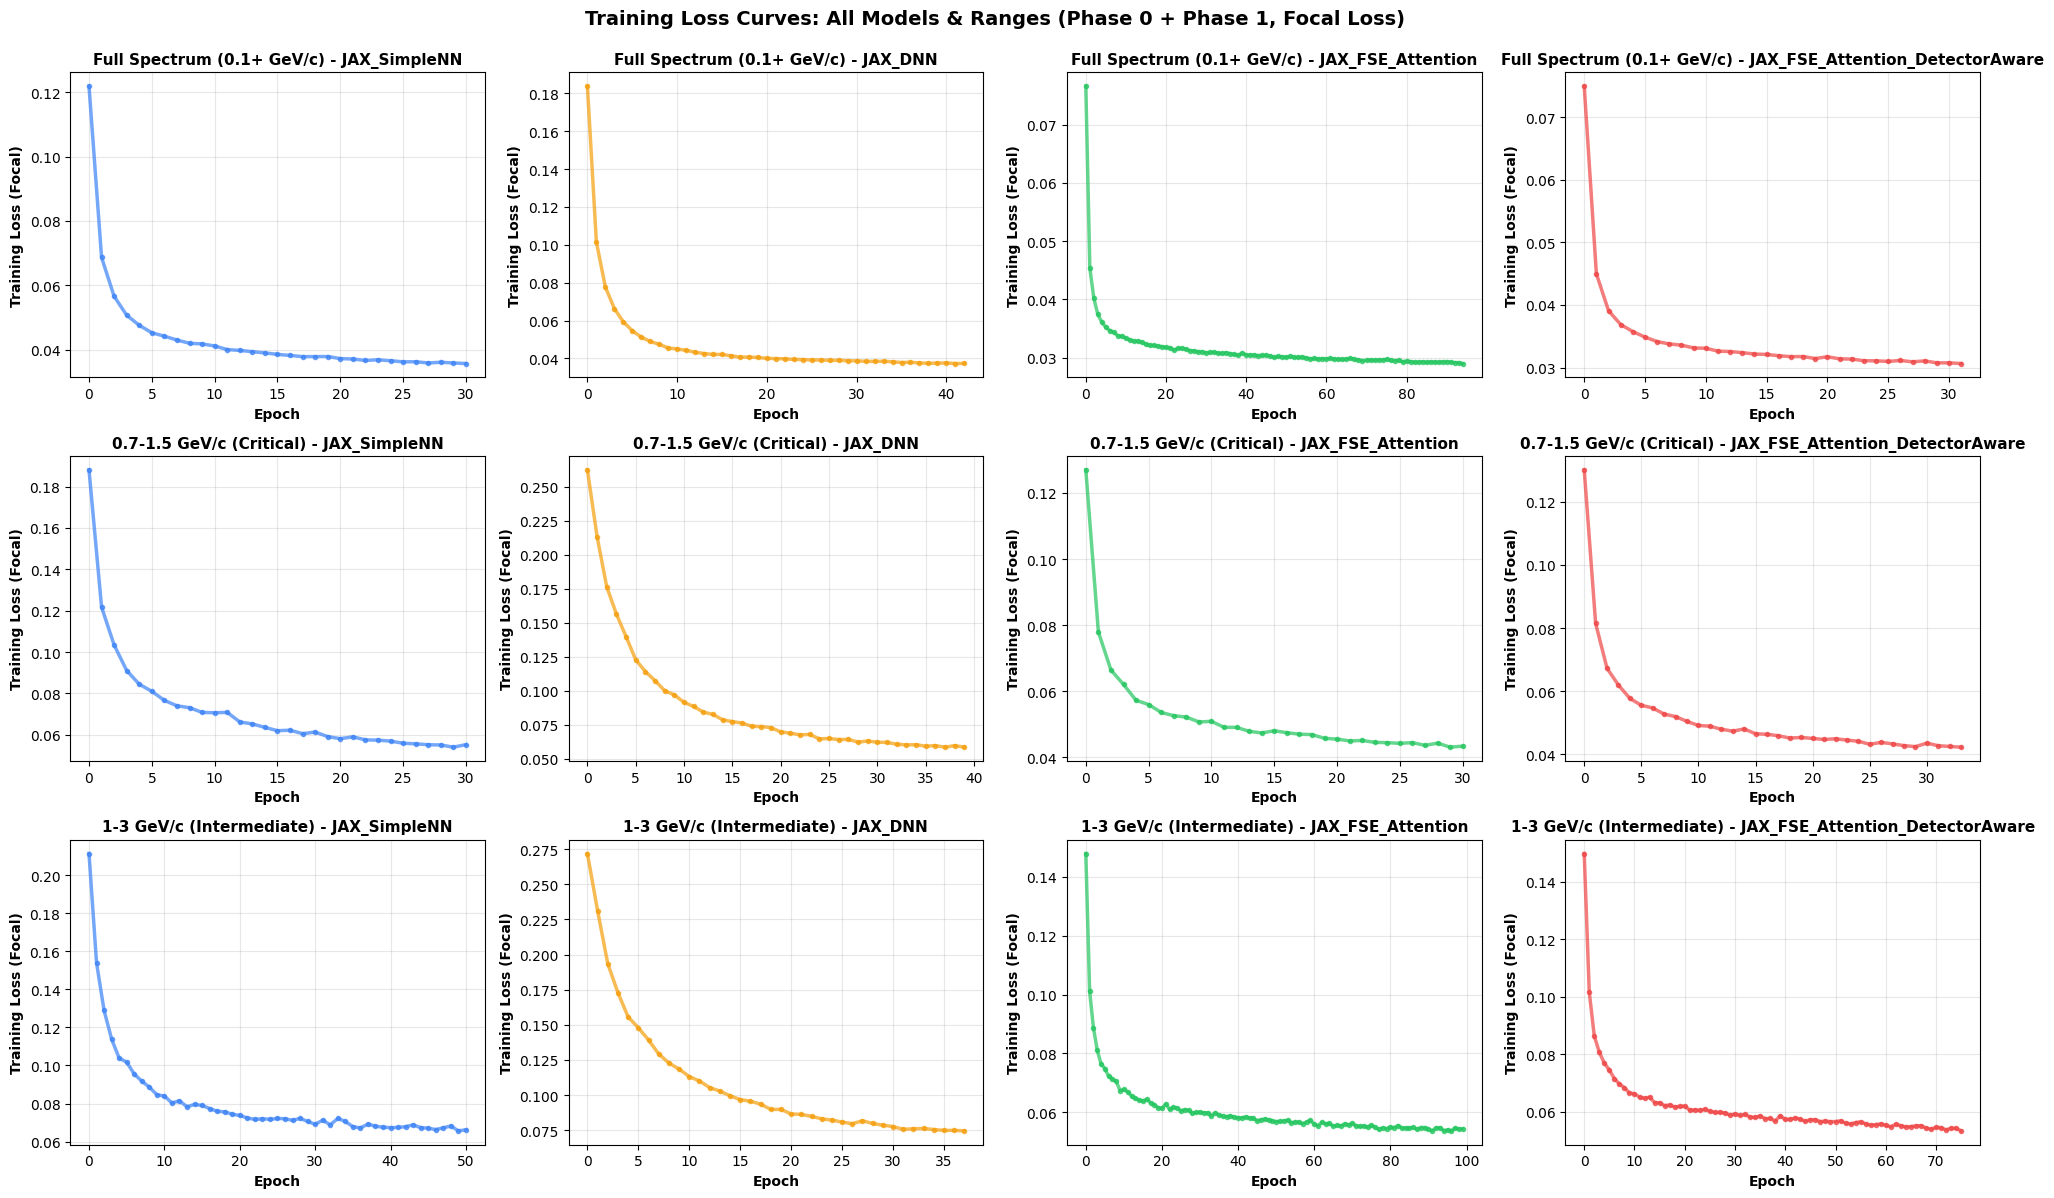

✓ Training curves comparison generated (4 models × 3 ranges)


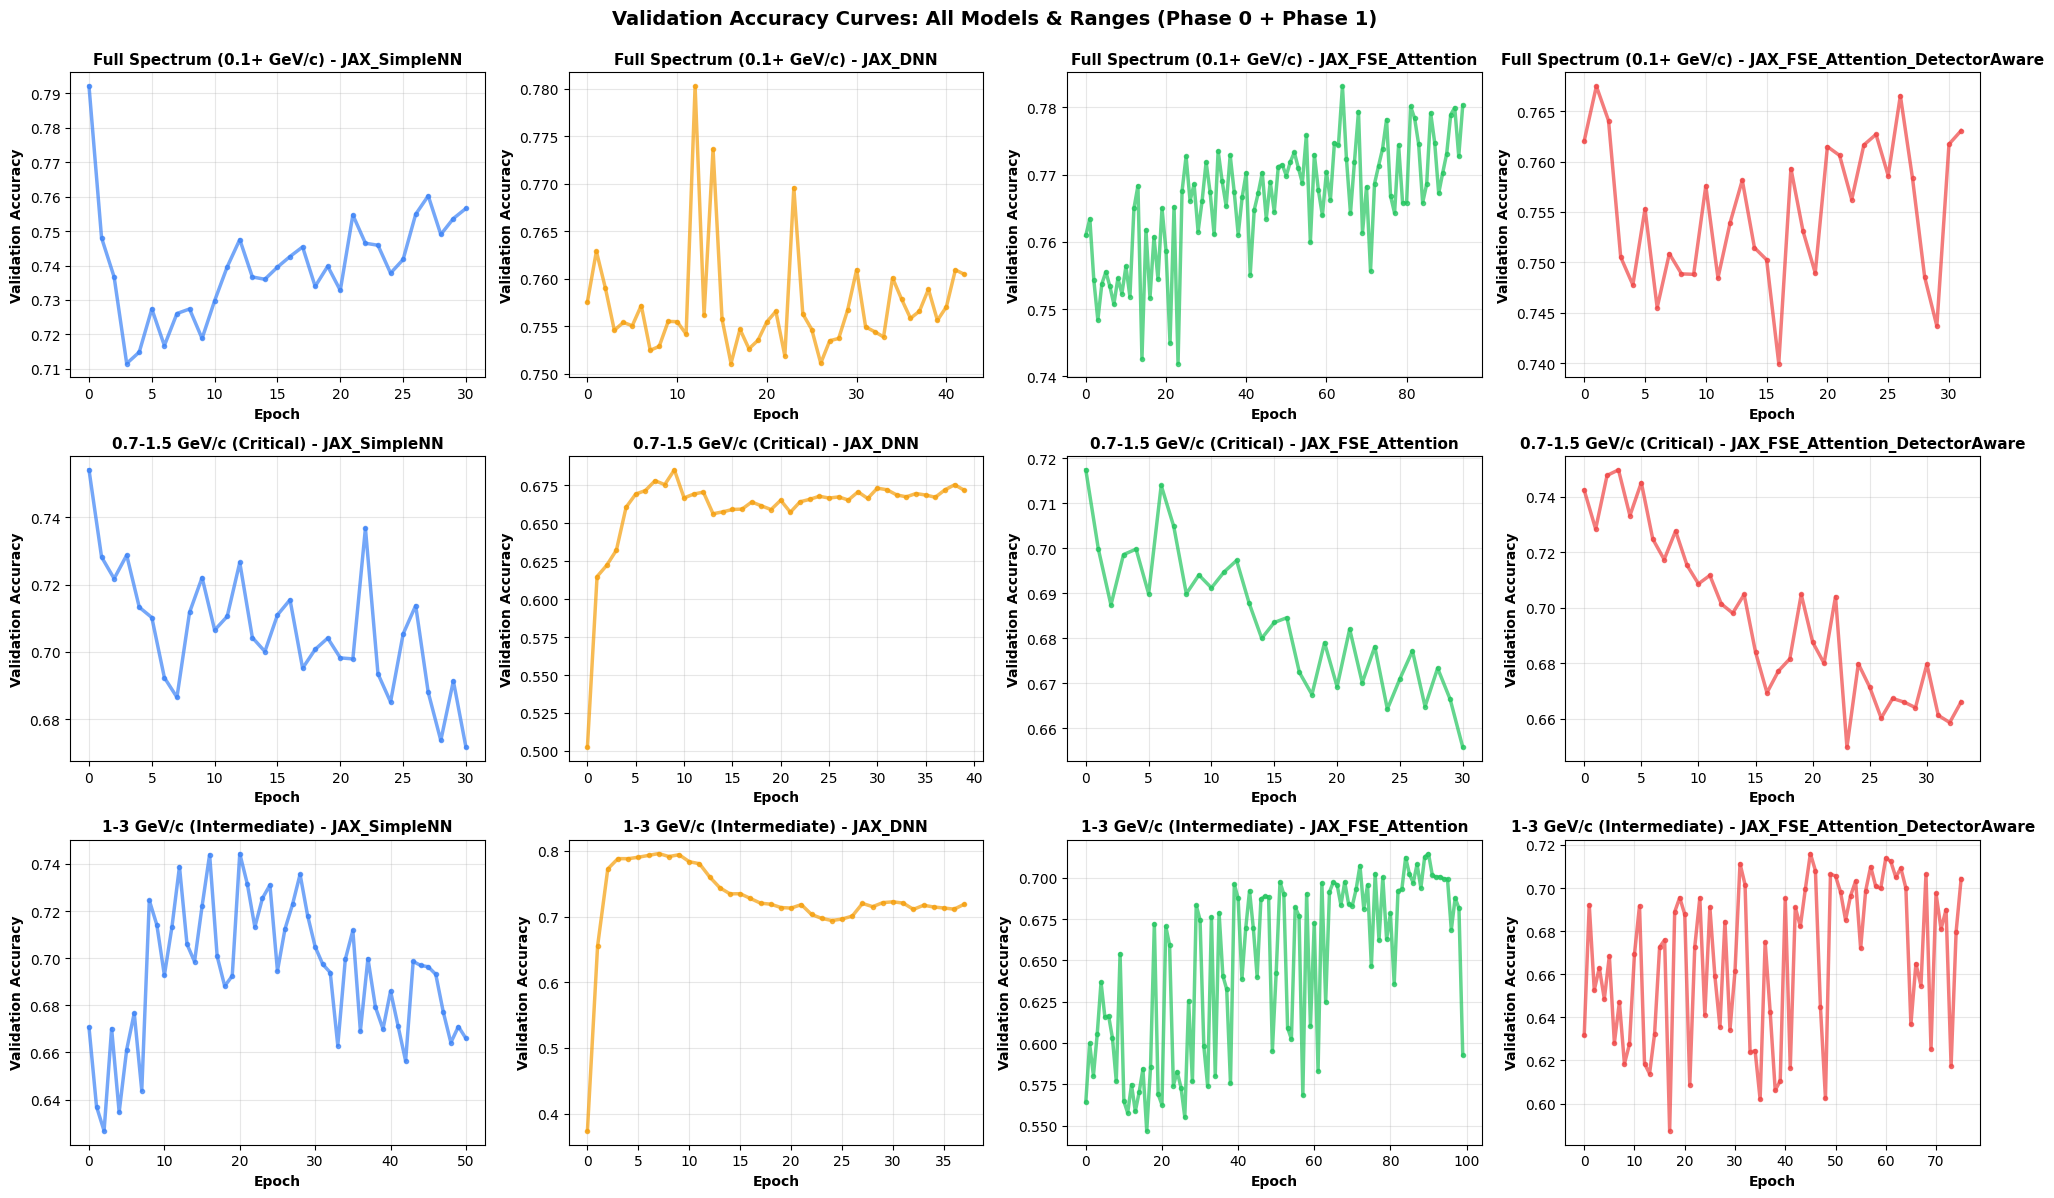

✓ Validation accuracy curves comparison generated (4 models × 3 ranges)


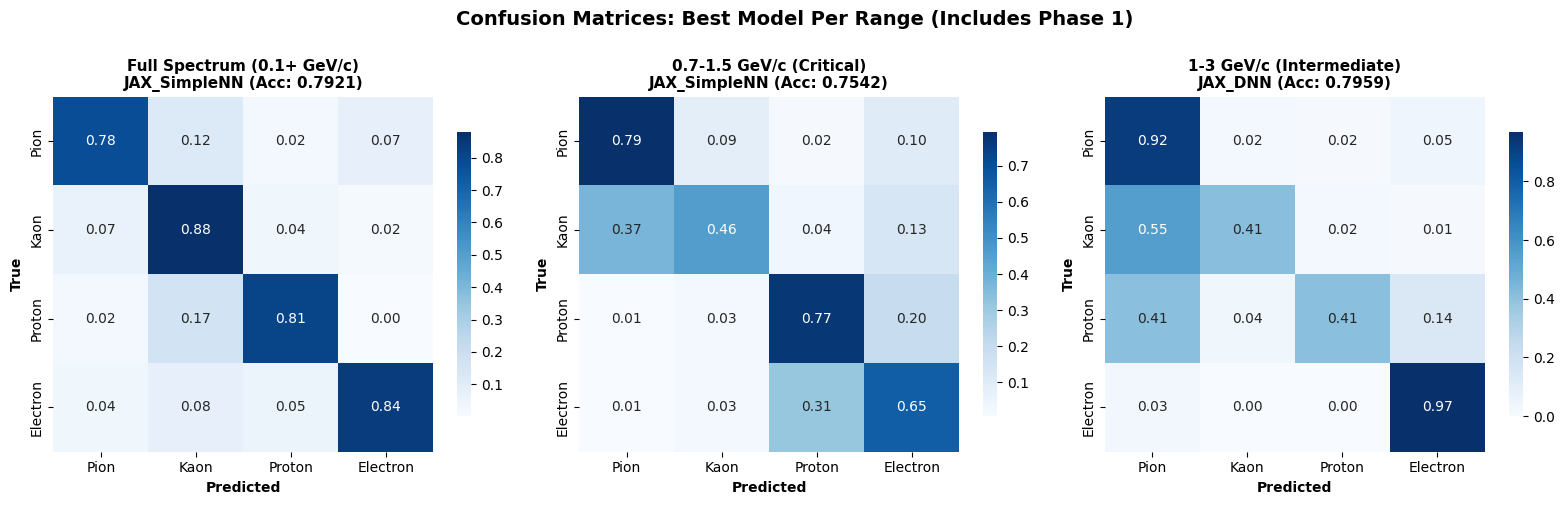

✓ Confusion matrices comparison generated (best models)


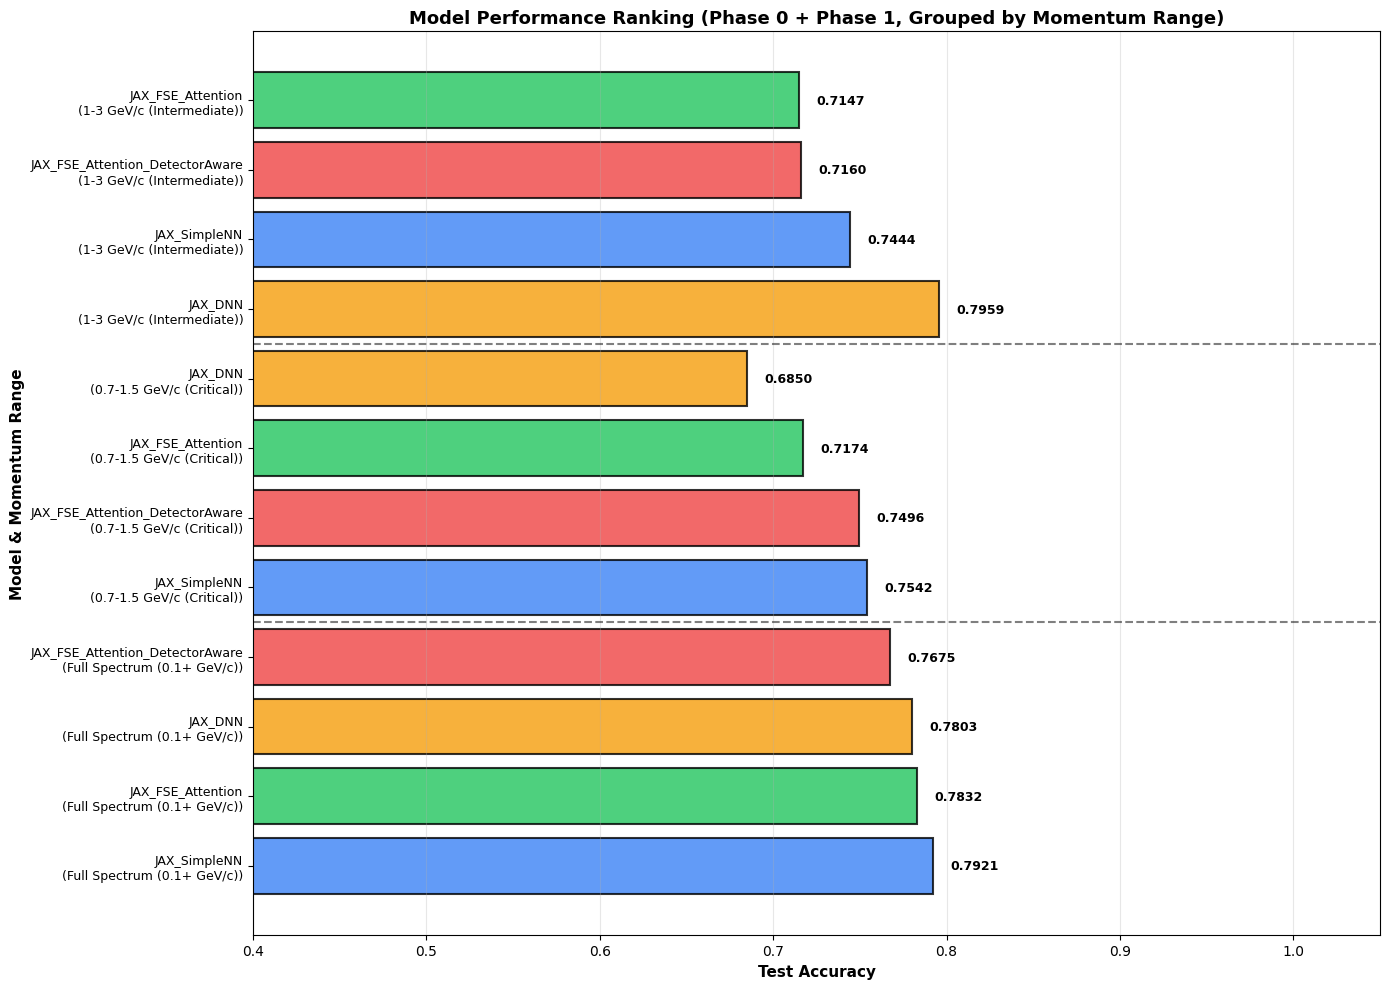

✓ Performance ranking generated (grouped by momentum range, Phase 0 + Phase 1)

✓ SECTION 5A COMPLETE: Comparison Visualisations Generated (12 Models Total)



In [12]:
# ============================================================================
# SECTION 5A: ADVANCED COMPARISON VISUALISATIONS
# ============================================================================

print(f"\n{'#'*80}")
print("SECTION 5A: COMPARISON VISUALISATIONS")
print(f"{'#'*80}")

# Build comprehensive comparison table
comparison_data = []

for mr_key, mr_data in all_results_by_model_and_range.items():
    momentum_range = MOMENTUM_RANGES.get(mr_key, {})
    
    for model_type in MODEL_TYPES:
        # Access models through nested 'models' key
        if 'models' in mr_data and model_type in mr_data['models']:
            results = mr_data['models'][model_type]
            
            comparison_data.append({
                'Momentum Range': momentum_range['name'],
                'Model Type': model_type,
                'Train Acc': f"{results['train_acc']:.4f}",
                'Test Acc': f"{results['test_acc']:.4f}",
                'Best Val Acc': f"{results['best_val_acc']:.4f}"
            })

comparison_df = pd.DataFrame(comparison_data)

print(f"\n{'='*80}")
print("COMPREHENSIVE MODEL COMPARISON TABLE (12 Models - Including Phase 1)")
print(f"{'='*80}\n")
print(comparison_df.to_string(index=False))
print()

# ============================================================================
# COMPARISON: TEST ACCURACY BY MODEL (Bar Chart) - 3 RANGES - UPDATED COLORS
# ============================================================================

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Model colors
model_colors = {
    'JAX_SimpleNN': '#3B82F6',           # Blue
    'JAX_DNN': '#F59E0B',                # Amber
    'JAX_FSE_Attention': '#22C55E',      # Green
    'JAX_FSE_Attention_DetectorAware': '#EF4444'  # Red (Phase 1)
}

for plot_idx, (mr_key, mr_data) in enumerate(all_results_by_model_and_range.items()):
    momentum_range = MOMENTUM_RANGES.get(mr_key, {})
    
    model_labels = []
    test_accs = []
    colors = []
    
    # Access models through nested 'models' key
    if 'models' in mr_data:
        for model_type in MODEL_TYPES:
            if model_type in mr_data['models']:
                model_labels.append(model_type)
                test_accs.append(mr_data['models'][model_type]['test_acc'])
                colors.append(model_colors[model_type])
    
    # Set up bar positions
    x = np.arange(len(model_labels))
    width = 0.6
    
    # Plot bars
    bars = axes[plot_idx].bar(x, test_accs, width, 
                              color=colors, alpha=0.8, 
                              edgecolor='black', linewidth=1.5)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        axes[plot_idx].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                          f'{height:.4f}', ha='center', va='bottom', 
                          fontsize=9, fontweight='bold')
    
    # Customise plot
    axes[plot_idx].set_xlabel('Model Type', fontsize=11, fontweight='bold')
    axes[plot_idx].set_ylabel('Test Accuracy', fontsize=11, fontweight='bold')
    axes[plot_idx].set_title(f'{momentum_range["name"]}', 
                            fontsize=12, fontweight='bold')
    axes[plot_idx].set_xticks(x)
    axes[plot_idx].set_xticklabels(model_labels, rotation=45, ha='right', fontsize=9)
    axes[plot_idx].set_ylim([0.4, 1.0])
    axes[plot_idx].grid(axis='y', alpha=0.3)

plt.suptitle('Test Accuracy: Phase 0 vs Phase 1 Models (3 Momentum Ranges, Focal Loss)', 
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("✓ Model accuracy comparison generated (Phase 0 + Phase 1)")

# ============================================================================
# COMPARISON: TRAINING CURVES (Loss) - 3 RANGES × 4 MODELS
# ============================================================================

fig, axes = plt.subplots(3, 4, figsize=(20, 12))

for mr_idx, (mr_key, mr_data) in enumerate(all_results_by_model_and_range.items()):
    momentum_range = MOMENTUM_RANGES.get(mr_key, {})
    
    for model_idx, model_type in enumerate(MODEL_TYPES):
        ax = axes[mr_idx, model_idx]
        
        # Access models through nested 'models' key
        if 'models' in mr_data and model_type in mr_data['models']:
            results = mr_data['models'][model_type]
            train_losses = np.array(results['train_losses'])
            ax.plot(train_losses, linewidth=2.5, color=model_colors[model_type], 
                   marker='o', markersize=3, alpha=0.7)
        
        ax.set_xlabel('Epoch', fontsize=10, fontweight='bold')
        ax.set_ylabel('Training Loss (Focal)', fontsize=10, fontweight='bold')
        title = f'{momentum_range["name"]} - {model_type}'
        ax.set_title(title, fontsize=11, fontweight='bold')
        ax.grid(alpha=0.3)

plt.suptitle('Training Loss Curves: All Models & Ranges (Phase 0 + Phase 1, Focal Loss)', 
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("✓ Training curves comparison generated (4 models × 3 ranges)")

# ============================================================================
# COMPARISON: VALIDATION ACCURACY CURVES
# ============================================================================

fig, axes = plt.subplots(3, 4, figsize=(20, 12))

for mr_idx, (mr_key, mr_data) in enumerate(all_results_by_model_and_range.items()):
    momentum_range = MOMENTUM_RANGES.get(mr_key, {})
    
    for model_idx, model_type in enumerate(MODEL_TYPES):
        ax = axes[mr_idx, model_idx]
        
        # Access models through nested 'models' key
        if 'models' in mr_data and model_type in mr_data['models']:
            results = mr_data['models'][model_type]
            val_accs = np.array(results['val_accuracies'])
            ax.plot(val_accs, linewidth=2.5, color=model_colors[model_type],
                   marker='o', markersize=3, alpha=0.7)
        
        ax.set_xlabel('Epoch', fontsize=10, fontweight='bold')
        ax.set_ylabel('Validation Accuracy', fontsize=10, fontweight='bold')
        title = f'{momentum_range["name"]} - {model_type}'
        ax.set_title(title, fontsize=11, fontweight='bold')
        ax.grid(alpha=0.3)

plt.suptitle('Validation Accuracy Curves: All Models & Ranges (Phase 0 + Phase 1)', 
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("✓ Validation accuracy curves comparison generated (4 models × 3 ranges)")

# ============================================================================
# COMPARISON: CONFUSION MATRICES (Best Model Per Range)
# ============================================================================

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for mr_idx, (mr_key, mr_data) in enumerate(all_results_by_model_and_range.items()):
    momentum_range = MOMENTUM_RANGES.get(mr_key, {})
    
    # Find best model for this range
    best_acc = 0
    best_model_type = None
    best_results = None
    
    # Access models through nested 'models' key
    if 'models' in mr_data:
        for model_type in MODEL_TYPES:
            if model_type in mr_data['models']:
                results = mr_data['models'][model_type]
                if results['test_acc'] > best_acc:
                    best_acc = results['test_acc']
                    best_model_type = model_type
                    best_results = results
    
    ax = axes[mr_idx]
    
    # Compute confusion matrix
    y_test = best_results['y_test']
    y_pred = best_results['y_pred_test']
    
    cm = confusion_matrix(y_test, np.array(y_pred), normalize='true')
    
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues',
               xticklabels=PARTICLE_NAMES,
               yticklabels=PARTICLE_NAMES,
               cbar_kws={'shrink': 0.8},
               ax=ax,
               cbar=True)
    
    ax.set_xlabel('Predicted', fontsize=10, fontweight='bold')
    ax.set_ylabel('True', fontsize=10, fontweight='bold')
    
    title = f'{momentum_range["name"]}\n{best_model_type} (Acc: {best_acc:.4f})'
    
    ax.set_title(title, fontsize=11, fontweight='bold')

plt.suptitle('Confusion Matrices: Best Model Per Range (Includes Phase 1)', 
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("✓ Confusion matrices comparison generated (best models)")

# ============================================================================
# COMPARISON: MODEL PERFORMANCE RANKING
# ============================================================================

fig, ax = plt.subplots(figsize=(14, 10))

perf_data = []
labels_full = []
colors_list = []

# Build data grouped by momentum range
for mr_key, momentum_range in MOMENTUM_RANGES.items():
    mr_data = all_results_by_model_and_range[mr_key]
    
    # Collect models for this momentum range
    range_models = []
    
    # Access models through nested 'models' key
    if 'models' in mr_data:
        for model_type in MODEL_TYPES:
            if model_type in mr_data['models']:
                results = mr_data['models'][model_type]
                range_models.append({
                    'model_type': model_type,
                    'test_acc': results['test_acc'],
                    'mr_name': momentum_range['name']
                })
    
    # Sort models within this momentum range by test accuracy (descending)
    range_models_sorted = sorted(range_models, key=lambda x: x['test_acc'], reverse=True)
    
    # Add to overall lists (grouped by momentum range, sorted within range)
    for model_info in range_models_sorted:
        perf_data.append(model_info['test_acc'])
        label = f"{model_info['model_type']}\n({model_info['mr_name']})"
        labels_full.append(label)
        colors_list.append(model_colors[model_info['model_type']])

# Plot
bars = ax.barh(range(len(perf_data)), perf_data, color=colors_list, 
               alpha=0.8, edgecolor='black', linewidth=1.5)

# Add value labels
for i, (bar, val) in enumerate(zip(bars, perf_data)):
    ax.text(val + 0.01, bar.get_y() + bar.get_height()/2., 
           f'{val:.4f}', va='center', fontsize=9, fontweight='bold')

ax.set_ylabel('Model & Momentum Range', fontsize=11, fontweight='bold')
ax.set_xlabel('Test Accuracy', fontsize=11, fontweight='bold')
ax.set_yticks(range(len(labels_full)))
ax.set_yticklabels(labels_full, fontsize=9)
ax.set_xlim([0.4, 1.05])
ax.grid(axis='x', alpha=0.3)
ax.set_title('Model Performance Ranking (Phase 0 + Phase 1, Grouped by Momentum Range)', 
             fontsize=13, fontweight='bold')

# Add horizontal separators between momentum ranges
separator_positions = [4, 8]
for pos in separator_positions:
    ax.axhline(y=pos - 0.5, color='black', linestyle='--', linewidth=1.5, alpha=0.5)

plt.tight_layout()
plt.show()

print("✓ Performance ranking generated (grouped by momentum range, Phase 0 + Phase 1)")

print(f"\n{'='*80}")
print("✓ SECTION 5A COMPLETE: Comparison Visualisations Generated (12 Models Total)")
print(f"{'='*80}\n")




### Section 5B: ROC/AUC Curves and Summary Statistics


################################################################################
SECTION 5B: ROC/AUC CURVES AND SUMMARY STATISTICS
################################################################################


PART 1: MACRO-AVERAGE ROC CURVES (PHASE 0 + PHASE 1)
(Model Comparison per Momentum Range)



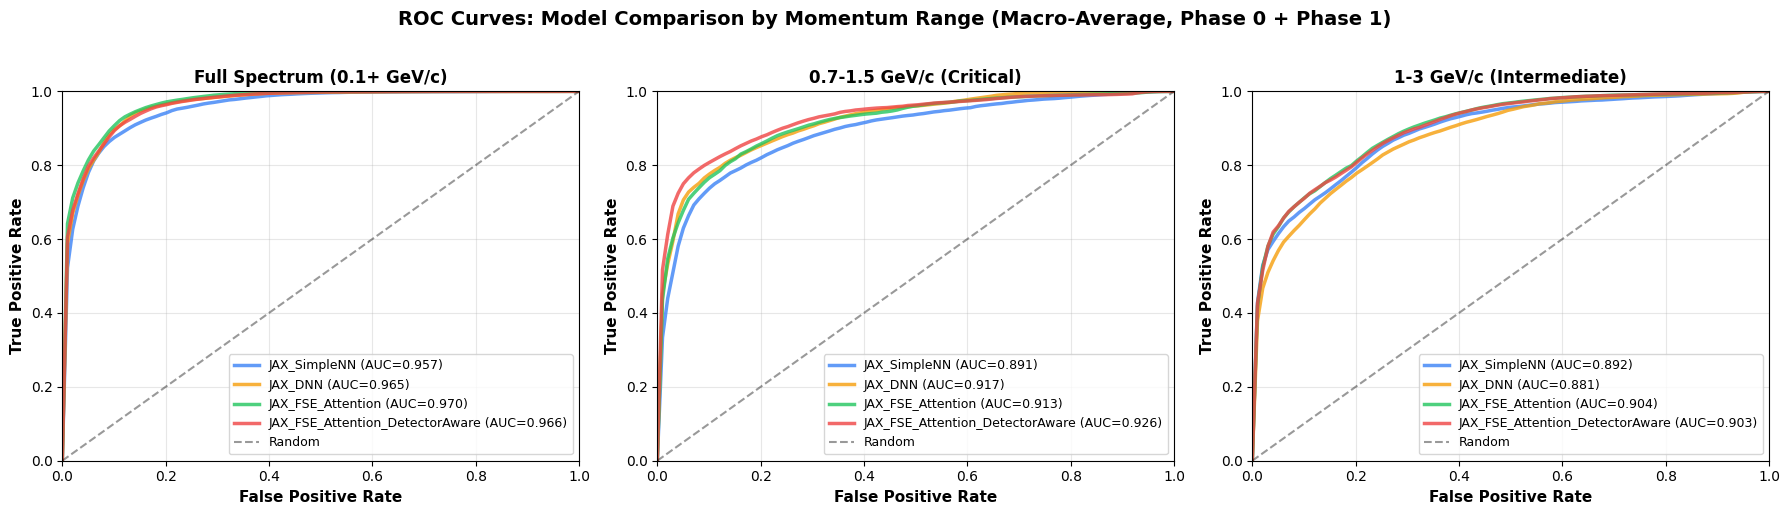

✓ Macro-average ROC curves generated (3 plots, 4 models each)

PART 2: ONE-VS-REST ROC CURVES (PHASE 0 + PHASE 1)
(All Models & Ranges, showing per-particle AUC)



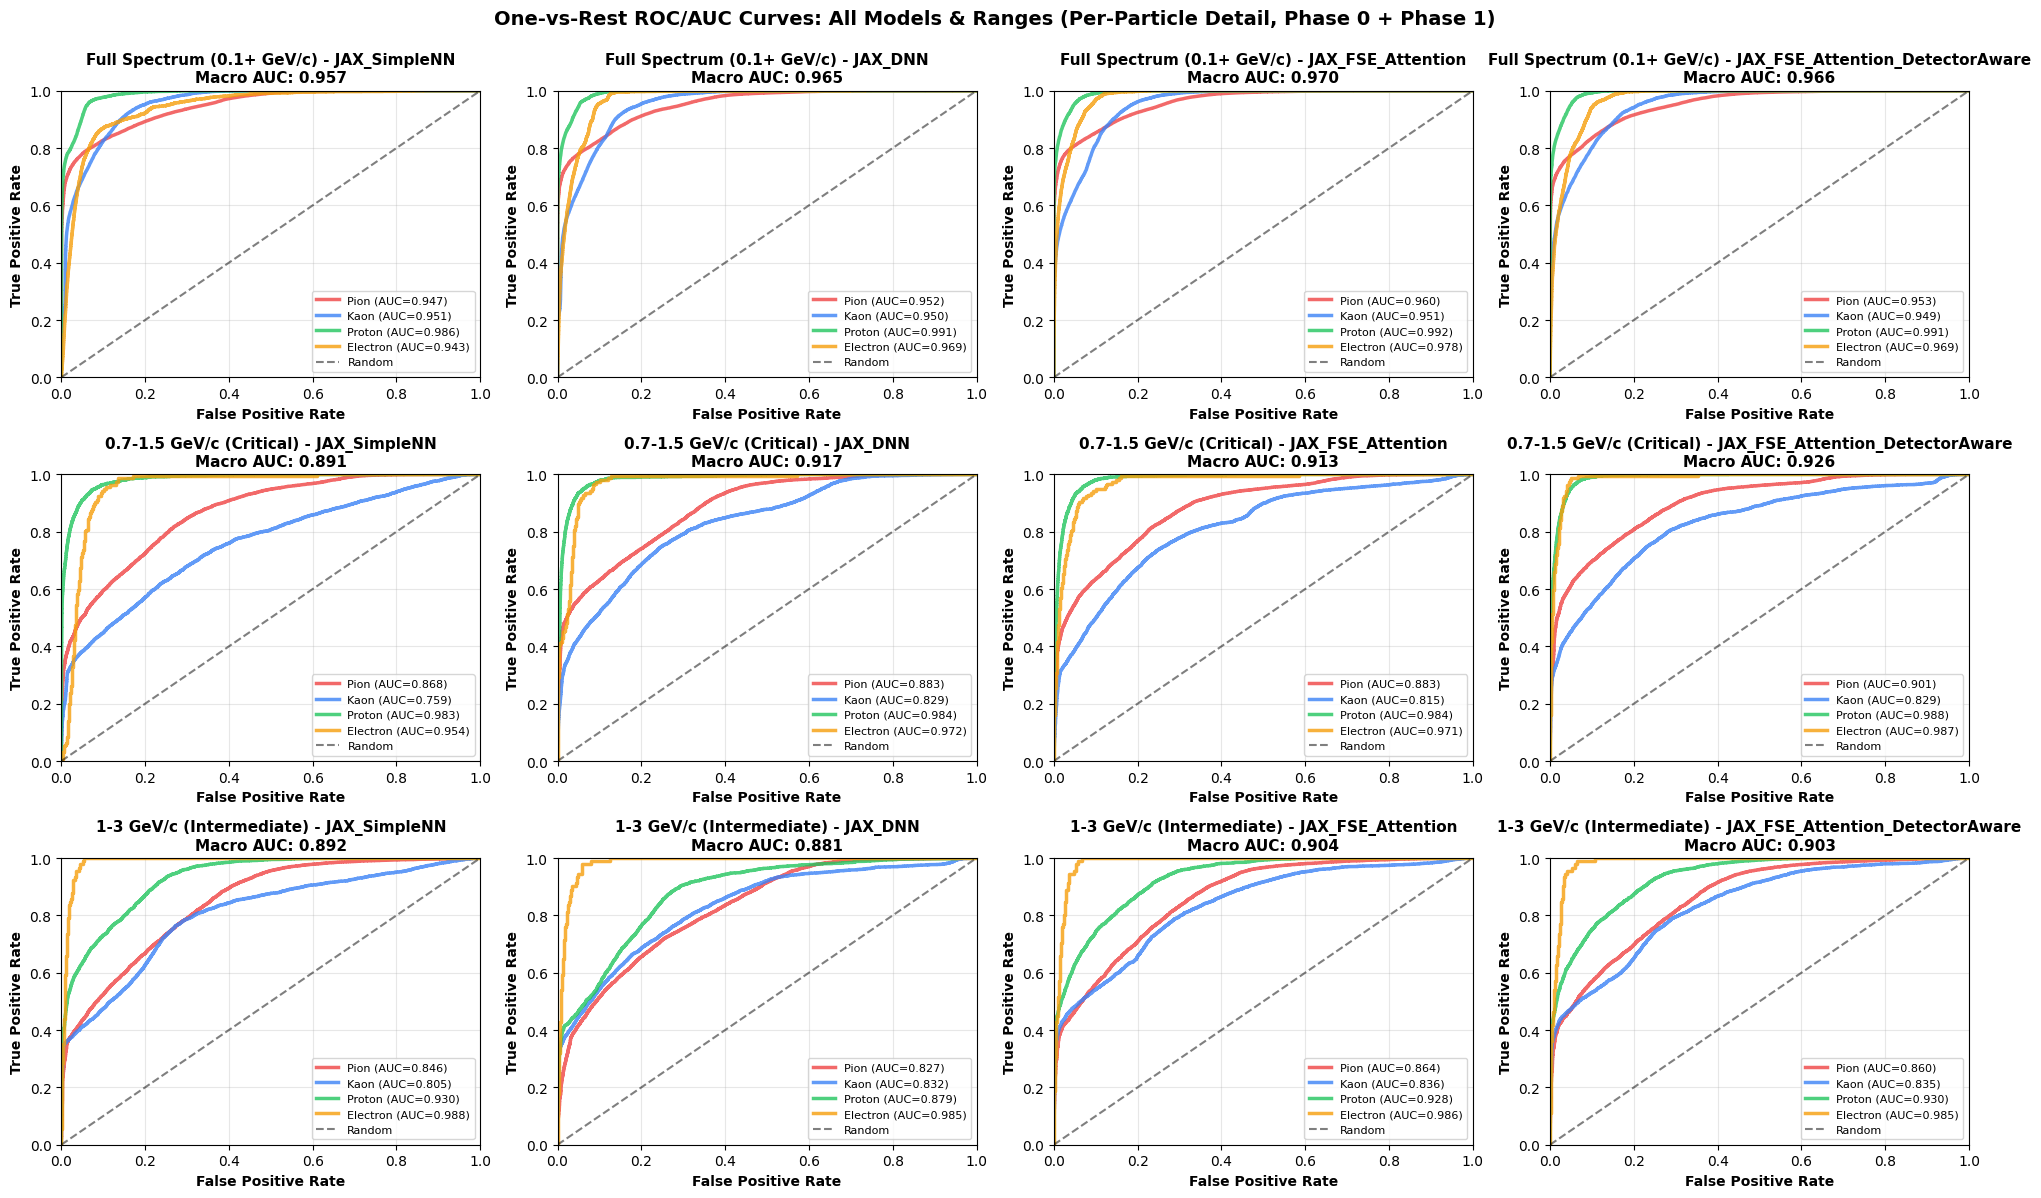

✓ One-vs-Rest ROC curves generated (12 plots, 4 particles each)

PART 3: SUMMARY STATISTICS - PER-CLASS PERFORMANCE (PHASE 0 + PHASE 1)

            Momentum Range                      Model Type Particle Precision Recall F1-Score  Support
Full Spectrum (0.1+ GeV/c)                    JAX_SimpleNN     Pion    0.9911 0.7830   0.8748   114450
Full Spectrum (0.1+ GeV/c)                    JAX_SimpleNN     Kaon    0.3541 0.8791   0.5048     9451
Full Spectrum (0.1+ GeV/c)                    JAX_SimpleNN   Proton    0.6037 0.8123   0.6926     5332
Full Spectrum (0.1+ GeV/c)                    JAX_SimpleNN Electron    0.1878 0.8378   0.3068     2362
Full Spectrum (0.1+ GeV/c)                         JAX_DNN     Pion    0.9941 0.7658   0.8652   114450
Full Spectrum (0.1+ GeV/c)                         JAX_DNN     Kaon    0.3654 0.8669   0.5142     9451
Full Spectrum (0.1+ GeV/c)                         JAX_DNN   Proton    0.4981 0.9034   0.6421     5332
Full Spectrum (0.1+ GeV/c)             

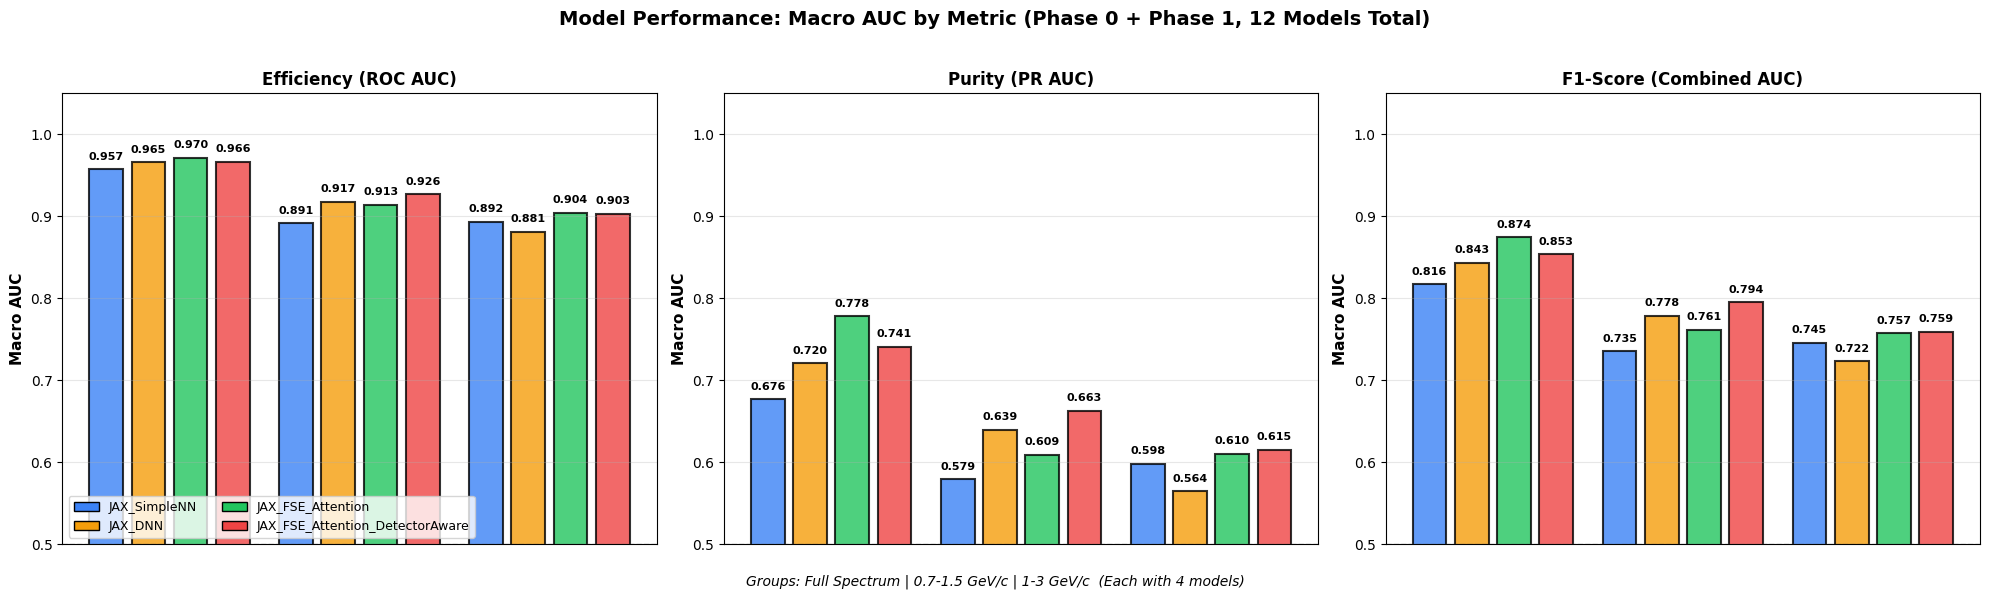

✓ Macro AUC by metric generated (Efficiency/Purity/F1-Score, Phase 0 + Phase 1)

✓ SECTION 5B COMPLETE: ROC/AUC CURVES AND PERFORMANCE METRICS

  Generated:
  • Part 1: Macro-average ROC curves (3 plots, 4 models each)
  • Part 2: One-vs-Rest ROC curves (12 plots, 4 particles each)
  • Part 3: Per-class performance statistics (Precision/Recall/F1-Score)
  • Part 4: Overall accuracy & macro AUC summary
  • Part 5: Macro AUC by metric (Efficiency/Purity/F1-Score)

  Total: 12 models (4 models × 3 momentum ranges)
  Including Phase 0 (3 models) + Phase 1 (1 new model)
  Total visualisations: 28 plots + 3 summary tables



In [14]:
# ============================================================================
# SECTION 5B: ROC/AUC CURVES AND SUMMARY STATISTICS (COMPLETE - PHASE 1 UPDATED)
# ============================================================================

print(f"\n{'#'*80}")
print("SECTION 5B: ROC/AUC CURVES AND SUMMARY STATISTICS")
print(f"{'#'*80}\n")

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score, precision_recall_curve

# Particle colors
particle_colors = {
    'Pion': '#EF4444',      # Red
    'Kaon': '#3B82F6',      # Blue
    'Proton': '#22C55E',    # Green
    'Electron': '#F59E0B'   # Amber
}

# ============================================================================
# PART 1: ROC CURVES - MACRO-AVERAGE (3 plots, 4 models each - PHASE 1 INCLUDED)
# ============================================================================

print(f"\n{'='*80}")
print("PART 1: MACRO-AVERAGE ROC CURVES (PHASE 0 + PHASE 1)")
print(f"(Model Comparison per Momentum Range)")
print(f"{'='*80}\n")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for mr_idx, (mr_key, momentum_range) in enumerate(MOMENTUM_RANGES.items()):
    mr_data = all_results_by_model_and_range[mr_key]
    ax = axes[mr_idx]
    
    # Plot ROC curve for each model (including Phase 1)
    for model_type in MODEL_TYPES:
        if 'models' in mr_data and model_type in mr_data['models']:
            results = mr_data['models'][model_type]
            
            y_test = np.array(results['y_test'])
            y_pred_probs = np.array(results['test_probs'])
            
            # Binarize labels for one-vs-rest
            y_test_bin = label_binarize(y_test, classes=np.arange(NUM_CLASSES))
            
            # Compute macro-average ROC
            fpr_all = []
            tpr_all = []
            aucs = []
            
            for i in range(NUM_CLASSES):
                fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
                fpr_all.append(fpr)
                tpr_all.append(tpr)
                aucs.append(auc(fpr, tpr))
            
            # Interpolate all ROC curves to common FPR points
            mean_fpr = np.linspace(0, 1, 100)
            tprs_interp = []
            
            for i in range(NUM_CLASSES):
                # FIXED: Interpolate to mean_fpr, not set to 0.0!
                tpr_interp = np.interp(mean_fpr, fpr_all[i], tpr_all[i])
                tpr_interp[0] = 0.0  # Start at (0,0)
                tprs_interp.append(tpr_interp)
            
            # Macro-average TPR and AUC
            mean_tpr = np.mean(tprs_interp, axis=0)
            mean_tpr[-1] = 1.0  # Now this works (mean_tpr is array, not float)
            macro_auc = np.mean(aucs)
            
            # Plot macro-average ROC
            ax.plot(mean_fpr, mean_tpr,
                   color=model_colors[model_type],
                   linewidth=2.5,
                   label=f'{model_type} (AUC={macro_auc:.3f})',
                   alpha=0.8)
    
    # Plot diagonal
    ax.plot([0, 1], [0, 1], 'k--', linewidth=1.5, alpha=0.4, label='Random')
    
    ax.set_xlabel('False Positive Rate', fontsize=11, fontweight='bold')
    ax.set_ylabel('True Positive Rate', fontsize=11, fontweight='bold')
    ax.set_title(f'{momentum_range["name"]}', fontsize=12, fontweight='bold')
    ax.legend(loc='lower right', fontsize=9)
    ax.grid(alpha=0.3)
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])

plt.suptitle('ROC Curves: Model Comparison by Momentum Range (Macro-Average, Phase 0 + Phase 1)', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("✓ Macro-average ROC curves generated (3 plots, 4 models each)")


# ============================================================================
# PART 2: ROC CURVES - ONE-VS-REST PER PARTICLE (12 plots, all particles - PHASE 1)
# ============================================================================

print(f"\n{'='*80}")
print("PART 2: ONE-VS-REST ROC CURVES (PHASE 0 + PHASE 1)")
print(f"(All Models & Ranges, showing per-particle AUC)")
print(f"{'='*80}\n")

fig, axes = plt.subplots(3, 4, figsize=(20, 12))

for mr_idx, (mr_key, mr_data) in enumerate(all_results_by_model_and_range.items()):
    momentum_range = MOMENTUM_RANGES.get(mr_key, {})
    
    for model_idx, model_type in enumerate(MODEL_TYPES):
        ax = axes[mr_idx, model_idx]
        
        # Access models through nested 'models' key
        if 'models' in mr_data and model_type in mr_data['models']:
            results = mr_data['models'][model_type]
            
            y_test = np.array(results['y_test'])
            y_pred_probs = np.array(results['test_probs'])
            
            # Compute ROC curve (One-vs-Rest)
            y_test_bin = label_binarize(y_test, classes=np.arange(NUM_CLASSES))
            
            fpr_macro = []
            tpr_macro = []
            roc_auc_macro = []
            
            for i in range(NUM_CLASSES):
                fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
                roc_auc = auc(fpr, tpr)
                fpr_macro.append(fpr)
                tpr_macro.append(tpr)
                roc_auc_macro.append(roc_auc)
                
                ax.plot(fpr, tpr, label=f'{PARTICLE_NAMES[i]} (AUC={roc_auc:.3f})', 
                       linewidth=2.5, alpha=0.8, color=particle_colors[PARTICLE_NAMES[i]])
            
            # Plot diagonal
            ax.plot([0, 1], [0, 1], 'k--', linewidth=1.5, label='Random', alpha=0.5)
            
            # Macro-average
            macro_auc = np.mean(roc_auc_macro)
            
            ax.set_xlabel('False Positive Rate', fontsize=10, fontweight='bold')
            ax.set_ylabel('True Positive Rate', fontsize=10, fontweight='bold')
            title = f'{momentum_range.get("name", mr_key)} - {model_type}\nMacro AUC: {macro_auc:.3f}'
            ax.set_title(title, fontsize=11, fontweight='bold')
            ax.legend(loc='lower right', fontsize=8)
            ax.grid(alpha=0.3)
            ax.set_xlim([0, 1])
            ax.set_ylim([0, 1])

plt.suptitle('One-vs-Rest ROC/AUC Curves: All Models & Ranges (Per-Particle Detail, Phase 0 + Phase 1)', 
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("✓ One-vs-Rest ROC curves generated (12 plots, 4 particles each)")


# ============================================================================
# PART 3: SUMMARY STATISTICS TABLE: PER-CLASS PERFORMANCE (PHASE 1 INCLUDED)
# ============================================================================

print(f"\n{'='*80}")
print("PART 3: SUMMARY STATISTICS - PER-CLASS PERFORMANCE (PHASE 0 + PHASE 1)")
print(f"{'='*80}\n")

summary_stats = []

for mr_key, mr_data in all_results_by_model_and_range.items():
    momentum_range = MOMENTUM_RANGES.get(mr_key, {})
    
    # Access models through nested 'models' key
    if 'models' in mr_data:
        for model_type in MODEL_TYPES:
            if model_type in mr_data['models']:
                results = mr_data['models'][model_type]
                
                y_test = np.array(results['y_test'])
                y_pred = np.array(results['y_pred_test'])
                
                # Per-class precision, recall, f1
                report = classification_report(y_test, y_pred, 
                                             target_names=PARTICLE_NAMES,
                                             output_dict=True, zero_division=0)
                
                for particle_idx, particle_name in enumerate(PARTICLE_NAMES):
                    summary_stats.append({
                        'Momentum Range': momentum_range.get('name', mr_key),
                        'Model Type': model_type,
                        'Particle': particle_name,
                        'Precision': f"{report[particle_name]['precision']:.4f}",
                        'Recall': f"{report[particle_name]['recall']:.4f}",
                        'F1-Score': f"{report[particle_name]['f1-score']:.4f}",
                        'Support': int(report[particle_name]['support'])
                    })

summary_stats_df = pd.DataFrame(summary_stats)
print(summary_stats_df.to_string(index=False))
print()


# ============================================================================
# PART 4: OVERALL ACCURACY & MACRO AUC SUMMARY
# ============================================================================

print(f"\n{'='*80}")
print("PART 4: OVERALL ACCURACY & MACRO AUC SUMMARY (PHASE 0 + PHASE 1)")
print(f"{'='*80}\n")

overall_summary = []

for mr_key, mr_data in all_results_by_model_and_range.items():
    momentum_range = MOMENTUM_RANGES.get(mr_key, {})
    
    # Access models through nested 'models' key
    if 'models' in mr_data:
        for model_type in MODEL_TYPES:
            if model_type in mr_data['models']:
                results = mr_data['models'][model_type]
                
                y_test = np.array(results['y_test'])
                y_pred = np.array(results['y_pred_test'])
                y_pred_probs = np.array(results['test_probs'])
                
                # Overall accuracy
                overall_acc = accuracy_score(y_test, y_pred)
                
                # Macro AUC
                y_test_bin = label_binarize(y_test, classes=np.arange(NUM_CLASSES))
                
                macro_auc_list = []
                for i in range(NUM_CLASSES):
                    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
                    roc_auc = auc(fpr, tpr)
                    macro_auc_list.append(roc_auc)
                
                macro_auc = np.mean(macro_auc_list)
                
                overall_summary.append({
                    'Momentum Range': momentum_range.get('name', mr_key),
                    'Model Type': model_type,
                    'Test Accuracy': f"{overall_acc:.4f}",
                    'Macro AUC': f"{macro_auc:.4f}",
                    'Best Val Acc': f"{results['best_val_acc']:.4f}"
                })

overall_summary_df = pd.DataFrame(overall_summary)
print(overall_summary_df.to_string(index=False))
print()


# ============================================================================
# PART 5: MACRO AUC BY METRIC (Efficiency, Purity, F1-Score - PHASE 1)
# ============================================================================

print(f"\n{'='*80}")
print("PART 5: MACRO AUC BY METRIC - EFFICIENCY, PURITY, F1-SCORE")
print(f"(Model Comparison per Metric, All Ranges - Phase 0 + Phase 1)")
print(f"{'='*80}\n")

# Build AUC data for efficiency (recall), purity (precision), and F1-score
comparison_metrics = {
    'efficiency_auc': [],
    'purity_auc': [],
    'f1_auc': []
}

model_labels_metric = []
range_labels_metric = []

for mr_key, momentum_range in MOMENTUM_RANGES.items():
    mr_data = all_results_by_model_and_range[mr_key]
    
    for model_type in MODEL_TYPES:
        if 'models' in mr_data and model_type in mr_data['models']:
            results = mr_data['models'][model_type]
            
            y_test = np.array(results['y_test'])
            y_pred = np.array(results['y_pred_test'])
            y_pred_probs = np.array(results['test_probs'])
            
            # Binarize labels for one-vs-rest
            y_test_bin = label_binarize(y_test, classes=np.arange(NUM_CLASSES))
            
            # Compute AUC for each particle
            efficiency_aucs = []  # ROC AUC (Recall-based)
            purity_aucs = []      # PR AUC (Precision-Recall)
            f1_aucs = []          # Combined AUC
            
            for i in range(NUM_CLASSES):
                # ROC curve for this class (Efficiency)
                fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
                roc_auc = auc(fpr, tpr)
                efficiency_aucs.append(roc_auc)
                
                # Precision-Recall curve (Purity)
                precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_probs[:, i])
                pr_auc = auc(recall, precision)
                purity_aucs.append(pr_auc)
                
                # F1 AUC (combination of ROC and PR)
                f1_auc_proxy = (roc_auc + pr_auc) / 2.0
                f1_aucs.append(f1_auc_proxy)
            
            # Macro-average across all particles
            avg_efficiency_auc = np.mean(efficiency_aucs)
            avg_purity_auc = np.mean(purity_aucs)
            avg_f1_auc = np.mean(f1_aucs)
            
            comparison_metrics['efficiency_auc'].append(avg_efficiency_auc)
            comparison_metrics['purity_auc'].append(avg_purity_auc)
            comparison_metrics['f1_auc'].append(avg_f1_auc)
            
            model_labels_metric.append(model_type)
            range_labels_metric.append(momentum_range['name'])

# ============================================================================
# PLOT: MACRO AUC BY METRIC (3 subplots - PHASE 1)
# ============================================================================

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

metrics = ['efficiency_auc', 'purity_auc', 'f1_auc']
titles = ['Efficiency (ROC AUC)', 'Purity (PR AUC)', 'F1-Score (Combined AUC)']

for metric_idx, (metric, title) in enumerate(zip(metrics, titles)):
    ax = axes[metric_idx]
    
    # Group data by momentum range
    bar_positions = []
    bar_values = []
    bar_colors = []
    
    position = 0
    for mr_key, momentum_range in MOMENTUM_RANGES.items():
        mr_name = momentum_range['name']
        
        # Get data for this momentum range
        data_for_range = []
        colors_for_range = []
        
        for i, (model, range_name) in enumerate(zip(model_labels_metric, range_labels_metric)):
            if range_name == mr_name:
                data_for_range.append(comparison_metrics[metric][i])
                colors_for_range.append(model_colors[model])
        
        # Plot bars for this momentum range
        for j, (val, color) in enumerate(zip(data_for_range, colors_for_range)):
            bar_positions.append(position)
            bar_values.append(val)
            bar_colors.append(color)
            position += 1
        
        # Add spacing between momentum ranges
        position += 0.5
    
    # Create bars
    bars = ax.bar(bar_positions, bar_values, 
                 color=bar_colors, 
                 alpha=0.8, 
                 edgecolor='black', 
                 linewidth=1.5,
                 width=0.8)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
               f'{height:.3f}', ha='center', va='bottom',
               fontsize=8, fontweight='bold')
    
    # Customise plot
    ax.set_ylabel('Macro AUC', fontsize=11, fontweight='bold')
    ax.set_title(f'{title}', fontsize=12, fontweight='bold')
    ax.set_ylim([0.5, 1.05])
    ax.grid(axis='y', alpha=0.3)
    ax.axhline(y=0.5, color='gray', linestyle='--', linewidth=1, alpha=0.5, label='Random (0.5)')
    
    # Remove x-axis ticks
    ax.set_xticks([])
    
    # Add legend only to first subplot
    if metric_idx == 0:
        from matplotlib.patches import Patch
        legend_elements = [Patch(facecolor=model_colors[mt], 
                                edgecolor='black', 
                                label=mt) 
                          for mt in MODEL_TYPES]
        ax.legend(handles=legend_elements, loc='lower left', fontsize=9, ncol=2)

# Add group labels
fig.text(0.5, 0.02, 'Groups: Full Spectrum | 0.7-1.5 GeV/c | 1-3 GeV/c  (Each with 4 models)', 
         ha='center', fontsize=10, style='italic')

plt.suptitle('Model Performance: Macro AUC by Metric (Phase 0 + Phase 1, 12 Models Total)', 
             fontsize=14, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0.05, 1, 0.96])
plt.show()

print("✓ Macro AUC by metric generated (Efficiency/Purity/F1-Score, Phase 0 + Phase 1)")


print(f"\n{'='*80}")
print("✓ SECTION 5B COMPLETE: ROC/AUC CURVES AND PERFORMANCE METRICS")
print(f"{'='*80}")
print(f"\n  Generated:")
print(f"  • Part 1: Macro-average ROC curves (3 plots, 4 models each)")
print(f"  • Part 2: One-vs-Rest ROC curves (12 plots, 4 particles each)")
print(f"  • Part 3: Per-class performance statistics (Precision/Recall/F1-Score)")
print(f"  • Part 4: Overall accuracy & macro AUC summary")
print(f"  • Part 5: Macro AUC by metric (Efficiency/Purity/F1-Score)")
print(f"\n  Total: 12 models (4 models × 3 momentum ranges)")
print(f"  Including Phase 0 (3 models) + Phase 1 (1 new model)")
print(f"  Total visualisations: 28 plots + 3 summary tables")
print(f"{'='*80}\n")


### Section 5C: Per-Class Efficiency & Purity


################################################################################
SECTION 5C: EFFICIENCY, PURITY & FEATURE IMPORTANCE
################################################################################


EFFICIENCY & PURITY PER PARTICLE TYPE


--------------------------------------------------------------------------------
Full Spectrum (0.1+ GeV/c) - JAX_SimpleNN
--------------------------------------------------------------------------------

Particle     Efficiency      Purity          Support   
----------------------------------------------------
Pion         0.7830          0.9911          114450    
Kaon         0.8791          0.3541          9451      
Proton       0.8123          0.6037          5332      
Electron     0.8378          0.1878          2362      

--------------------------------------------------------------------------------
Full Spectrum (0.1+ GeV/c) - JAX_DNN
--------------------------------------------------------------------------------

Part

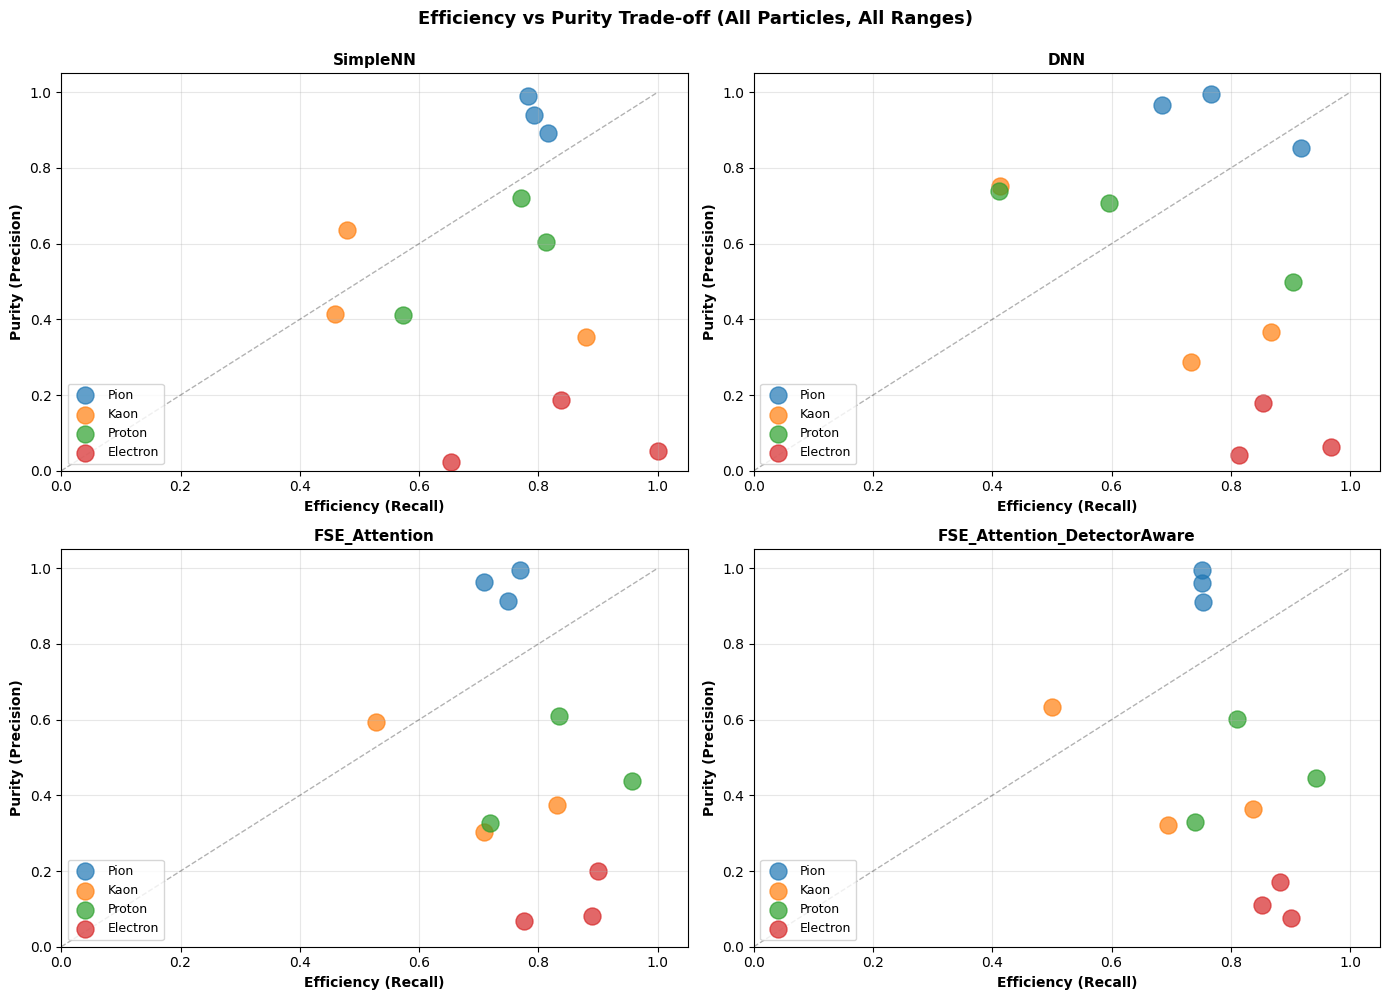


EFFICIENCY COMPARISON ACROSS ALL MODELS (Per Particle)



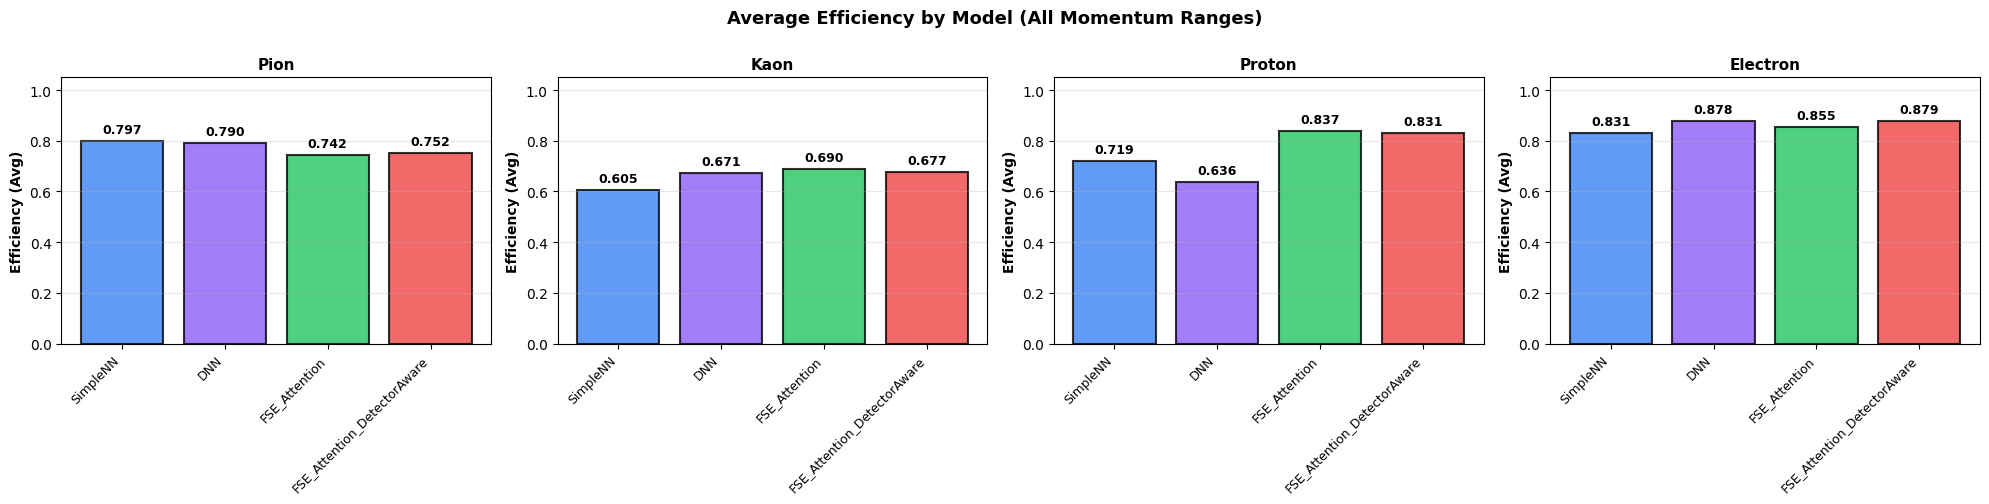

✓ Efficiency comparison plot generated

PURITY COMPARISON ACROSS ALL MODELS (Per Particle)



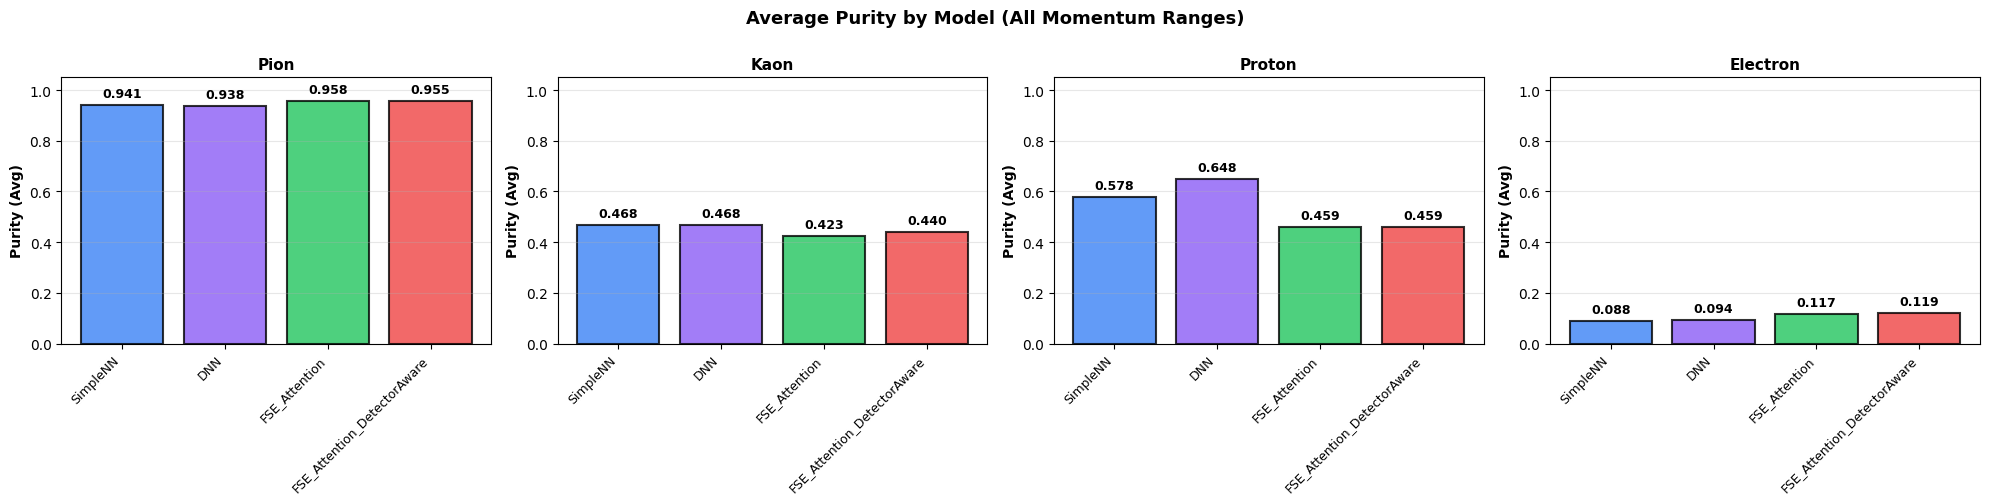

✓ Purity comparison plot generated

COMBINED EFFICIENCY & PURITY COMPARISON (All Models)



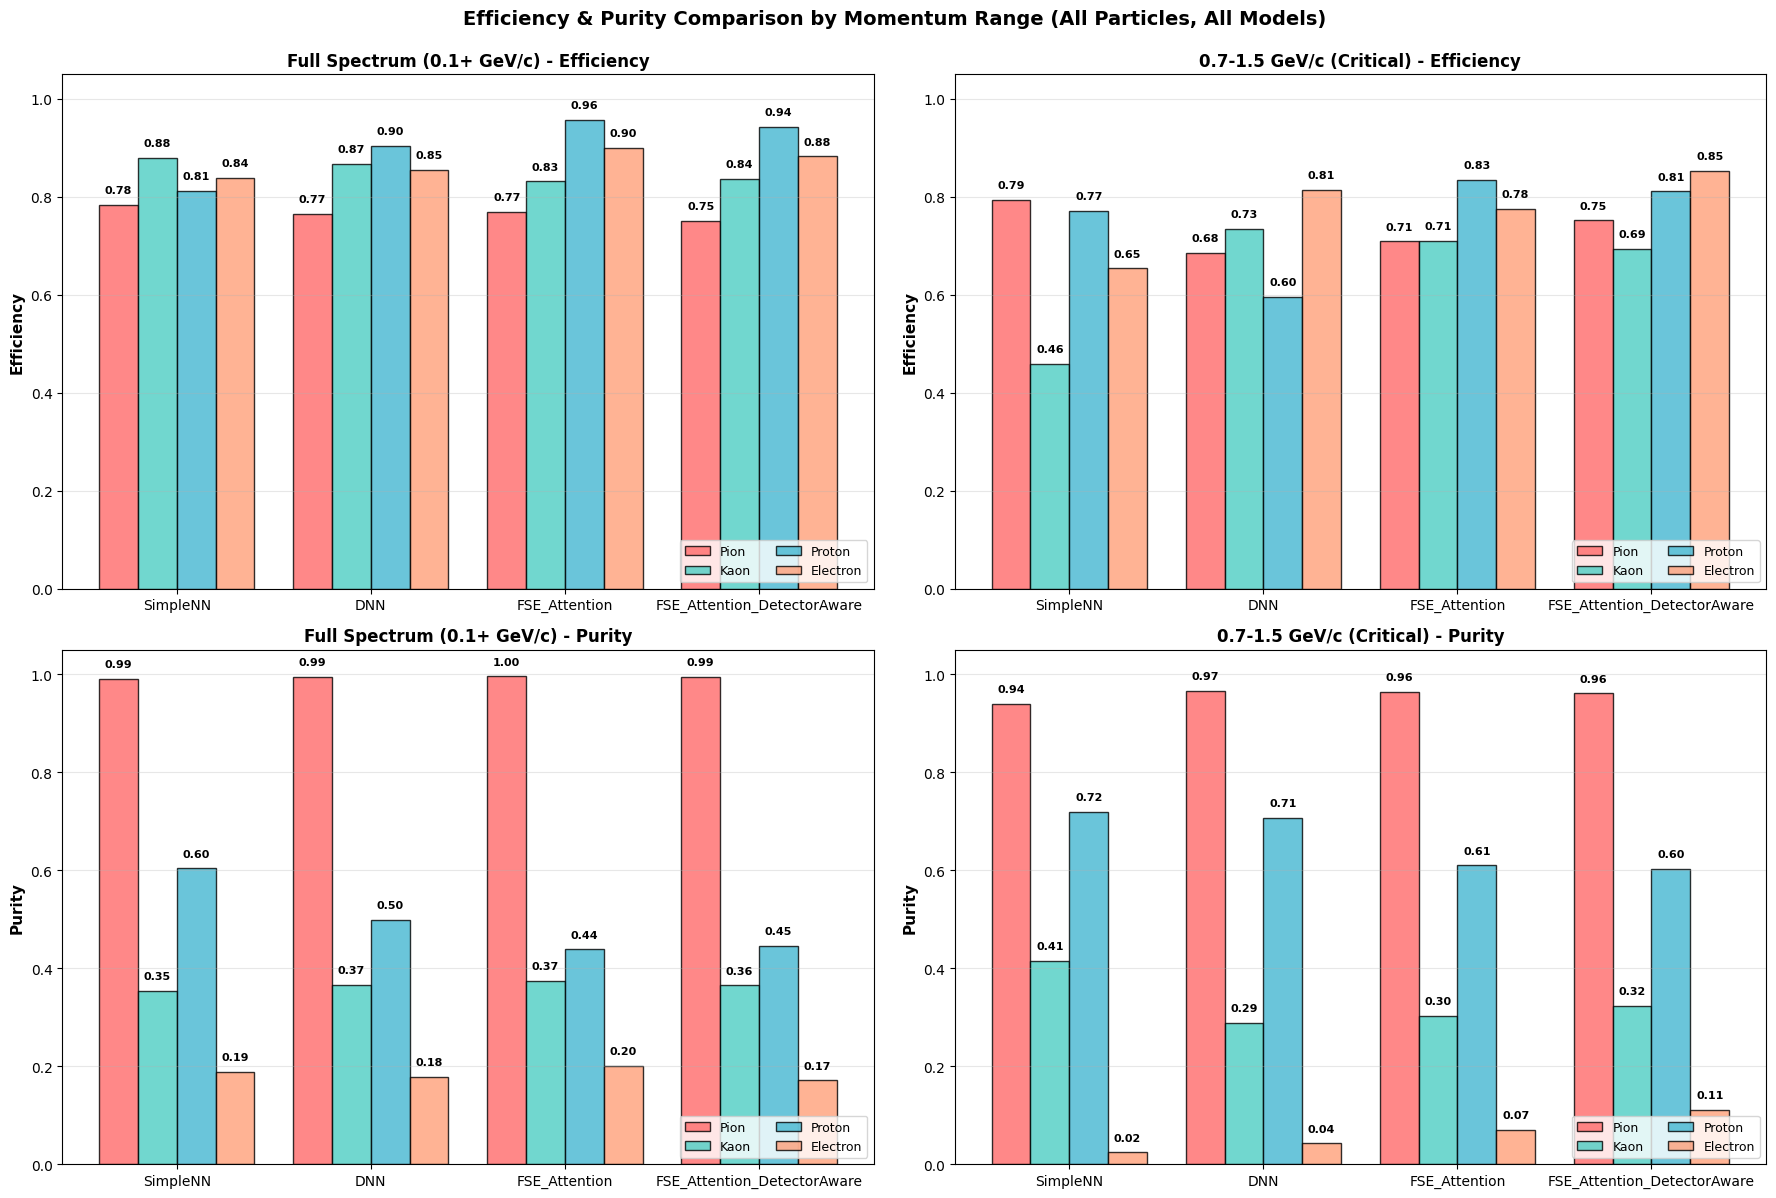

✓ Combined efficiency & purity comparison generated

FEATURE IMPORTANCE ANALYSIS

Computing feature importance using variance-based method...
(Analyses feature contribution to model predictions)


────────────────────────────────────────────────────────────────────────────────
MOMENTUM RANGE: Full Spectrum (0.1+ GeV/c)
────────────────────────────────────────────────────────────────────────────────


JAX_SimpleNN:
──────────────────────────────────────────────────
        Feature  Importance (%)
  tpc_nsigma_ka        6.858471
  tpc_nsigma_pr        6.577077
             pt        6.196593
  tpc_nsigma_el        5.817562
  tpc_nsigma_pi        5.809451
  bayes_prob_el        5.588885
  bayes_prob_pi        5.363105
  tof_nsigma_el        4.633605
  tof_nsigma_pi        4.630817
bayes_available        4.630485

JAX_DNN:
──────────────────────────────────────────────────
      Feature  Importance (%)
tpc_nsigma_ka        7.375218
tpc_nsigma_pr        7.151354
           pt        6.78470

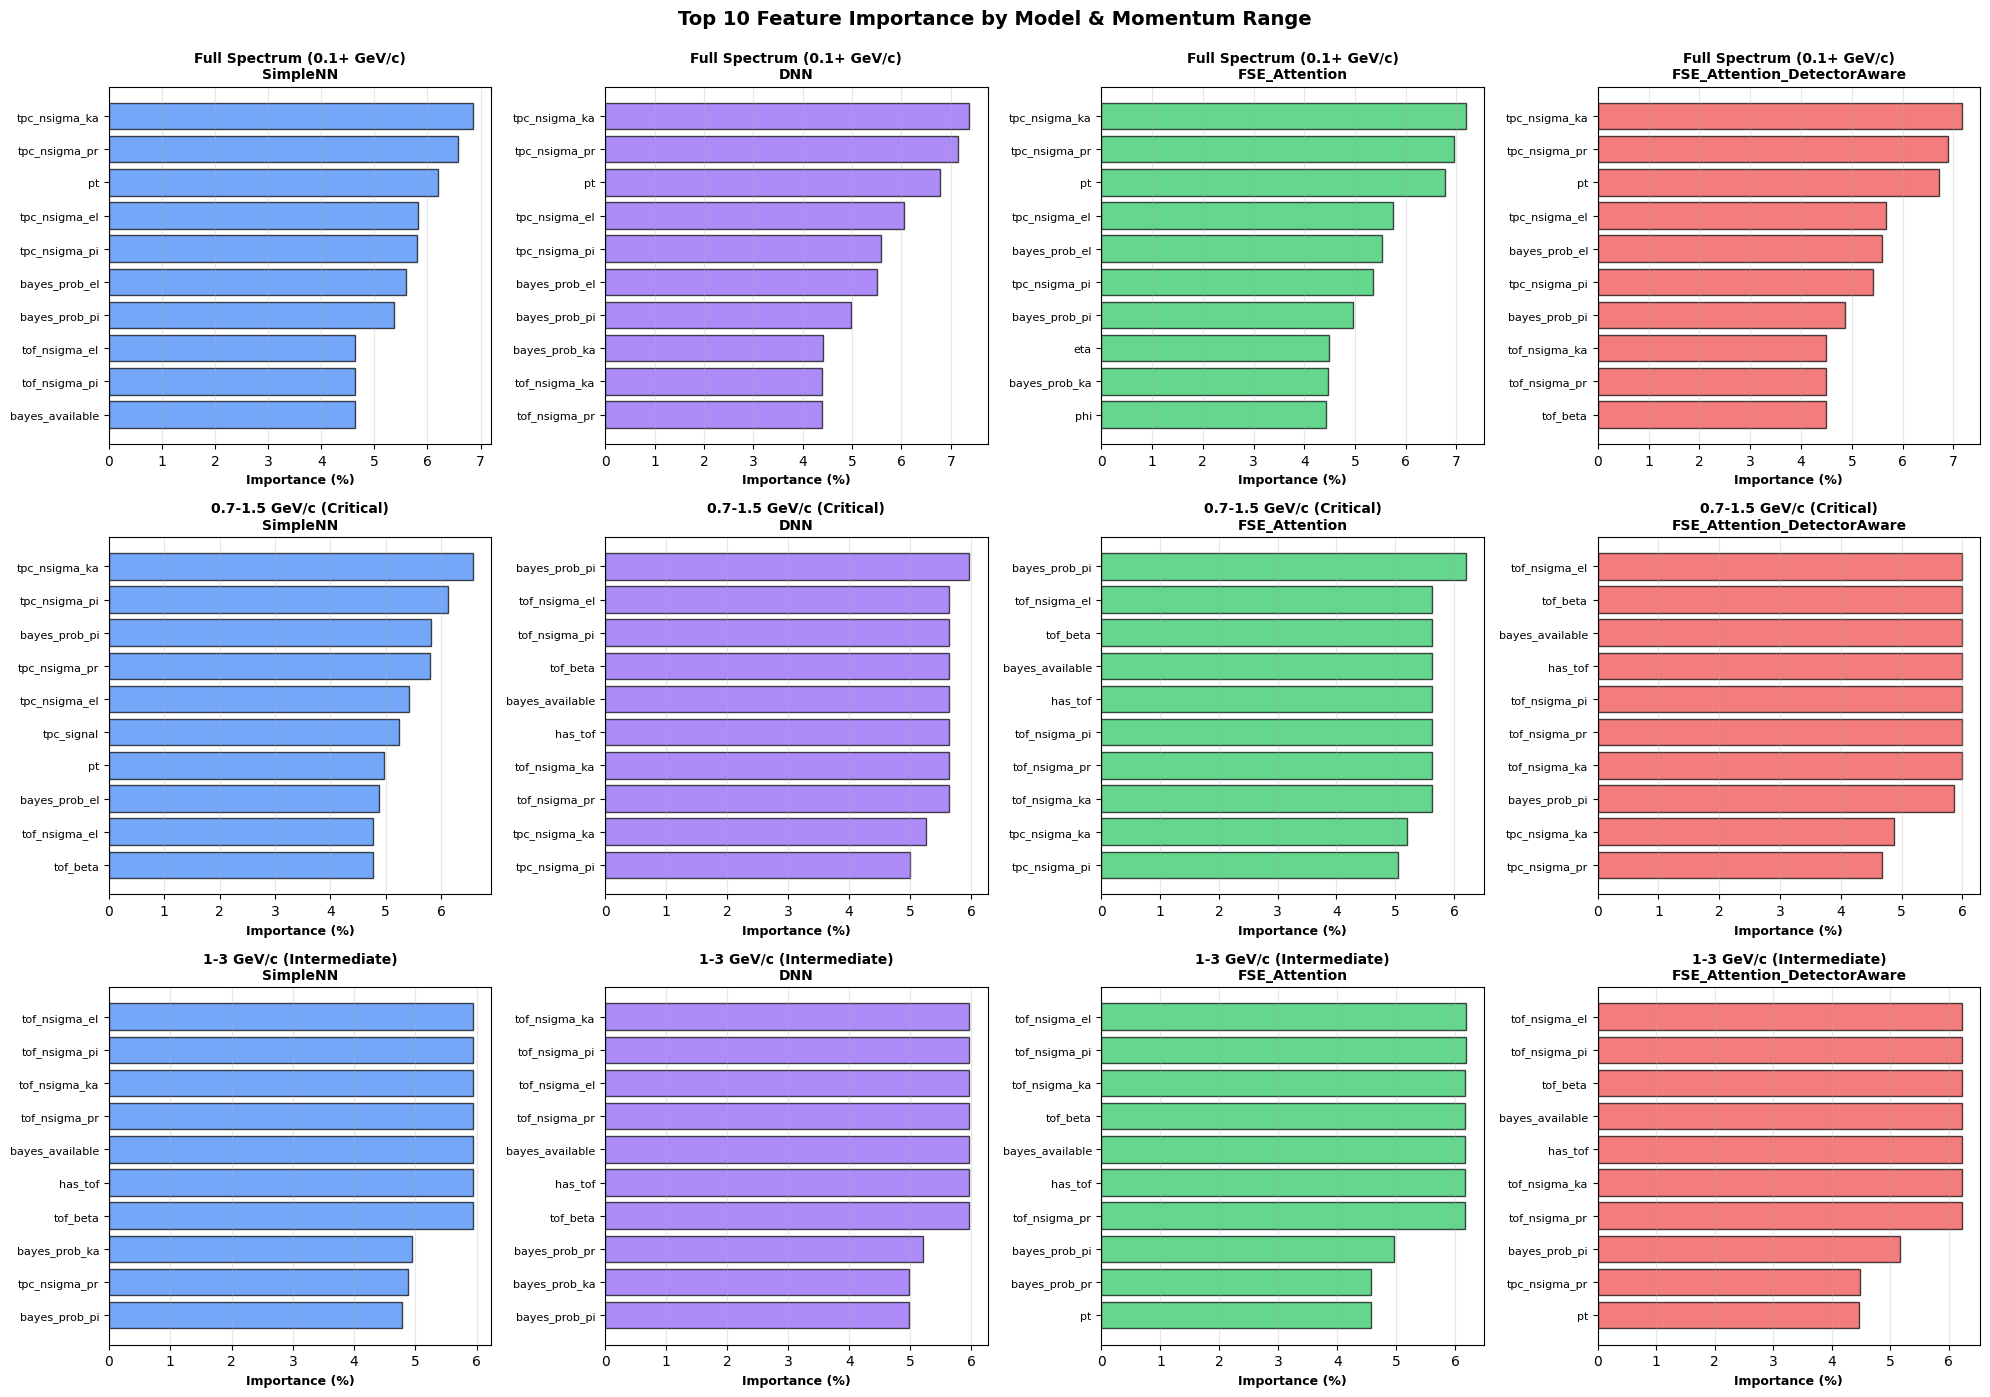


✓ SECTION 5C COMPLETE: Efficiency, Purity & Feature Importance



In [31]:
# ============================================================================
# SECTION 5C: EFFICIENCY, PURITY & FEATURE IMPORTANCE ANALYSIS
# ============================================================================

print(f"\n{'#'*80}")
print("SECTION 5C: EFFICIENCY, PURITY & FEATURE IMPORTANCE")
print(f"{'#'*80}\n")

# ============================================================================
# PART 1: EFFICIENCY & PURITY PER PARTICLE TYPE
# ============================================================================

print(f"\n{'='*80}")
print("EFFICIENCY & PURITY PER PARTICLE TYPE")
print(f"{'='*80}\n")

efficiency_purity_data = []

for mr_key, mr_data in all_results_by_model_and_range.items():
    momentum_range = MOMENTUM_RANGES.get(mr_key, {})
    
    # Access models through nested 'models' key
    if 'models' in mr_data:
        for model_type in MODEL_TYPES:
            if model_type in mr_data['models']:
                results = mr_data['models'][model_type]
                
                y_test = np.array(results['y_test'])
                y_pred = np.array(results['y_pred_test'])
                
                print(f"\n{'-'*80}")
                print(f"{momentum_range['name']} - {model_type}")
                print(f"{'-'*80}\n")
                
                print(f"{'Particle':<12} {'Efficiency':<15} {'Purity':<15} {'Support':<10}")
                print(f"{'-'*52}")
                
                for i, particle_name in enumerate(PARTICLE_NAMES):
                    # Efficiency = TP / (TP + FN) = Recall
                    true_positives = np.sum((y_test == i) & (y_pred == i))
                    false_negatives = np.sum((y_test == i) & (y_pred != i))
                    efficiency = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
                    
                    # Purity = TP / (TP + FP) = Precision
                    false_positives = np.sum((y_test != i) & (y_pred == i))
                    purity = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
                    
                    support = np.sum(y_test == i)
                    
                    efficiency_purity_data.append({
                        'Momentum Range': momentum_range['name'],
                        'Model Type': model_type,
                        'Particle': particle_name,
                        'Efficiency': efficiency,
                        'Purity': purity,
                        'Support': support
                    })
                    
                    print(f"{particle_name:<12} {efficiency:<15.4f} {purity:<15.4f} {support:<10}")


# ============================================================================
# PART 2: EFFICIENCY vs PURITY TRADE-OFF (All particles)
# ============================================================================

print(f"\n{'='*80}")
print("EFFICIENCY vs PURITY TRADE-OFF")
print(f"{'='*80}\n")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

model_colors_dict = {
    'JAX_SimpleNN': '#3B82F6',
    'JAX_DNN': '#8B5CF6',
    'JAX_FSE_Attention': '#22C55E',
    'JAX_FSE_Attention_DetectorAware': '#EF4444'
}

for ax_idx, model_type in enumerate(MODEL_TYPES):
    ax = axes[ax_idx]
    
    model_data = [d for d in efficiency_purity_data if d['Model Type'] == model_type]
    
    for particle in PARTICLE_NAMES:
        particle_data = [d for d in model_data if d['Particle'] == particle]
        
        effs = [d['Efficiency'] for d in particle_data]
        purs = [d['Purity'] for d in particle_data]
        
        ax.scatter(effs, purs, s=150, alpha=0.7, label=particle)
    
    ax.plot([0, 1], [0, 1], 'k--', alpha=0.3, linewidth=1)
    ax.set_xlabel('Efficiency (Recall)', fontsize=10, fontweight='bold')
    ax.set_ylabel('Purity (Precision)', fontsize=10, fontweight='bold')
    ax.set_title(model_type.replace('JAX_', ''), fontsize=11, fontweight='bold')
    ax.set_xlim([0, 1.05])
    ax.set_ylim([0, 1.05])
    ax.grid(alpha=0.3)
    ax.legend(loc='lower left', fontsize=9)

plt.suptitle('Efficiency vs Purity Trade-off (All Particles, All Ranges)', 
             fontsize=13, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# ============================================================================
# PART 2B: EFFICIENCY COMPARISON (All models per particle)
# ============================================================================

print(f"\n{'='*80}")
print("EFFICIENCY COMPARISON ACROSS ALL MODELS (Per Particle)")
print(f"{'='*80}\n")

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for particle_idx, particle_name in enumerate(PARTICLE_NAMES):
    ax = axes[particle_idx]
    
    # Collect efficiency data per model
    model_effs = {model_type: [] for model_type in MODEL_TYPES}
    
    for model_type in MODEL_TYPES:
        for mr_key in MOMENTUM_RANGES.keys():
            particle_data = [d for d in efficiency_purity_data 
                           if d['Model Type'] == model_type 
                           and d['Particle'] == particle_name
                           and d['Momentum Range'] == MOMENTUM_RANGES[mr_key]['name']]
            
            if particle_data:
                model_effs[model_type].append(particle_data[0]['Efficiency'])
    
    # Plot bars
    x_pos = np.arange(len(MODEL_TYPES))
    effs = [np.mean(model_effs[m]) if model_effs[m] else 0 for m in MODEL_TYPES]
    colors = [model_colors_dict.get(m, '#999999') for m in MODEL_TYPES]
    
    bars = ax.bar(x_pos, effs, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                   f'{height:.3f}', ha='center', va='bottom',
                   fontsize=9, fontweight='bold')
    
    ax.set_ylabel('Efficiency (Avg)', fontsize=10, fontweight='bold')
    ax.set_title(f'{particle_name}', fontsize=11, fontweight='bold')
    ax.set_xticks(x_pos)
    ax.set_xticklabels([m.replace('JAX_', '') for m in MODEL_TYPES], 
                       rotation=45, ha='right', fontsize=9)
    ax.set_ylim([0, 1.05])
    ax.grid(axis='y', alpha=0.3)

plt.suptitle('Average Efficiency by Model (All Momentum Ranges)', 
             fontsize=13, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("✓ Efficiency comparison plot generated")

# ============================================================================
# PART 2C: PURITY COMPARISON (All models per particle)
# ============================================================================

print(f"\n{'='*80}")
print("PURITY COMPARISON ACROSS ALL MODELS (Per Particle)")
print(f"{'='*80}\n")

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for particle_idx, particle_name in enumerate(PARTICLE_NAMES):
    ax = axes[particle_idx]
    
    # Collect purity data per model
    model_purs = {model_type: [] for model_type in MODEL_TYPES}
    
    for model_type in MODEL_TYPES:
        for mr_key in MOMENTUM_RANGES.keys():
            particle_data = [d for d in efficiency_purity_data 
                           if d['Model Type'] == model_type 
                           and d['Particle'] == particle_name
                           and d['Momentum Range'] == MOMENTUM_RANGES[mr_key]['name']]
            
            if particle_data:
                model_purs[model_type].append(particle_data[0]['Purity'])
    
    # Plot bars
    x_pos = np.arange(len(MODEL_TYPES))
    purs = [np.mean(model_purs[m]) if model_purs[m] else 0 for m in MODEL_TYPES]
    colors = [model_colors_dict.get(m, '#999999') for m in MODEL_TYPES]
    
    bars = ax.bar(x_pos, purs, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                   f'{height:.3f}', ha='center', va='bottom',
                   fontsize=9, fontweight='bold')
    
    ax.set_ylabel('Purity (Avg)', fontsize=10, fontweight='bold')
    ax.set_title(f'{particle_name}', fontsize=11, fontweight='bold')
    ax.set_xticks(x_pos)
    ax.set_xticklabels([m.replace('JAX_', '') for m in MODEL_TYPES], 
                       rotation=45, ha='right', fontsize=9)
    ax.set_ylim([0, 1.05])
    ax.grid(axis='y', alpha=0.3)

plt.suptitle('Average Purity by Model (All Momentum Ranges)', 
             fontsize=13, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("✓ Purity comparison plot generated")

# ============================================================================
# PART 2D: COMBINED EFFICIENCY & PURITY COMPARISON (All Models)
# ============================================================================

print(f"\n{'='*80}")
print("COMBINED EFFICIENCY & PURITY COMPARISON (All Models)")
print(f"{'='*80}\n")

# Prepare momentum ranges for plotting (show only 2 ranges instead of all)
plot_ranges = list(MOMENTUM_RANGES.items())[:2]  # Get first 2 ranges
if len(MOMENTUM_RANGES) > 2:
    # If we have 3 ranges, use the first and third (skipping middle)
    plot_ranges = [list(MOMENTUM_RANGES.items())[0], list(MOMENTUM_RANGES.items())[1]]

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

for plot_idx, (mr_key, momentum_range) in enumerate(plot_ranges):
    ax_eff = axes[0, plot_idx]
    ax_pur = axes[1, plot_idx]
    
    # Prepare data
    x_pos = np.arange(len(MODEL_TYPES))
    width = 0.2
    
    effs_by_particle = {p: [] for p in PARTICLE_NAMES}
    purs_by_particle = {p: [] for p in PARTICLE_NAMES}
    
    for model_type in MODEL_TYPES:
        for particle_idx, particle_name in enumerate(PARTICLE_NAMES):
            particle_data = [d for d in efficiency_purity_data 
                           if d['Model Type'] == model_type 
                           and d['Particle'] == particle_name
                           and d['Momentum Range'] == momentum_range['name']]
            
            if particle_data:
                effs_by_particle[particle_name].append(particle_data[0]['Efficiency'])
                purs_by_particle[particle_name].append(particle_data[0]['Purity'])
            else:
                effs_by_particle[particle_name].append(0)
                purs_by_particle[particle_name].append(0)
    
    # Plot efficiency
    particle_colors = {
        'pion': '#FF6B6B',
        'kaon': '#4ECDC4',
        'proton': '#45B7D1',
        'electron': '#FFA07A'
    }
    
    for particle_idx, particle_name in enumerate(PARTICLE_NAMES):
        offset = (particle_idx - 1.5) * width
        bars = ax_eff.bar(x_pos + offset, effs_by_particle[particle_name], width,
                         label=particle_name, 
                         color=particle_colors.get(particle_name.lower(), '#999999'),
                         alpha=0.8, edgecolor='black', linewidth=1)
        
        # Add value labels
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax_eff.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                           f'{height:.2f}', ha='center', va='bottom',
                           fontsize=8, fontweight='bold')
    
    ax_eff.set_ylabel('Efficiency', fontsize=11, fontweight='bold')
    ax_eff.set_title(f'{momentum_range["name"]} - Efficiency', fontsize=12, fontweight='bold')
    ax_eff.set_xticks(x_pos)
    ax_eff.set_xticklabels([m.replace('JAX_', '') for m in MODEL_TYPES], fontsize=10)
    ax_eff.set_ylim([0, 1.05])
    ax_eff.legend(fontsize=9, loc='lower right', ncol=2)
    ax_eff.grid(axis='y', alpha=0.3)
    
    # Plot purity
    for particle_idx, particle_name in enumerate(PARTICLE_NAMES):
        offset = (particle_idx - 1.5) * width
        bars = ax_pur.bar(x_pos + offset, purs_by_particle[particle_name], width,
                         label=particle_name, 
                         color=particle_colors.get(particle_name.lower(), '#999999'),
                         alpha=0.8, edgecolor='black', linewidth=1)
        
        # Add value labels
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax_pur.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                           f'{height:.2f}', ha='center', va='bottom',
                           fontsize=8, fontweight='bold')
    
    ax_pur.set_ylabel('Purity', fontsize=11, fontweight='bold')
    ax_pur.set_title(f'{momentum_range["name"]} - Purity', fontsize=12, fontweight='bold')
    ax_pur.set_xticks(x_pos)
    ax_pur.set_xticklabels([m.replace('JAX_', '') for m in MODEL_TYPES], fontsize=10)
    ax_pur.set_ylim([0, 1.05])
    ax_pur.legend(fontsize=9, loc='lower right', ncol=2)
    ax_pur.grid(axis='y', alpha=0.3)

plt.suptitle('Efficiency & Purity Comparison by Momentum Range (All Particles, All Models)', 
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("✓ Combined efficiency & purity comparison generated")

# ============================================================================
# PART 3: FEATURE IMPORTANCE ANALYSIS
# ============================================================================

print(f"\n{'='*80}")
print("FEATURE IMPORTANCE ANALYSIS")
print(f"{'='*80}\n")

print("Computing feature importance using variance-based method...")
print("(Analyses feature contribution to model predictions)\n")

feature_importance_results = []

for mr_key, momentum_range in MOMENTUM_RANGES.items():
    mr_data = all_results_by_model_and_range[mr_key]
    
    print(f"\n{'─'*80}")
    print(f"MOMENTUM RANGE: {momentum_range['name']}")
    print(f"{'─'*80}\n")
    
    # Get preprocessing data
    preprocessing = mr_data['preprocessing']
    X_test = preprocessing['X_test_scaled']
    y_test = preprocessing['y_test']
    features = preprocessing['features']
    
    for model_type in MODEL_TYPES:
        if 'models' in mr_data and model_type in mr_data['models']:
            results = mr_data['models'][model_type]
            
            # Use feature variance weighted by prediction confidence as importance proxy
            y_pred_probs = np.array(results['test_probs'])
            
            # Calculate importance: variance * prediction confidence
            importances = []
            num_features = X_test.shape[1]  # Use shape[1], not shape
            
            for feat_idx in range(num_features):  # Iterate over num_features
                # Feature variance
                feat_var = np.var(X_test[:, feat_idx])
                
                # Weight by how much predictions change with this feature
                max_probs = np.max(y_pred_probs, axis=1)
                correlation = np.abs(np.corrcoef(X_test[:, feat_idx], max_probs)[0, 1])
                
                # Handle NaN correlations (if all values are the same)
                if np.isnan(correlation):
                    correlation = 0.0
                
                # Combined importance
                importance = feat_var * (1 + correlation)
                importances.append(importance)
            
            # Normalise importances to percentages
            importances = np.array(importances)
            if np.sum(importances) > 0:
                importances = importances / np.sum(importances) * 100
            
            # Create dataframe
            importance_df = pd.DataFrame({
                'Feature': features,
                'Importance (%)': importances
            }).sort_values('Importance (%)', ascending=False)
            
            print(f"\n{model_type}:")
            print(f"{'─'*50}")
            print(importance_df.head(10).to_string(index=False))
            
            # Store for visualisation
            for idx, row in importance_df.iterrows():
                feature_importance_results.append({
                    'Momentum Range': momentum_range['name'],
                    'Model Type': model_type,
                    'Feature': row['Feature'],
                    'Importance (%)': row['Importance (%)']
                })


# ============================================================================
# PART 4: FEATURE IMPORTANCE VISUALISATION
# ============================================================================

print(f"\n{'='*80}")
print("TOP 10 FEATURES VISUALISATION")
print(f"{'='*80}\n")

fig, axes = plt.subplots(3, 4, figsize=(20, 14))

for mr_idx, mr_key in enumerate(MOMENTUM_RANGES.keys()):
    momentum_range = MOMENTUM_RANGES[mr_key]
    
    for model_idx, model_type in enumerate(MODEL_TYPES):
        ax = axes[mr_idx, model_idx]
        
        # Filter data for this combination
        data = [d for d in feature_importance_results 
                if d['Momentum Range'] == momentum_range['name'] 
                and d['Model Type'] == model_type]
        
        if data:
            df_plot = pd.DataFrame(data).sort_values('Importance (%)', 
                                                     ascending=False).head(10)
            
            # Create horizontal bar chart
            color = model_colors_dict.get(model_type, '#3B82F6')
            ax.barh(range(len(df_plot)), df_plot['Importance (%)'], 
                   color=color, alpha=0.7, edgecolor='black', linewidth=1)
            ax.set_yticks(range(len(df_plot)))
            ax.set_yticklabels(df_plot['Feature'], fontsize=8)
            ax.set_xlabel('Importance (%)', fontsize=9, fontweight='bold')
            ax.set_title(f'{momentum_range["name"]}\n{model_type.replace("JAX_", "")}', 
                        fontsize=10, fontweight='bold')
            ax.grid(axis='x', alpha=0.3)
            ax.invert_yaxis()

plt.suptitle('Top 10 Feature Importance by Model & Momentum Range', 
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print(f"\n{'='*80}")
print("✓ SECTION 5C COMPLETE: Efficiency, Purity & Feature Importance")
print(f"{'='*80}\n")


### Section 5D: FSE Detector-Aware Analysis


################################################################################
SECTION 5D: PHASE 1 DETECTOR-AWARE FSE ANALYSIS
################################################################################


COMPARING: Standard FSE vs Detector-Aware FSE


────────────────────────────────────────────────────────────────────────────────
Full Spectrum (0.1+ GeV/c)
────────────────────────────────────────────────────────────────────────────────

  OVERALL PERFORMANCE:
    Standard FSE:       0.7831
    Detector-Aware FSE: 0.7674
    Improvement:        -0.0157 (-2.01%)

  PERFORMANCE BY DETECTOR MODE:
  Mode               Tracks   Std FSE   Aware FSE         Δ
  ------------------------------------------------------------
  TPC_ONLY           95,033    0.7353      0.7216   -0.0137
  TPC_TOF            36,562    0.9074      0.8865   -0.0210

────────────────────────────────────────────────────────────────────────────────
0.7-1.5 GeV/c (Critical)
────────────────────────────────────────

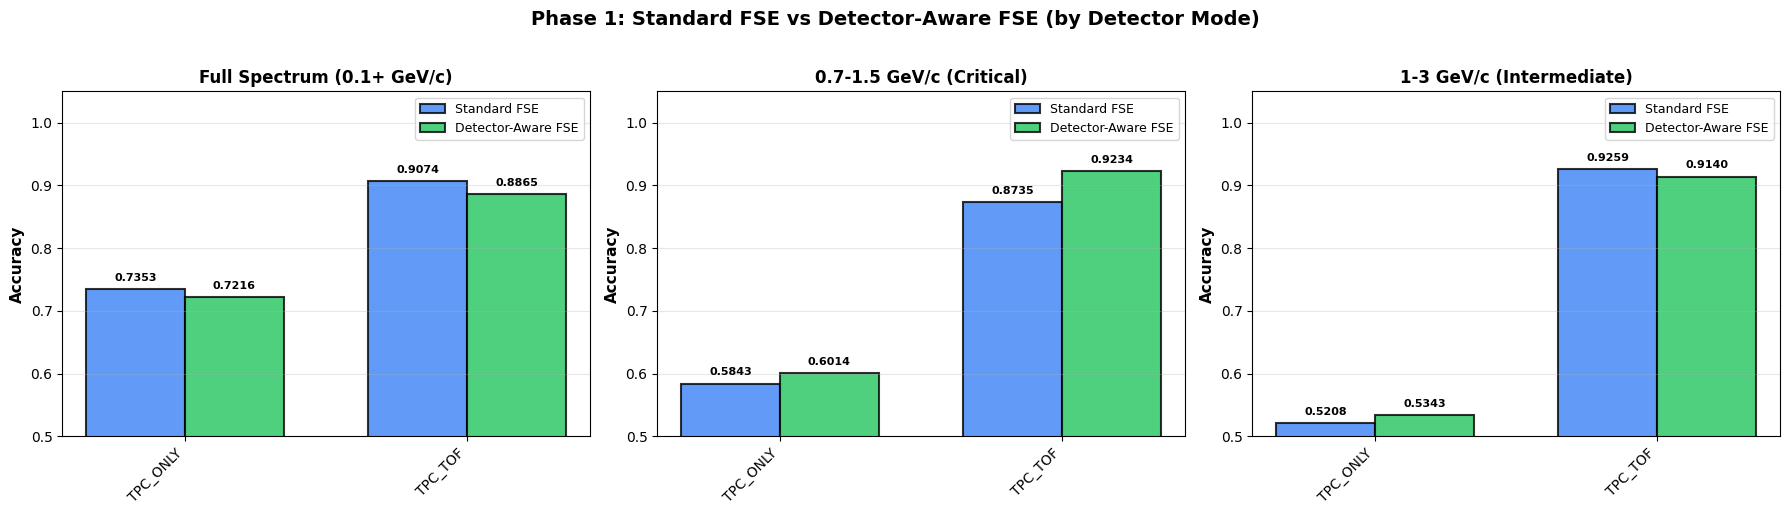

✓ Comparison bar plots generated

SUMMARY TABLE: PHASE 1 DETECTOR-AWARE FSE COMPARISON

            Momentum Range Detector Mode  Tracks  Std FSE  Aware FSE     Delta
Full Spectrum (0.1+ GeV/c)      TPC_ONLY   95033 0.735271   0.721581 -0.013690
Full Spectrum (0.1+ GeV/c)       TPC_TOF   36562 0.907418   0.886467 -0.020951
  0.7-1.5 GeV/c (Critical)      TPC_ONLY   19846 0.584349   0.601431  0.017082
  0.7-1.5 GeV/c (Critical)       TPC_TOF   16930 0.873479   0.923390  0.049911
  1-3 GeV/c (Intermediate)      TPC_ONLY   13857 0.520820   0.534315  0.013495
  1-3 GeV/c (Intermediate)       TPC_TOF   12713 0.925903   0.914025 -0.011878

────────────────────────────────────────────────────────────────────────────────
IMPROVEMENT SUMMARY BY MOMENTUM RANGE:
────────────────────────────────────────────────────────────────────────────────

Full Spectrum (0.1+ GeV/c)    :
  Weighted Standard FSE:    0.7831
  Weighted Aware FSE:       0.7674
  Overall Improvement:      -0.0157 (-2.01%)
  Best im

In [17]:
# ============================================================================
# SECTION 5D: PHASE 1 DETECTOR-AWARE FSE ANALYSIS
# ============================================================================

print(f"\n{'#'*80}")
print("SECTION 5D: PHASE 1 DETECTOR-AWARE FSE ANALYSIS")
print(f"{'#'*80}\n")

# ============================================================================
# PART 1: COMPARE STANDARD FSE vs DETECTOR-AWARE FSE
# ============================================================================

print(f"\n{'='*80}")
print("COMPARING: Standard FSE vs Detector-Aware FSE")
print(f"{'='*80}\n")

mode_names = {0: 'NONE', 1: 'TPC_ONLY', 2: 'TOF_ONLY', 3: 'TPC_TOF'}
comparison_results = []

for mr_key, momentum_range in MOMENTUM_RANGES.items():
    
    print(f"\n{'─'*80}")
    print(f"{momentum_range['name']}")
    print(f"{'─'*80}\n")
    
    # Check if both models exist
    if mr_key not in all_results_by_model_and_range:
        print("  (No models trained for this range)")
        continue
    
    mr_data = all_results_by_model_and_range[mr_key]
    
    if 'models' not in mr_data:
        print("  (No models in this range)")
        continue
    
    if 'JAX_FSE_Attention' not in mr_data['models']:
        print("  Standard FSE+Attention not trained")
        continue
    
    if 'JAX_FSE_Attention_DetectorAware' not in mr_data['models']:
        print("  Detector-Aware FSE not trained")
        continue
    
    # Get test data
    preprocessing_data = mr_data['preprocessing']
    y_test = np.array(preprocessing_data['y_test'])
    detector_modes_test = np.array(preprocessing_data['detector_modes_test'])
    
    # Get model predictions
    standard_results = mr_data['models']['JAX_FSE_Attention']
    aware_results = mr_data['models']['JAX_FSE_Attention_DetectorAware']
    
    y_pred_std = np.array(standard_results['y_pred_test'])
    y_pred_aware = np.array(aware_results['y_pred_test'])
    
    # Overall comparison
    acc_std = accuracy_score(y_test, y_pred_std)
    acc_aware = accuracy_score(y_test, y_pred_aware)
    improvement = acc_aware - acc_std
    improvement_pct = (improvement / acc_std * 100) if acc_std > 0 else 0
    
    print(f"  OVERALL PERFORMANCE:")
    print(f"    Standard FSE:       {acc_std:.4f}")
    print(f"    Detector-Aware FSE: {acc_aware:.4f}")
    print(f"    Improvement:        {improvement:+.4f} ({improvement_pct:+.2f}%)")
    
    # Per-detector-mode breakdown
    print(f"\n  PERFORMANCE BY DETECTOR MODE:")
    print(f"  {'Mode':15s}  {'Tracks':>8s}  {'Std FSE':>8s}  {'Aware FSE':>10s}  {'Δ':>8s}")
    print(f"  {'-'*60}")
    
    for mode in [0, 1, 2, 3]:
        mask = detector_modes_test == mode
        if mask.sum() == 0:
            continue
        
        n_tracks = mask.sum()
        y_mode = y_test[mask]
        y_pred_std_mode = y_pred_std[mask]
        y_pred_aware_mode = y_pred_aware[mask]
        
        acc_std_mode = accuracy_score(y_mode, y_pred_std_mode)
        acc_aware_mode = accuracy_score(y_mode, y_pred_aware_mode)
        delta = acc_aware_mode - acc_std_mode
        
        print(f"  {mode_names[mode]:15s}  {n_tracks:8,}  {acc_std_mode:8.4f}  {acc_aware_mode:10.4f}  {delta:+8.4f}")
        
        comparison_results.append({
            'Momentum Range': momentum_range['name'],
            'Detector Mode': mode_names[mode],
            'Tracks': n_tracks,
            'Std FSE': acc_std_mode,
            'Aware FSE': acc_aware_mode,
            'Delta': delta
        })

# ============================================================================
# PART 2: VISUALISATION - DETECTOR MODE COMPARISON (BAR PLOTS)
# ============================================================================

print(f"\n{'='*80}")
print("GENERATING COMPARISON VISUALISATIONS")
print(f"{'='*80}\n")

if comparison_results:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    for mr_idx, (mr_key, momentum_range) in enumerate(MOMENTUM_RANGES.items()):
        ax = axes[mr_idx]
        
        # Filter data for this momentum range
        data_for_range = [d for d in comparison_results 
                         if d['Momentum Range'] == momentum_range['name']]
        
        if not data_for_range:
            ax.text(0.5, 0.5, 'No data', ha='center', va='center', transform=ax.transAxes)
            ax.set_title(momentum_range['name'])
            continue
        
        modes = [d['Detector Mode'] for d in data_for_range]
        std_accs = [d['Std FSE'] for d in data_for_range]
        aware_accs = [d['Aware FSE'] for d in data_for_range]
        
        x = np.arange(len(modes))
        width = 0.35
        
        bars1 = ax.bar(x - width/2, std_accs, width, 
                      label='Standard FSE', color='#3B82F6',
                      alpha=0.8, edgecolor='black', linewidth=1.5)
        bars2 = ax.bar(x + width/2, aware_accs, width,
                      label='Detector-Aware FSE', color='#22C55E',
                      alpha=0.8, edgecolor='black', linewidth=1.5)
        
        # Add value labels on bars
        for bars in [bars1, bars2]:
            for bar in bars:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                       f'{height:.4f}', ha='center', va='bottom',
                       fontsize=8, fontweight='bold')
        
        ax.set_ylabel('Accuracy', fontsize=11, fontweight='bold')
        ax.set_title(f'{momentum_range["name"]}', fontsize=12, fontweight='bold')
        ax.set_xticks(x)
        ax.set_xticklabels(modes, fontsize=10, rotation=45, ha='right')
        ax.set_ylim([0.5, 1.05])
        ax.legend(fontsize=9)
        ax.grid(axis='y', alpha=0.3)
    
    plt.suptitle('Phase 1: Standard FSE vs Detector-Aware FSE (by Detector Mode)', 
                 fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
    
    print("✓ Comparison bar plots generated")

# ============================================================================
# PART 3: SUMMARY TABLE
# ============================================================================

print(f"\n{'='*80}")
print("SUMMARY TABLE: PHASE 1 DETECTOR-AWARE FSE COMPARISON")
print(f"{'='*80}\n")

if comparison_results:
    comparison_df = pd.DataFrame(comparison_results)
    
    # Format for display
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    
    print(comparison_df.to_string(index=False))
    
    # Summary by momentum range
    print(f"\n{'─'*80}")
    print("IMPROVEMENT SUMMARY BY MOMENTUM RANGE:")
    print(f"{'─'*80}\n")
    
    for mr_key, momentum_range in MOMENTUM_RANGES.items():
        
        # Find all results for this range
        range_data = [d for d in comparison_results if d['Momentum Range'] == momentum_range['name']]
        
        if not range_data:
            continue
        
        # Calculate overall improvement
        total_tracks = sum(d['Tracks'] for d in range_data)
        weighted_std = sum(d['Std FSE'] * d['Tracks'] for d in range_data) / total_tracks
        weighted_aware = sum(d['Aware FSE'] * d['Tracks'] for d in range_data) / total_tracks
        overall_improvement = weighted_aware - weighted_std
        overall_improvement_pct = (overall_improvement / weighted_std * 100)
        
        print(f"{momentum_range['name']:30s}:")
        print(f"  Weighted Standard FSE:    {weighted_std:.4f}")
        print(f"  Weighted Aware FSE:       {weighted_aware:.4f}")
        print(f"  Overall Improvement:      {overall_improvement:+.4f} ({overall_improvement_pct:+.2f}%)")
        
        # Find best improvement
        best_mode = max(range_data, key=lambda x: x['Delta'])
        print(f"  Best improvement:         {best_mode['Detector Mode']:15s}: {best_mode['Delta']:+.4f}")
        print()

# ============================================================================
# PART 4: DETECTOR MODE IMPACT ANALYSIS
# ============================================================================

print(f"\n{'='*80}")
print("DETECTOR MODE IMPACT ANALYSIS")
print(f"{'='*80}\n")

if comparison_results:
    # Group by detector mode
    mode_improvements = {}
    
    for result in comparison_results:
        mode = result['Detector Mode']
        if mode not in mode_improvements:
            mode_improvements[mode] = []
        mode_improvements[mode].append(result['Delta'])
    
    print("Average improvement by detector mode:\n")
    for mode in ['TPC_ONLY', 'TPC_TOF', 'TOF_ONLY']:
        if mode in mode_improvements:
            improvements = mode_improvements[mode]
            avg_improvement = np.mean(improvements)
            std_improvement = np.std(improvements)
            print(f"  {mode:15s}: {avg_improvement:+.4f} ± {std_improvement:.4f}")

print(f"\n{'='*80}")
print("✓ SECTION 5D COMPLETE: Phase 1 Detector-Aware Analysis Finished")
print(f"{'='*80}\n")


## Section 6: Bayesian PID Availability & Comparison with ML Models


################################################################################
SECTION 6: BAYESIAN PID AVAILABILITY & ALL MODELS VS BAYESIAN COMPARISON
################################################################################

PART 1: BAYESIAN PID AVAILABILITY ANALYSIS

Dataset info:
  Total rows: 4,729,393

Bayesian PID availability per feature:
  bayes_prob_pi:
    Available: 371,800 (7.86%)
    Missing:   4,357,593 (92.14%)
  bayes_prob_ka:
    Available: 371,800 (7.86%)
    Missing:   4,357,593 (92.14%)
  bayes_prob_pr:
    Available: 371,800 (7.86%)
    Missing:   4,357,593 (92.14%)
  bayes_prob_el:
    Available: 371,800 (7.86%)
    Missing:   4,357,593 (92.14%)

────────────────────────────────────────────────────────────────────────────────
COMPLETE BAYESIAN PID (all 4 features non-zero):
  Complete rows: 371,800 (7.86%)
  Incomplete:    4,357,593 (92.14%)

BAYESIAN AVAILABILITY BY MOMENTUM RANGE

Full Spectrum (0.1+ GeV/c):
  Total tracks: 4,729,392
  Complete Bayesi

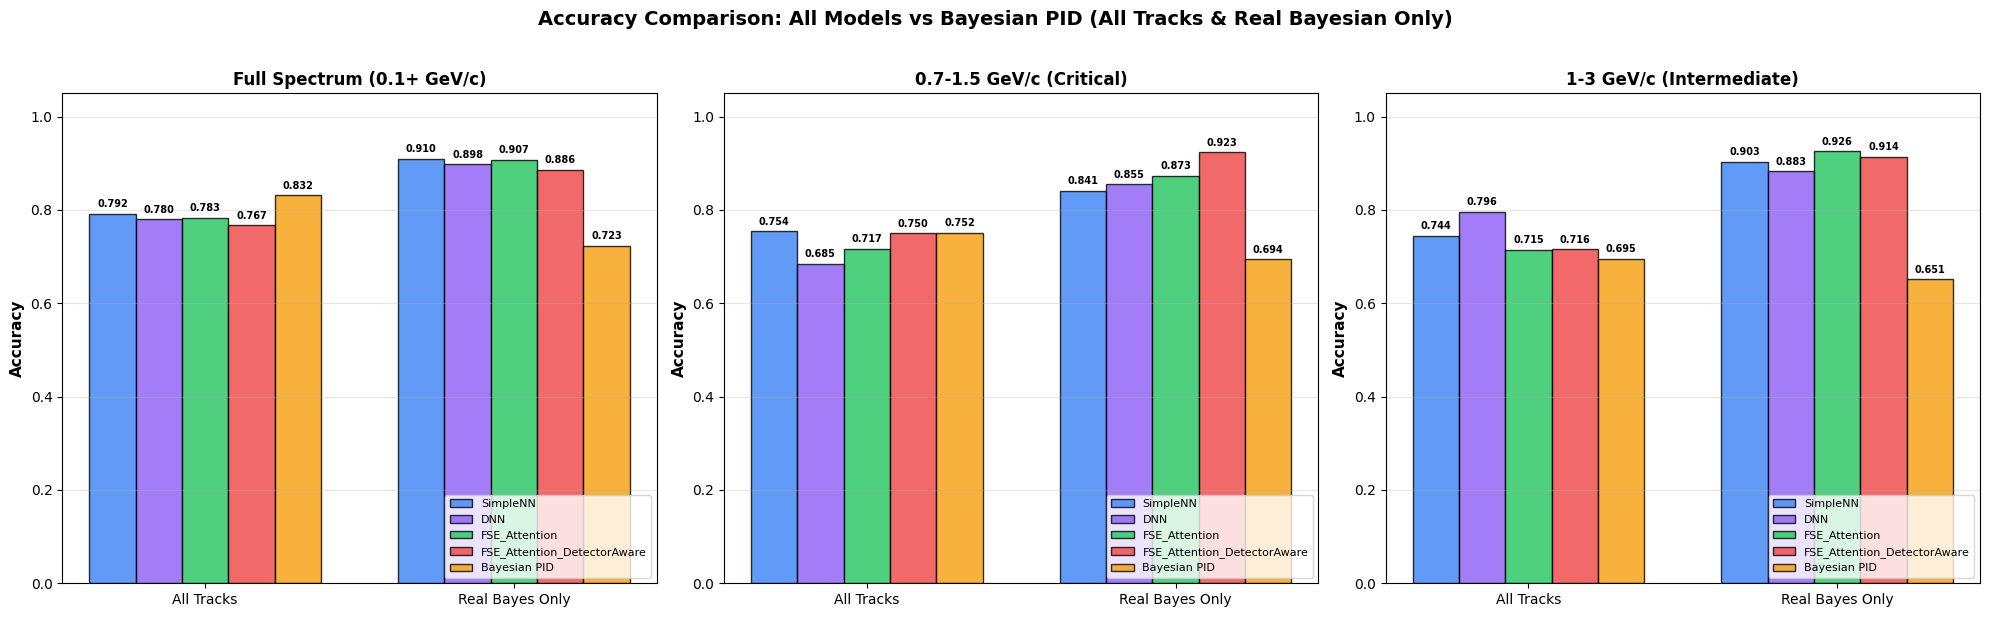

✓ All models vs Bayesian comparison plot generated


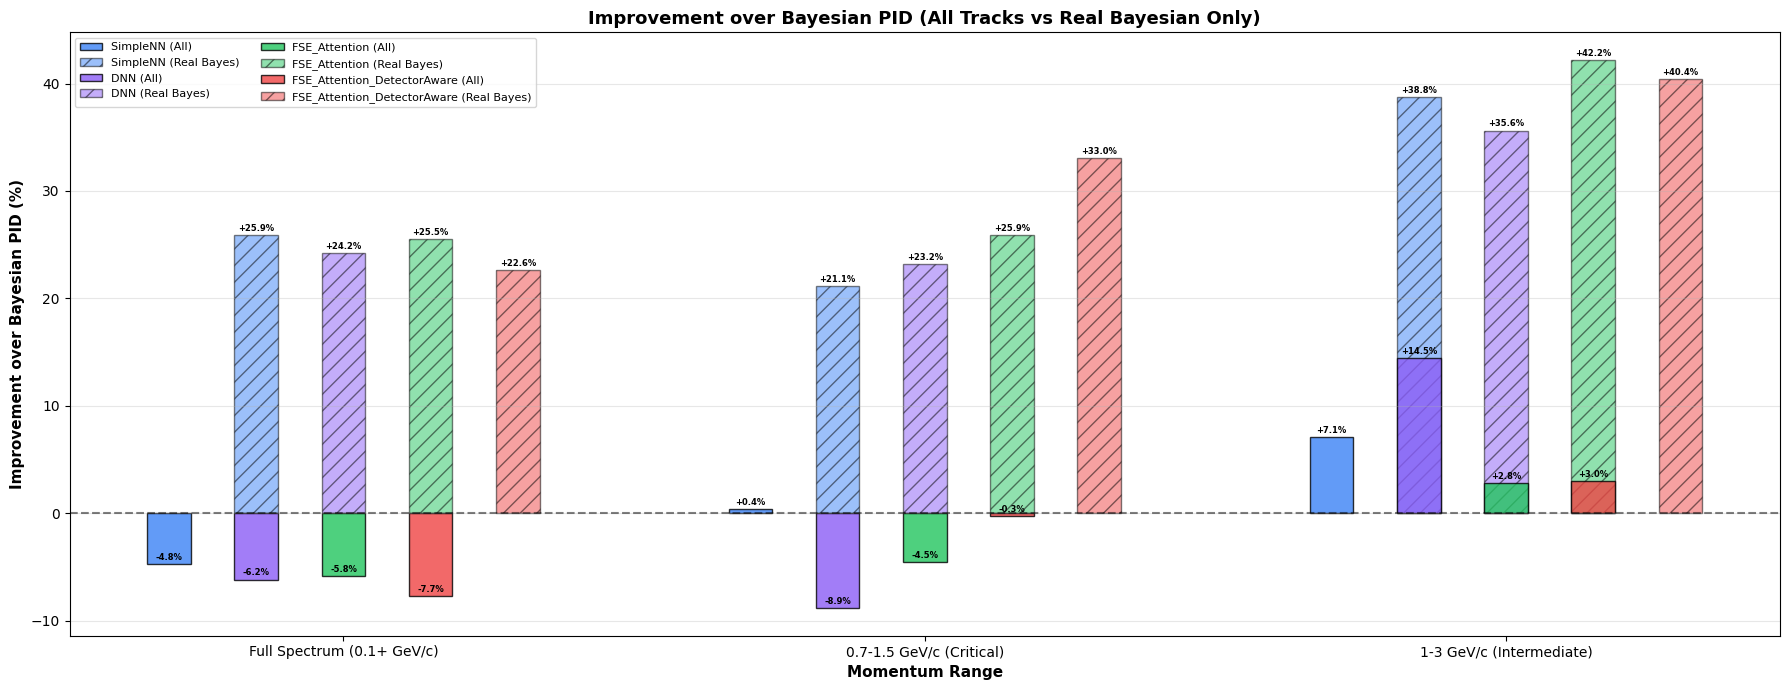

✓ Improvement percentage comparison generated (All vs Real Bayesian)


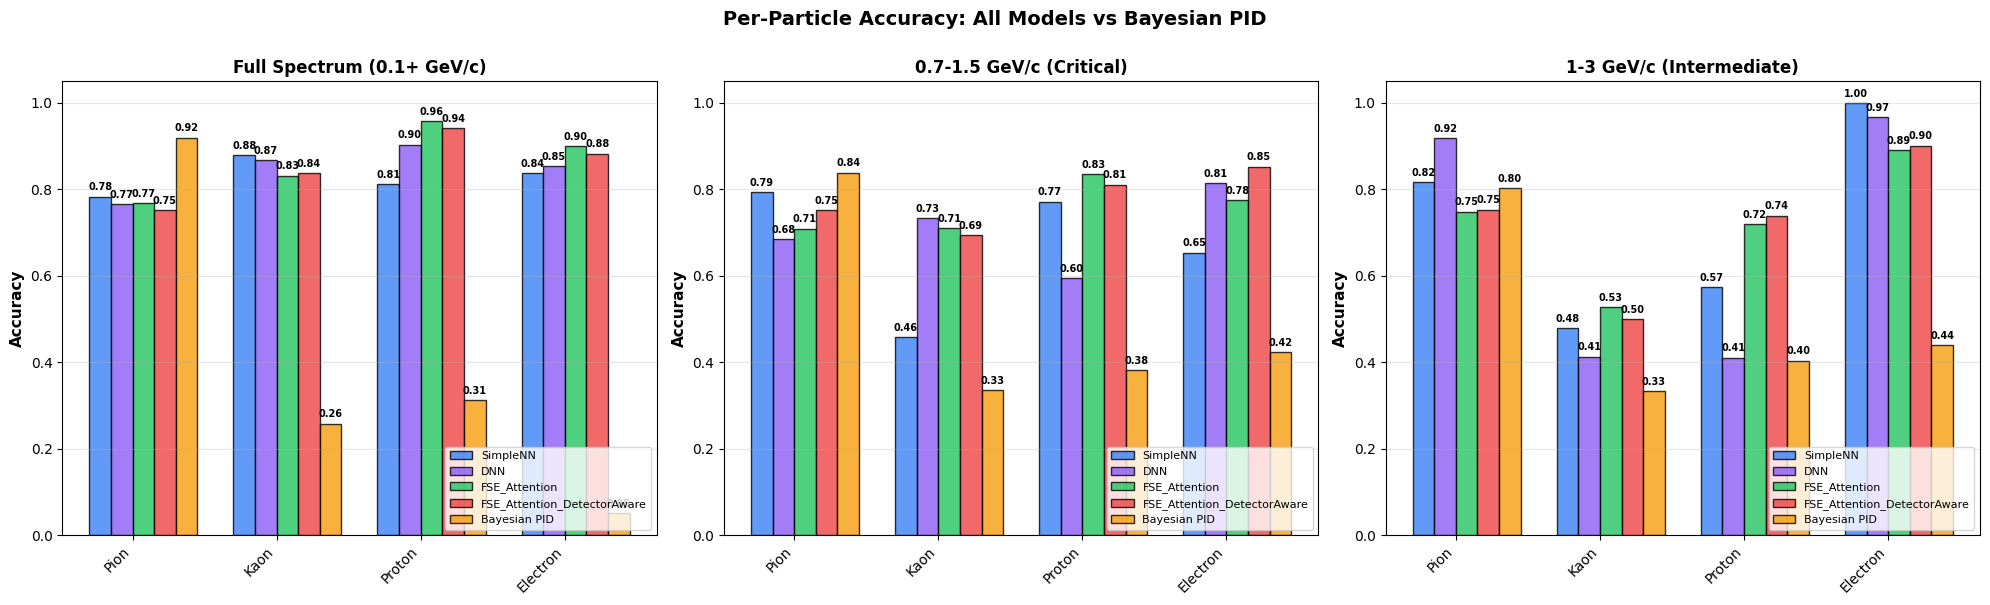

✓ Per-particle accuracy comparison generated

✓ SECTION 6 COMPLETE: All Models vs Bayesian Comparison Analysis



In [26]:
# ============================================================================
# SECTION 6: BAYESIAN PID AVAILABILITY & ALL MODELS VS BAYESIAN COMPARISON
# ============================================================================

print(f"\n{'#'*80}")
print("SECTION 6: BAYESIAN PID AVAILABILITY & ALL MODELS VS BAYESIAN COMPARISON")
print(f"{'#'*80}")

# ============================================================================
# PART 1: BAYESIAN PID AVAILABILITY
# ============================================================================

print(f"\n{'='*80}")
print("PART 1: BAYESIAN PID AVAILABILITY ANALYSIS")
print(f"{'='*80}\n")

bayes_features = ['bayes_prob_pi', 'bayes_prob_ka', 'bayes_prob_pr', 'bayes_prob_el']
print(f"Dataset info:")
print(f"  Total rows: {len(df):,}\n")

print(f"Bayesian PID availability per feature:")
for feat in bayes_features:
    available = (df[feat] != 0).sum()
    missing = len(df) - available
    pct_available = (available / len(df)) * 100
    print(f"  {feat}:")
    print(f"    Available: {available:,} ({pct_available:.2f}%)")
    print(f"    Missing:   {missing:,} ({100-pct_available:.2f}%)")

print(f"\n{'─'*80}")
print(f"COMPLETE BAYESIAN PID (all 4 features non-zero):")
bayes_complete = ((df[bayes_features] != 0).all(axis=1))
complete_count = bayes_complete.sum()
complete_pct = (complete_count / len(df)) * 100
print(f"  Complete rows: {complete_count:,} ({complete_pct:.2f}%)")
print(f"  Incomplete:    {len(df) - complete_count:,} ({100-complete_pct:.2f}%)")

# ============================================================================
# PART 2: BAYESIAN AVAILABILITY BY MOMENTUM RANGE
# ============================================================================

print(f"\n{'='*80}")
print("BAYESIAN AVAILABILITY BY MOMENTUM RANGE")
print(f"{'='*80}\n")

for mr_key, momentum_range in MOMENTUM_RANGES.items():
    df_range = df[(df['p'] >= momentum_range['min']) & 
                  (df['p'] < momentum_range['max'])]
    bayes_complete_range = ((df_range[bayes_features] != 0).all(axis=1))
    complete_count_range = bayes_complete_range.sum()
    complete_pct_range = (complete_count_range / len(df_range)) * 100 if len(df_range) > 0 else 0
    
    print(f"{momentum_range['name']}:")
    print(f"  Total tracks: {len(df_range):,}")
    print(f"  Complete Bayesian: {complete_count_range:,} ({complete_pct_range:.2f}%)\n")

# ============================================================================
# PART 3: ALL MODELS VS BAYESIAN PID COMPARISON
# ============================================================================

print(f"\n{'='*80}")
print("PART 3: ALL MODELS VS BAYESIAN PID COMPARISON")
print(f"(SimpleNN | DNN | FSE+Attention Phase 0 | FSE+Attention Detector-Aware Phase 1)")
print(f"{'='*80}\n")

print(f"✓ All model architectures available!")
print(f"Running comprehensive comparison...\n")

for mr_key, momentum_range in MOMENTUM_RANGES.items():
    mr_data = all_results_by_model_and_range[mr_key]
    
    print(f"\n{'─'*80}")
    print(f"COMPARISON: {momentum_range['name']}")
    print(f"{'─'*80}\n")
    
    preprocessing = mr_data.get('preprocessing', {})
    
    if 'bayes_availability_test' not in preprocessing:
        print(f"Bayesian mask not found in preprocessing\n")
        continue
    
    # Get reference y_test and masks (use SimpleNN as reference)
    if 'models' in mr_data and 'JAX_SimpleNN' in mr_data['models']:
        reference_results = mr_data['models']['JAX_SimpleNN']
    else:
        print(f"SimpleNN not available for this range\n")
        continue
    
    y_test = np.array(reference_results['y_test'])
    bayes_mask = preprocessing['bayes_availability_test']
    bayes_pred_original = preprocessing['bayes_pred_original_test']
    
    # Get predictions from all models
    model_predictions = {}
    if 'models' in mr_data:
        for model_type in MODEL_TYPES:
            if model_type in mr_data['models']:
                model_predictions[model_type] = np.array(mr_data['models'][model_type]['y_pred_test'])
    
    # Track breakdown
    has_real_bayes = bayes_mask.astype(bool)
    is_filled = ~has_real_bayes
    
    n_real = np.sum(has_real_bayes)
    n_filled = np.sum(is_filled)
    pct_real = (n_real / len(bayes_mask)) * 100
    
    print(f"Track breakdown:")
    print(f"  Tracks with REAL Bayesian data:  {n_real:,} ({pct_real:.2f}%)")
    print(f"  Tracks with FILLED Bayesian:     {n_filled:,} ({100-pct_real:.2f}%)\n")
    
    # ====================================================================
    # RESULTS ON ALL TRACKS
    # ====================================================================
    
    acc_bayes_all = accuracy_score(y_test, bayes_pred_original)
    
    print(f"{'─'*56}")
    print(f"RESULTS ON ALL TRACKS:")
    print(f"{'─'*56}")
    print(f"  Bayesian PID Accuracy:            {acc_bayes_all:.4f}\n")
    
    for model_type in MODEL_TYPES:
        if model_type in model_predictions:
            y_pred = model_predictions[model_type]
            acc = accuracy_score(y_test, y_pred)
            improvement = acc - acc_bayes_all
            improvement_pct = (improvement / acc_bayes_all * 100) if acc_bayes_all > 0 else 0
            print(f"  {model_type:35s} {acc:.4f}  {improvement:+.4f} ({improvement_pct:+.2f}%)")
    
    print()
    
    # ====================================================================
    # RESULTS ON TRACKS WITH REAL BAYESIAN DATA
    # ====================================================================
    
    if n_real > 0:
        y_test_real = y_test[has_real_bayes]
        y_pred_bayes_real = bayes_pred_original[has_real_bayes]
        acc_bayes_real = accuracy_score(y_test_real, y_pred_bayes_real)
        
        print(f"{'─'*56}")
        print(f"RESULTS ON TRACKS WITH REAL BAYESIAN DATA:")
        print(f"{'─'*56}")
        print(f"  Bayesian PID Accuracy:            {acc_bayes_real:.4f}\n")
        
        for model_type in MODEL_TYPES:
            if model_type in model_predictions:
                y_pred = model_predictions[model_type]
                y_pred_real = y_pred[has_real_bayes]
                acc = accuracy_score(y_test_real, y_pred_real)
                improvement = acc - acc_bayes_real
                improvement_pct = (improvement / acc_bayes_real * 100) if acc_bayes_real > 0 else 0
                print(f"  {model_type:35s} {acc:.4f}  {improvement:+.4f} ({improvement_pct:+.2f}%)")
        
        print()
    
    # ====================================================================
    # RESULTS ON TRACKS WITH FILLED BAYESIAN DATA
    # ====================================================================
    
    if n_filled > 0:
        y_test_filled = y_test[is_filled]
        y_pred_bayes_filled = bayes_pred_original[is_filled]
        acc_bayes_filled = accuracy_score(y_test_filled, y_pred_bayes_filled)
        
        print(f"{'─'*56}")
        print(f"RESULTS ON TRACKS WITH FILLED BAYESIAN DATA:")
        print(f"{'─'*56}")
        print(f"  Bayesian PID Accuracy:            {acc_bayes_filled:.4f}\n")
        
        for model_type in MODEL_TYPES:
            if model_type in model_predictions:
                y_pred = model_predictions[model_type]
                y_pred_filled = y_pred[is_filled]
                acc = accuracy_score(y_test_filled, y_pred_filled)
                improvement = acc - acc_bayes_filled
                improvement_pct = (improvement / acc_bayes_filled * 100) if acc_bayes_filled > 0 else 0
                print(f"  {model_type:35s} {acc:.4f}  {improvement:+.4f} ({improvement_pct:+.2f}%)")
        
        print()

# ============================================================================
# VISUAL COMPARISON: ALL MODELS VS BAYESIAN PID
# ============================================================================

print(f"\n{'='*80}")
print("VISUAL COMPARISON: ALL MODELS VS BAYESIAN PID")
print(f"(SimpleNN | DNN | FSE+Attention Phase 0 | FSE+Attention Detector-Aware Phase 1)")
print(f"{'='*80}\n")

# ========================================================================
# PLOT 1: ACCURACY COMPARISON (Bar Chart - 3 ranges, all models)
# ========================================================================

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

comparison_data = []

for mr_idx, (mr_key, momentum_range) in enumerate(MOMENTUM_RANGES.items()):
    mr_data = all_results_by_model_and_range[mr_key]
    ax = axes[mr_idx]
    
    preprocessing = mr_data.get('preprocessing', {})
    
    if 'bayes_availability_test' in preprocessing and 'models' in mr_data:
        # Get reference y_test
        if 'JAX_SimpleNN' in mr_data['models']:
            y_test = np.array(mr_data['models']['JAX_SimpleNN']['y_test'])
        else:
            continue
        
        bayes_mask = preprocessing['bayes_availability_test']
        bayes_pred_original = preprocessing['bayes_pred_original_test']
        
        # All tracks
        acc_bayes_all = accuracy_score(y_test, bayes_pred_original)
        
        # Real Bayesian tracks only
        has_real_bayes = bayes_mask.astype(bool)
        if np.sum(has_real_bayes) > 0:
            acc_bayes_real = accuracy_score(y_test[has_real_bayes], 
                                            bayes_pred_original[has_real_bayes])
        else:
            acc_bayes_real = 0
        
        # Plot
        categories = ['All Tracks', 'Real Bayes Only']
        x = np.arange(len(categories))
        width = 0.15  # Reduced width for 5 models
        
        model_accs_all = {}
        model_accs_real = {}
        
        for model_type in MODEL_TYPES:
            if model_type in mr_data['models']:
                y_pred = np.array(mr_data['models'][model_type]['y_pred_test'])
                model_accs_all[model_type] = accuracy_score(y_test, y_pred)
                
                if np.sum(has_real_bayes) > 0:
                    model_accs_real[model_type] = accuracy_score(y_test[has_real_bayes], y_pred[has_real_bayes])
                else:
                    model_accs_real[model_type] = 0
        
        # Plot bars for each model
        position_offset = -2 * width
        model_colors_list = {
            'JAX_SimpleNN': '#3B82F6',
            'JAX_DNN': '#8B5CF6',
            'JAX_FSE_Attention': '#22C55E',
            'JAX_FSE_Attention_DetectorAware': '#EF4444'
        }
        
        for model_type in MODEL_TYPES:
            if model_type in model_accs_all:
                accs = [model_accs_all[model_type], model_accs_real[model_type]]
                bars = ax.bar(x + position_offset, accs, width, 
                             label=model_type.replace('JAX_', ''), 
                             color=model_colors_list.get(model_type, '#999999'),
                             alpha=0.8, edgecolor='black', linewidth=1)
                
                for bar in bars:
                    height = bar.get_height()
                    if height > 0:
                        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                               f'{height:.3f}', ha='center', va='bottom',
                               fontsize=7, fontweight='bold')
                
                position_offset += width
        
        # Plot Bayesian
        bayes_accs = [acc_bayes_all, acc_bayes_real]
        bars_bayes = ax.bar(x + position_offset, bayes_accs, width,
                           label='Bayesian PID', color='#F59E0B',
                           alpha=0.8, edgecolor='black', linewidth=1)
        
        for bar in bars_bayes:
            height = bar.get_height()
            if height > 0:
                ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                       f'{height:.3f}', ha='center', va='bottom',
                       fontsize=7, fontweight='bold')
        
        ax.set_ylabel('Accuracy', fontsize=11, fontweight='bold')
        ax.set_title(f'{momentum_range["name"]}', fontsize=12, fontweight='bold')
        ax.set_xticks(x)
        ax.set_xticklabels(categories, fontsize=10)
        ax.set_ylim([0, 1.05])
        ax.legend(fontsize=8, loc='lower right')
        ax.grid(axis='y', alpha=0.3)
        
        comparison_data.append({
            'Range': momentum_range['name'],
            'Models': model_accs_all,
            'Models_Real': model_accs_real,
            'Bayes_All': acc_bayes_all,
            'Bayes_Real': acc_bayes_real
        })

plt.suptitle('Accuracy Comparison: All Models vs Bayesian PID (All Tracks & Real Bayesian Only)', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("✓ All models vs Bayesian comparison plot generated")

# ========================================================================
# PLOT 2: IMPROVEMENT PERCENTAGE (Bar Chart - All vs Real Bayesian)
# ========================================================================

fig, ax = plt.subplots(figsize=(18, 7))

ranges = [d['Range'] for d in comparison_data]
model_colors_list = {
    'JAX_SimpleNN': '#3B82F6',
    'JAX_DNN': '#8B5CF6',
    'JAX_FSE_Attention': '#22C55E',
    'JAX_FSE_Attention_DetectorAware': '#EF4444'
}

x = np.arange(len(ranges))
width = 0.15

position_offset = -1.5 * width

for model_type in MODEL_TYPES:
    improvements_all = []
    improvements_real = []
    
    for d in comparison_data:
        if model_type in d['Models']:
            imp_all = (d['Models'][model_type] - d['Bayes_All']) / d['Bayes_All'] * 100
            improvements_all.append(imp_all)
            
            if d['Bayes_Real'] > 0:
                imp_real = (d['Models_Real'][model_type] - d['Bayes_Real']) / d['Bayes_Real'] * 100
            else:
                imp_real = 0
            improvements_real.append(imp_real)
    
    if improvements_all:
        bars_all = ax.bar(x + position_offset - width/2, improvements_all, width/2,
                         label=model_type.replace('JAX_', '') + ' (All)',
                         color=model_colors_list.get(model_type, '#999999'),
                         alpha=0.8, edgecolor='black', linewidth=1)
        
        for bar in bars_all:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.2,
                   f'{height:+.1f}%', ha='center', va='bottom',
                   fontsize=6, fontweight='bold')
    
    if improvements_real:
        bars_real = ax.bar(x + position_offset + width/2, improvements_real, width/2,
                          label=model_type.replace('JAX_', '') + ' (Real Bayes)',
                          color=model_colors_list.get(model_type, '#999999'),
                          alpha=0.5, edgecolor='black', linewidth=1, hatch='//')
        
        for bar in bars_real:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.2,
                   f'{height:+.1f}%', ha='center', va='bottom',
                   fontsize=6, fontweight='bold')
    
    position_offset += width

ax.axhline(y=0, color='k', linestyle='--', linewidth=1.5, alpha=0.5)
ax.set_ylabel('Improvement over Bayesian PID (%)', fontsize=11, fontweight='bold')
ax.set_xlabel('Momentum Range', fontsize=11, fontweight='bold')
ax.set_title('Improvement over Bayesian PID (All Tracks vs Real Bayesian Only)', 
            fontsize=13, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(ranges, fontsize=10)
ax.legend(fontsize=8, loc='upper left', ncol=2)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Improvement percentage comparison generated (All vs Real Bayesian)")

# ========================================================================
# PLOT 3: PER-PARTICLE ACCURACY COMPARISON (All models)
# ========================================================================

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

model_colors_list = {
    'JAX_SimpleNN': '#3B82F6',
    'JAX_DNN': '#8B5CF6',
    'JAX_FSE_Attention': '#22C55E',
    'JAX_FSE_Attention_DetectorAware': '#EF4444'
}

for mr_idx, (mr_key, momentum_range) in enumerate(MOMENTUM_RANGES.items()):
    mr_data = all_results_by_model_and_range[mr_key]
    ax = axes[mr_idx]
    
    preprocessing = mr_data.get('preprocessing', {})
    
    if 'bayes_availability_test' in preprocessing and 'models' in mr_data:
        # Get reference y_test
        if 'JAX_SimpleNN' in mr_data['models']:
            y_test = np.array(mr_data['models']['JAX_SimpleNN']['y_test'])
        else:
            continue
        
        bayes_pred_original = preprocessing['bayes_pred_original_test']
        
        # Per-particle accuracy
        particles = []
        model_particle_accs = {model_type: [] for model_type in MODEL_TYPES}
        bayes_particle_accs = []
        
        for i, particle_name in enumerate(PARTICLE_NAMES):
            mask = y_test == i
            if np.sum(mask) > 0:
                particles.append(particle_name)
                
                for model_type in MODEL_TYPES:
                    if model_type in mr_data['models']:
                        y_pred = np.array(mr_data['models'][model_type]['y_pred_test'])
                        model_particle_accs[model_type].append(
                            accuracy_score(y_test[mask], y_pred[mask])
                        )
                    else:
                        model_particle_accs[model_type].append(0)
                
                bayes_particle_accs.append(
                    accuracy_score(y_test[mask], bayes_pred_original[mask])
                )
        
        x = np.arange(len(particles))
        width = 0.15
        
        position_offset = -1.5 * width
        
        for model_type in MODEL_TYPES:
            if model_particle_accs[model_type]:
                bars = ax.bar(x + position_offset, model_particle_accs[model_type], width,
                             label=model_type.replace('JAX_', ''),
                             color=model_colors_list.get(model_type, '#999999'),
                             alpha=0.8, edgecolor='black', linewidth=1)
                
                for bar in bars:
                    height = bar.get_height()
                    if height > 0:
                        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                               f'{height:.2f}', ha='center', va='bottom',
                               fontsize=7, fontweight='bold')
            
            position_offset += width
        
        bars_bayes = ax.bar(x + position_offset, bayes_particle_accs, width,
                           label='Bayesian PID', color='#F59E0B',
                           alpha=0.8, edgecolor='black', linewidth=1)
        
        for bar in bars_bayes:
            height = bar.get_height()
            if height > 0:
                ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                       f'{height:.2f}', ha='center', va='bottom',
                       fontsize=7, fontweight='bold')
        
        ax.set_ylabel('Accuracy', fontsize=11, fontweight='bold')
        ax.set_title(f'{momentum_range["name"]}', fontsize=12, fontweight='bold')
        ax.set_xticks(x)
        ax.set_xticklabels(particles, fontsize=10, rotation=45, ha='right')
        ax.set_ylim([0, 1.05])
        ax.legend(fontsize=8, loc='lower right')
        ax.grid(axis='y', alpha=0.3)

plt.suptitle('Per-Particle Accuracy: All Models vs Bayesian PID', 
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("✓ Per-particle accuracy comparison generated")

print(f"\n{'='*80}")
print("✓ SECTION 6 COMPLETE: All Models vs Bayesian Comparison Analysis")
print(f"{'='*80}\n")
